In [36]:
import pandas as pd
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc
from catsim.irt import detect_model


# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc

import sys
import torch  
import gym
import numpy as np  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random

from gym import Env, spaces
import time

from IPython import display
from random import randint
import statistics
import time

In [83]:
def avalia_seletor(selector, base_result, alunos, param, items):

#     mu = -4
#     sigma = 0
#     nq = 0

    aluno_vet = list(range(0, len(alunos.index)))

    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []

    #initializer = RandomInitializer()
    estimator = NumericalSearchEstimator()
    est_theta = initializer.initialize()
    full_items = list(range(0, 45))

#     mu = 0
#     sigma = 0
    nq = 0
    est_theta=0

    result = np.reshape(list(range(0, 45)),(1,45))

    for aluno in aluno_vet: 
        print('aluno:', aluno)
        respostas = alunos.iloc[aluno,0:45].tolist()
        ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
        #print('Theta Original: ',ori_theta)
        responses = []
        administered_items = []
        theta_est = []
        erro_theta = []
        for nq in range(0, 45):
            item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

            correct = alunos.iloc[aluno,item_index]
            administered_items.append(item_index)
            responses.append(correct)

            est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
            #print('Estimated proficiency, given answered items:', est_theta)
            theta_est.append(est_theta)

            erro = ori_theta - est_theta
            #erro_2 = (ori_theta - est_theta)**2
            #print('erro:', erro_2)
            erro_theta.append(erro)

            nq = nq+1
            #print('nq:', nq)

        erro_theta = np.reshape(erro_theta,(1,45))
        result = np.concatenate((result, erro_theta), axis=0)


    # define a legenda e tamanho de linhas
    plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Seletor', linewidth=2)
    #plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

    plt.xlabel('numero de questões')
    plt.ylabel('RMSE')
    plt.title("Avaliação dos métodos de seleção")

    np.savetxt(base_result, result)

    # Exibe a legenda e por padrão usa o label de cada plot.
    plt.legend()
    plt.show()
    print(selector)
    print(len(alunos.index))

## Base 1.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

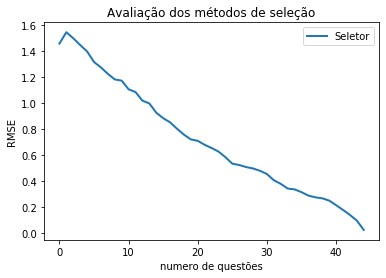

Random Selector
1000
64.11792469024658


In [69]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3


C:\Users\patri\Anaconda3\lib\site-packages\catsim\selection.py:73: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  "This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0"


aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100
aluno: 101
aluno: 102
aluno: 103
al

aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848
aluno: 849

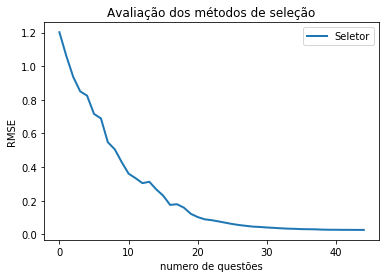

Maximum Information Selector
1000
61.174169301986694


In [70]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

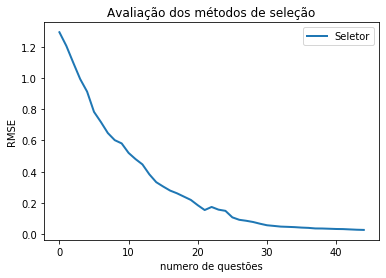

Urry Selector
1000
60.47764611244202


In [71]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

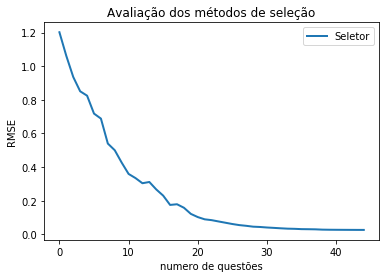

Interval Information Selector
1000
226.56632137298584


In [72]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

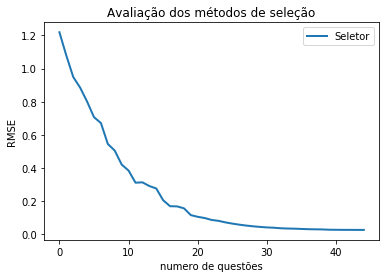

Interval Information Selector
1000
219.01509284973145


In [73]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

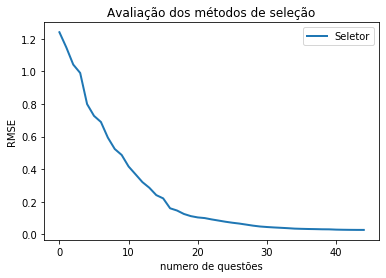

Interval Information Selector
1000
238.33852791786194


In [74]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847

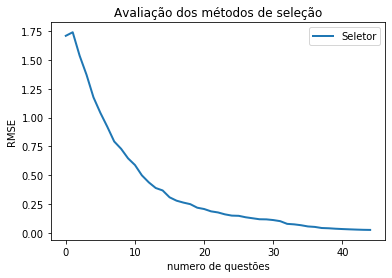

a-Stratified b-Blocking Selector
1000
55.1553156375885


In [76]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

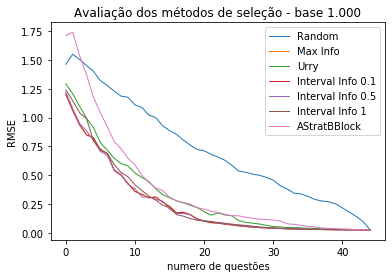

In [87]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base1000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base1000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base1000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base1000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base1000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base1000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base1000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 1.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

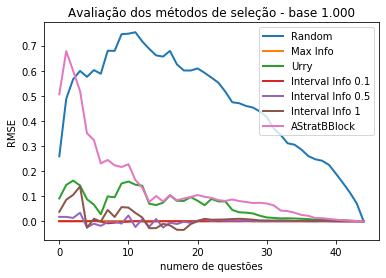

In [93]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base1000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base1000.txt')
base_b = np.sqrt(np.mean((b[1:,:])**2,axis=0))
c = np.loadtxt('Result_dif_erro_UrrySelector-base1000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base1000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base1000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base1000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base1000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0))-base_b, label='Random', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0))-base_b, label='Max Info', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0))-base_b, label='Urry', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0))-base_b, label='Interval Info 0.1', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0))-base_b, label='Interval Info 0.5', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0))-base_b, label='Interval Info 1', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0))-base_b, label='AStratBBlock', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 1.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [110]:
x = np.random.rand(10)
np.sort(x)

array([0.05735776, 0.08992424, 0.14227793, 0.28723443, 0.29560558,
       0.37768141, 0.46117462, 0.50993714, 0.69417502, 0.70385608])

In [111]:
z = np.argsort(x)
x[z[0:4]]

array([0.05735776, 0.08992424, 0.14227793, 0.28723443])

In [108]:
z[0,0:4]

array([8, 5, 6, 7], dtype=int64)

## Base 10.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
aluno: 1544
alun

aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
aluno: 2227
aluno: 2228
alun

aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
aluno: 2911
aluno: 2912
alun

aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
aluno: 3595
alun

aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
alun

aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
aluno: 4964
alun

aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
alun

aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
alun

aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
alun

aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
alun

aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
alun

aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
alun

aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
alun

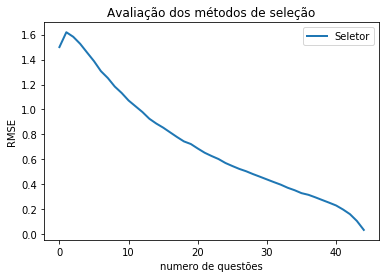

Random Selector
10000
609.4130783081055


In [81]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
alun

aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
alun

aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
alun

aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
alun

aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
alun

aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
alun

aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
alun

aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
alun

aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
alun

aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
alun

aluno: 8302
aluno: 8303
aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
alun

aluno: 8985
aluno: 8986
aluno: 8987
aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
alun

aluno: 9669
aluno: 9670
aluno: 9671
aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
alun

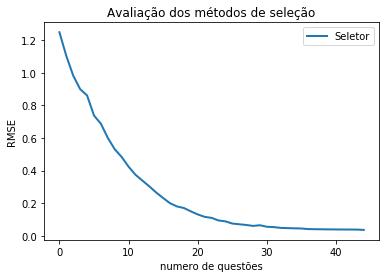

Maximum Information Selector
10000
557.7901632785797


In [88]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848

aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
alun

aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
alun

aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
alun

aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
alun

aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
alun

aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
alun

aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
aluno: 5649
aluno: 5650
alun

aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
aluno: 6334
aluno: 6335
aluno: 6336
alun

aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
aluno: 7017
aluno: 7018
aluno: 7019
aluno: 7020
aluno: 7021
aluno: 7022
aluno: 7023
alun

aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
aluno: 7700
aluno: 7701
aluno: 7702
aluno: 7703
aluno: 7704
aluno: 7705
aluno: 7706
aluno: 7707
aluno: 7708
alun

aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
aluno: 8387
aluno: 8388
aluno: 8389
aluno: 8390
aluno: 8391
aluno: 8392
aluno: 8393
aluno: 8394
aluno: 8395
alun

aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
aluno: 9071
aluno: 9072
aluno: 9073
aluno: 9074
aluno: 9075
aluno: 9076
aluno: 9077
aluno: 9078
alun

aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
aluno: 9755
aluno: 9756
aluno: 9757
aluno: 9758
aluno: 9759
aluno: 9760
aluno: 9761
aluno: 9762
aluno: 9763
aluno: 9764
aluno: 9765
alun

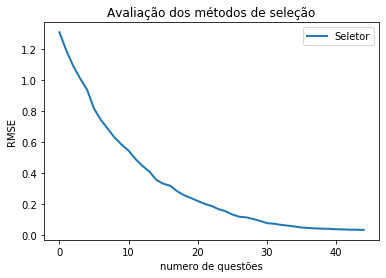

Urry Selector
10000
515.8565282821655


In [89]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

aluno: 1459
aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
alun

aluno: 2142
aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
alun

aluno: 2825
aluno: 2826
aluno: 2827
aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
alun

aluno: 3509
aluno: 3510
aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
alun

aluno: 4192
aluno: 4193
aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
alun

aluno: 4875
aluno: 4876
aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
alun

aluno: 5559
aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
alun

aluno: 6242
aluno: 6243
aluno: 6244
aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
alun

aluno: 6926
aluno: 6927
aluno: 6928
aluno: 6929
aluno: 6930
aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
alun

aluno: 7609
aluno: 7610
aluno: 7611
aluno: 7612
aluno: 7613
aluno: 7614
aluno: 7615
aluno: 7616
aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
alun

aluno: 8293
aluno: 8294
aluno: 8295
aluno: 8296
aluno: 8297
aluno: 8298
aluno: 8299
aluno: 8300
aluno: 8301
aluno: 8302
aluno: 8303
aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
alun

aluno: 8977
aluno: 8978
aluno: 8979
aluno: 8980
aluno: 8981
aluno: 8982
aluno: 8983
aluno: 8984
aluno: 8985
aluno: 8986
aluno: 8987
aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
alun

aluno: 9660
aluno: 9661
aluno: 9662
aluno: 9663
aluno: 9664
aluno: 9665
aluno: 9666
aluno: 9667
aluno: 9668
aluno: 9669
aluno: 9670
aluno: 9671
aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
alun

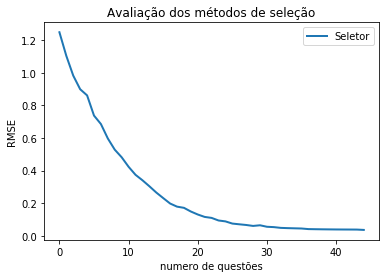

Interval Information Selector
10000
2178.1621832847595


In [90]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [91]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

aluno: 1459
aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
alun

aluno: 2142
aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
alun

aluno: 2826
aluno: 2827
aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
alun

aluno: 3509
aluno: 3510
aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
alun

aluno: 4192
aluno: 4193
aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
alun

aluno: 4875
aluno: 4876
aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
alun

aluno: 5558
aluno: 5559
aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
alun

aluno: 6241
aluno: 6242
aluno: 6243
aluno: 6244
aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
alun

aluno: 6924
aluno: 6925
aluno: 6926
aluno: 6927
aluno: 6928
aluno: 6929
aluno: 6930
aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
alun

aluno: 7607
aluno: 7608
aluno: 7609
aluno: 7610
aluno: 7611
aluno: 7612
aluno: 7613
aluno: 7614
aluno: 7615
aluno: 7616
aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
alun

KeyboardInterrupt: 

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base10000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base10000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base10000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base10000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base10000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base10000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base10000.txt')


# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 10.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

## Base 100.000

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base1000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base1000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base1000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base1000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base1000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base1000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base1000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 100.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

#### Criério MaxInfoSelector - retorna o primeiro item não administrado com o máximo de informações, dado um theta estimado

aluno: 0


C:\Users\patri\Anaconda3\lib\site-packages\catsim\selection.py:73: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  "This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0"


aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100
aluno: 1

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
alun

aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
aluno: 2227
alun

aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
aluno: 2911
alun

aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
alun

aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
alun

aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
alun

aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
alun

aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
alun

aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
alun

aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
aluno: 7700
aluno: 7701
alun

aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
alun

aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
aluno: 9071
alun

aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
aluno: 9755
aluno: 9756
alun

aluno: 10334
aluno: 10335
aluno: 10336
aluno: 10337
aluno: 10338
aluno: 10339
aluno: 10340
aluno: 10341
aluno: 10342
aluno: 10343
aluno: 10344
aluno: 10345
aluno: 10346
aluno: 10347
aluno: 10348
aluno: 10349
aluno: 10350
aluno: 10351
aluno: 10352
aluno: 10353
aluno: 10354
aluno: 10355
aluno: 10356
aluno: 10357
aluno: 10358
aluno: 10359
aluno: 10360
aluno: 10361
aluno: 10362
aluno: 10363
aluno: 10364
aluno: 10365
aluno: 10366
aluno: 10367
aluno: 10368
aluno: 10369
aluno: 10370
aluno: 10371
aluno: 10372
aluno: 10373
aluno: 10374
aluno: 10375
aluno: 10376
aluno: 10377
aluno: 10378
aluno: 10379
aluno: 10380
aluno: 10381
aluno: 10382
aluno: 10383
aluno: 10384
aluno: 10385
aluno: 10386
aluno: 10387
aluno: 10388
aluno: 10389
aluno: 10390
aluno: 10391
aluno: 10392
aluno: 10393
aluno: 10394
aluno: 10395
aluno: 10396
aluno: 10397
aluno: 10398
aluno: 10399
aluno: 10400
aluno: 10401
aluno: 10402
aluno: 10403
aluno: 10404
aluno: 10405
aluno: 10406
aluno: 10407
aluno: 10408
aluno: 10409
aluno: 10410

aluno: 10966
aluno: 10967
aluno: 10968
aluno: 10969
aluno: 10970
aluno: 10971
aluno: 10972
aluno: 10973
aluno: 10974
aluno: 10975
aluno: 10976
aluno: 10977
aluno: 10978
aluno: 10979
aluno: 10980
aluno: 10981
aluno: 10982
aluno: 10983
aluno: 10984
aluno: 10985
aluno: 10986
aluno: 10987
aluno: 10988
aluno: 10989
aluno: 10990
aluno: 10991
aluno: 10992
aluno: 10993
aluno: 10994
aluno: 10995
aluno: 10996
aluno: 10997
aluno: 10998
aluno: 10999
aluno: 11000
aluno: 11001
aluno: 11002
aluno: 11003
aluno: 11004
aluno: 11005
aluno: 11006
aluno: 11007
aluno: 11008
aluno: 11009
aluno: 11010
aluno: 11011
aluno: 11012
aluno: 11013
aluno: 11014
aluno: 11015
aluno: 11016
aluno: 11017
aluno: 11018
aluno: 11019
aluno: 11020
aluno: 11021
aluno: 11022
aluno: 11023
aluno: 11024
aluno: 11025
aluno: 11026
aluno: 11027
aluno: 11028
aluno: 11029
aluno: 11030
aluno: 11031
aluno: 11032
aluno: 11033
aluno: 11034
aluno: 11035
aluno: 11036
aluno: 11037
aluno: 11038
aluno: 11039
aluno: 11040
aluno: 11041
aluno: 11042

aluno: 11601
aluno: 11602
aluno: 11603
aluno: 11604
aluno: 11605
aluno: 11606
aluno: 11607
aluno: 11608
aluno: 11609
aluno: 11610
aluno: 11611
aluno: 11612
aluno: 11613
aluno: 11614
aluno: 11615
aluno: 11616
aluno: 11617
aluno: 11618
aluno: 11619
aluno: 11620
aluno: 11621
aluno: 11622
aluno: 11623
aluno: 11624
aluno: 11625
aluno: 11626
aluno: 11627
aluno: 11628
aluno: 11629
aluno: 11630
aluno: 11631
aluno: 11632
aluno: 11633
aluno: 11634
aluno: 11635
aluno: 11636
aluno: 11637
aluno: 11638
aluno: 11639
aluno: 11640
aluno: 11641
aluno: 11642
aluno: 11643
aluno: 11644
aluno: 11645
aluno: 11646
aluno: 11647
aluno: 11648
aluno: 11649
aluno: 11650
aluno: 11651
aluno: 11652
aluno: 11653
aluno: 11654
aluno: 11655
aluno: 11656
aluno: 11657
aluno: 11658
aluno: 11659
aluno: 11660
aluno: 11661
aluno: 11662
aluno: 11663
aluno: 11664
aluno: 11665
aluno: 11666
aluno: 11667
aluno: 11668
aluno: 11669
aluno: 11670
aluno: 11671
aluno: 11672
aluno: 11673
aluno: 11674
aluno: 11675
aluno: 11676
aluno: 11677

aluno: 12233
aluno: 12234
aluno: 12235
aluno: 12236
aluno: 12237
aluno: 12238
aluno: 12239
aluno: 12240
aluno: 12241
aluno: 12242
aluno: 12243
aluno: 12244
aluno: 12245
aluno: 12246
aluno: 12247
aluno: 12248
aluno: 12249
aluno: 12250
aluno: 12251
aluno: 12252
aluno: 12253
aluno: 12254
aluno: 12255
aluno: 12256
aluno: 12257
aluno: 12258
aluno: 12259
aluno: 12260
aluno: 12261
aluno: 12262
aluno: 12263
aluno: 12264
aluno: 12265
aluno: 12266
aluno: 12267
aluno: 12268
aluno: 12269
aluno: 12270
aluno: 12271
aluno: 12272
aluno: 12273
aluno: 12274
aluno: 12275
aluno: 12276
aluno: 12277
aluno: 12278
aluno: 12279
aluno: 12280
aluno: 12281
aluno: 12282
aluno: 12283
aluno: 12284
aluno: 12285
aluno: 12286
aluno: 12287
aluno: 12288
aluno: 12289
aluno: 12290
aluno: 12291
aluno: 12292
aluno: 12293
aluno: 12294
aluno: 12295
aluno: 12296
aluno: 12297
aluno: 12298
aluno: 12299
aluno: 12300
aluno: 12301
aluno: 12302
aluno: 12303
aluno: 12304
aluno: 12305
aluno: 12306
aluno: 12307
aluno: 12308
aluno: 12309

aluno: 12865
aluno: 12866
aluno: 12867
aluno: 12868
aluno: 12869
aluno: 12870
aluno: 12871
aluno: 12872
aluno: 12873
aluno: 12874
aluno: 12875
aluno: 12876
aluno: 12877
aluno: 12878
aluno: 12879
aluno: 12880
aluno: 12881
aluno: 12882
aluno: 12883
aluno: 12884
aluno: 12885
aluno: 12886
aluno: 12887
aluno: 12888
aluno: 12889
aluno: 12890
aluno: 12891
aluno: 12892
aluno: 12893
aluno: 12894
aluno: 12895
aluno: 12896
aluno: 12897
aluno: 12898
aluno: 12899
aluno: 12900
aluno: 12901
aluno: 12902
aluno: 12903
aluno: 12904
aluno: 12905
aluno: 12906
aluno: 12907
aluno: 12908
aluno: 12909
aluno: 12910
aluno: 12911
aluno: 12912
aluno: 12913
aluno: 12914
aluno: 12915
aluno: 12916
aluno: 12917
aluno: 12918
aluno: 12919
aluno: 12920
aluno: 12921
aluno: 12922
aluno: 12923
aluno: 12924
aluno: 12925
aluno: 12926
aluno: 12927
aluno: 12928
aluno: 12929
aluno: 12930
aluno: 12931
aluno: 12932
aluno: 12933
aluno: 12934
aluno: 12935
aluno: 12936
aluno: 12937
aluno: 12938
aluno: 12939
aluno: 12940
aluno: 12941

aluno: 13496
aluno: 13497
aluno: 13498
aluno: 13499
aluno: 13500
aluno: 13501
aluno: 13502
aluno: 13503
aluno: 13504
aluno: 13505
aluno: 13506
aluno: 13507
aluno: 13508
aluno: 13509
aluno: 13510
aluno: 13511
aluno: 13512
aluno: 13513
aluno: 13514
aluno: 13515
aluno: 13516
aluno: 13517
aluno: 13518
aluno: 13519
aluno: 13520
aluno: 13521
aluno: 13522
aluno: 13523
aluno: 13524
aluno: 13525
aluno: 13526
aluno: 13527
aluno: 13528
aluno: 13529
aluno: 13530
aluno: 13531
aluno: 13532
aluno: 13533
aluno: 13534
aluno: 13535
aluno: 13536
aluno: 13537
aluno: 13538
aluno: 13539
aluno: 13540
aluno: 13541
aluno: 13542
aluno: 13543
aluno: 13544
aluno: 13545
aluno: 13546
aluno: 13547
aluno: 13548
aluno: 13549
aluno: 13550
aluno: 13551
aluno: 13552
aluno: 13553
aluno: 13554
aluno: 13555
aluno: 13556
aluno: 13557
aluno: 13558
aluno: 13559
aluno: 13560
aluno: 13561
aluno: 13562
aluno: 13563
aluno: 13564
aluno: 13565
aluno: 13566
aluno: 13567
aluno: 13568
aluno: 13569
aluno: 13570
aluno: 13571
aluno: 13572

aluno: 14130
aluno: 14131
aluno: 14132
aluno: 14133
aluno: 14134
aluno: 14135
aluno: 14136
aluno: 14137
aluno: 14138
aluno: 14139
aluno: 14140
aluno: 14141
aluno: 14142
aluno: 14143
aluno: 14144
aluno: 14145
aluno: 14146
aluno: 14147
aluno: 14148
aluno: 14149
aluno: 14150
aluno: 14151
aluno: 14152
aluno: 14153
aluno: 14154
aluno: 14155
aluno: 14156
aluno: 14157
aluno: 14158
aluno: 14159
aluno: 14160
aluno: 14161
aluno: 14162
aluno: 14163
aluno: 14164
aluno: 14165
aluno: 14166
aluno: 14167
aluno: 14168
aluno: 14169
aluno: 14170
aluno: 14171
aluno: 14172
aluno: 14173
aluno: 14174
aluno: 14175
aluno: 14176
aluno: 14177
aluno: 14178
aluno: 14179
aluno: 14180
aluno: 14181
aluno: 14182
aluno: 14183
aluno: 14184
aluno: 14185
aluno: 14186
aluno: 14187
aluno: 14188
aluno: 14189
aluno: 14190
aluno: 14191
aluno: 14192
aluno: 14193
aluno: 14194
aluno: 14195
aluno: 14196
aluno: 14197
aluno: 14198
aluno: 14199
aluno: 14200
aluno: 14201
aluno: 14202
aluno: 14203
aluno: 14204
aluno: 14205
aluno: 14206

aluno: 14761
aluno: 14762
aluno: 14763
aluno: 14764
aluno: 14765
aluno: 14766
aluno: 14767
aluno: 14768
aluno: 14769
aluno: 14770
aluno: 14771
aluno: 14772
aluno: 14773
aluno: 14774
aluno: 14775
aluno: 14776
aluno: 14777
aluno: 14778
aluno: 14779
aluno: 14780
aluno: 14781
aluno: 14782
aluno: 14783
aluno: 14784
aluno: 14785
aluno: 14786
aluno: 14787
aluno: 14788
aluno: 14789
aluno: 14790
aluno: 14791
aluno: 14792
aluno: 14793
aluno: 14794
aluno: 14795
aluno: 14796
aluno: 14797
aluno: 14798
aluno: 14799
aluno: 14800
aluno: 14801
aluno: 14802
aluno: 14803
aluno: 14804
aluno: 14805
aluno: 14806
aluno: 14807
aluno: 14808
aluno: 14809
aluno: 14810
aluno: 14811
aluno: 14812
aluno: 14813
aluno: 14814
aluno: 14815
aluno: 14816
aluno: 14817
aluno: 14818
aluno: 14819
aluno: 14820
aluno: 14821
aluno: 14822
aluno: 14823
aluno: 14824
aluno: 14825
aluno: 14826
aluno: 14827
aluno: 14828
aluno: 14829
aluno: 14830
aluno: 14831
aluno: 14832
aluno: 14833
aluno: 14834
aluno: 14835
aluno: 14836
aluno: 14837

aluno: 15392
aluno: 15393
aluno: 15394
aluno: 15395
aluno: 15396
aluno: 15397
aluno: 15398
aluno: 15399
aluno: 15400
aluno: 15401
aluno: 15402
aluno: 15403
aluno: 15404
aluno: 15405
aluno: 15406
aluno: 15407
aluno: 15408
aluno: 15409
aluno: 15410
aluno: 15411
aluno: 15412
aluno: 15413
aluno: 15414
aluno: 15415
aluno: 15416
aluno: 15417
aluno: 15418
aluno: 15419
aluno: 15420
aluno: 15421
aluno: 15422
aluno: 15423
aluno: 15424
aluno: 15425
aluno: 15426
aluno: 15427
aluno: 15428
aluno: 15429
aluno: 15430
aluno: 15431
aluno: 15432
aluno: 15433
aluno: 15434
aluno: 15435
aluno: 15436
aluno: 15437
aluno: 15438
aluno: 15439
aluno: 15440
aluno: 15441
aluno: 15442
aluno: 15443
aluno: 15444
aluno: 15445
aluno: 15446
aluno: 15447
aluno: 15448
aluno: 15449
aluno: 15450
aluno: 15451
aluno: 15452
aluno: 15453
aluno: 15454
aluno: 15455
aluno: 15456
aluno: 15457
aluno: 15458
aluno: 15459
aluno: 15460
aluno: 15461
aluno: 15462
aluno: 15463
aluno: 15464
aluno: 15465
aluno: 15466
aluno: 15467
aluno: 15468

aluno: 16023
aluno: 16024
aluno: 16025
aluno: 16026
aluno: 16027
aluno: 16028
aluno: 16029
aluno: 16030
aluno: 16031
aluno: 16032
aluno: 16033
aluno: 16034
aluno: 16035
aluno: 16036
aluno: 16037
aluno: 16038
aluno: 16039
aluno: 16040
aluno: 16041
aluno: 16042
aluno: 16043
aluno: 16044
aluno: 16045
aluno: 16046
aluno: 16047
aluno: 16048
aluno: 16049
aluno: 16050
aluno: 16051
aluno: 16052
aluno: 16053
aluno: 16054
aluno: 16055
aluno: 16056
aluno: 16057
aluno: 16058
aluno: 16059
aluno: 16060
aluno: 16061
aluno: 16062
aluno: 16063
aluno: 16064
aluno: 16065
aluno: 16066
aluno: 16067
aluno: 16068
aluno: 16069
aluno: 16070
aluno: 16071
aluno: 16072
aluno: 16073
aluno: 16074
aluno: 16075
aluno: 16076
aluno: 16077
aluno: 16078
aluno: 16079
aluno: 16080
aluno: 16081
aluno: 16082
aluno: 16083
aluno: 16084
aluno: 16085
aluno: 16086
aluno: 16087
aluno: 16088
aluno: 16089
aluno: 16090
aluno: 16091
aluno: 16092
aluno: 16093
aluno: 16094
aluno: 16095
aluno: 16096
aluno: 16097
aluno: 16098
aluno: 16099

aluno: 16654
aluno: 16655
aluno: 16656
aluno: 16657
aluno: 16658
aluno: 16659
aluno: 16660
aluno: 16661
aluno: 16662
aluno: 16663
aluno: 16664
aluno: 16665
aluno: 16666
aluno: 16667
aluno: 16668
aluno: 16669
aluno: 16670
aluno: 16671
aluno: 16672
aluno: 16673
aluno: 16674
aluno: 16675
aluno: 16676
aluno: 16677
aluno: 16678
aluno: 16679
aluno: 16680
aluno: 16681
aluno: 16682
aluno: 16683
aluno: 16684
aluno: 16685
aluno: 16686
aluno: 16687
aluno: 16688
aluno: 16689
aluno: 16690
aluno: 16691
aluno: 16692
aluno: 16693
aluno: 16694
aluno: 16695
aluno: 16696
aluno: 16697
aluno: 16698
aluno: 16699
aluno: 16700
aluno: 16701
aluno: 16702
aluno: 16703
aluno: 16704
aluno: 16705
aluno: 16706
aluno: 16707
aluno: 16708
aluno: 16709
aluno: 16710
aluno: 16711
aluno: 16712
aluno: 16713
aluno: 16714
aluno: 16715
aluno: 16716
aluno: 16717
aluno: 16718
aluno: 16719
aluno: 16720
aluno: 16721
aluno: 16722
aluno: 16723
aluno: 16724
aluno: 16725
aluno: 16726
aluno: 16727
aluno: 16728
aluno: 16729
aluno: 16730

aluno: 17287
aluno: 17288
aluno: 17289
aluno: 17290
aluno: 17291
aluno: 17292
aluno: 17293
aluno: 17294
aluno: 17295
aluno: 17296
aluno: 17297
aluno: 17298
aluno: 17299
aluno: 17300
aluno: 17301
aluno: 17302
aluno: 17303
aluno: 17304
aluno: 17305
aluno: 17306
aluno: 17307
aluno: 17308
aluno: 17309
aluno: 17310
aluno: 17311
aluno: 17312
aluno: 17313
aluno: 17314
aluno: 17315
aluno: 17316
aluno: 17317
aluno: 17318
aluno: 17319
aluno: 17320
aluno: 17321
aluno: 17322
aluno: 17323
aluno: 17324
aluno: 17325
aluno: 17326
aluno: 17327
aluno: 17328
aluno: 17329
aluno: 17330
aluno: 17331
aluno: 17332
aluno: 17333
aluno: 17334
aluno: 17335
aluno: 17336
aluno: 17337
aluno: 17338
aluno: 17339
aluno: 17340
aluno: 17341
aluno: 17342
aluno: 17343
aluno: 17344
aluno: 17345
aluno: 17346
aluno: 17347
aluno: 17348
aluno: 17349
aluno: 17350
aluno: 17351
aluno: 17352
aluno: 17353
aluno: 17354
aluno: 17355
aluno: 17356
aluno: 17357
aluno: 17358
aluno: 17359
aluno: 17360
aluno: 17361
aluno: 17362
aluno: 17363

aluno: 17918
aluno: 17919
aluno: 17920
aluno: 17921
aluno: 17922
aluno: 17923
aluno: 17924
aluno: 17925
aluno: 17926
aluno: 17927
aluno: 17928
aluno: 17929
aluno: 17930
aluno: 17931
aluno: 17932
aluno: 17933
aluno: 17934
aluno: 17935
aluno: 17936
aluno: 17937
aluno: 17938
aluno: 17939
aluno: 17940
aluno: 17941
aluno: 17942
aluno: 17943
aluno: 17944
aluno: 17945
aluno: 17946
aluno: 17947
aluno: 17948
aluno: 17949
aluno: 17950
aluno: 17951
aluno: 17952
aluno: 17953
aluno: 17954
aluno: 17955
aluno: 17956
aluno: 17957
aluno: 17958
aluno: 17959
aluno: 17960
aluno: 17961
aluno: 17962
aluno: 17963
aluno: 17964
aluno: 17965
aluno: 17966
aluno: 17967
aluno: 17968
aluno: 17969
aluno: 17970
aluno: 17971
aluno: 17972
aluno: 17973
aluno: 17974
aluno: 17975
aluno: 17976
aluno: 17977
aluno: 17978
aluno: 17979
aluno: 17980
aluno: 17981
aluno: 17982
aluno: 17983
aluno: 17984
aluno: 17985
aluno: 17986
aluno: 17987
aluno: 17988
aluno: 17989
aluno: 17990
aluno: 17991
aluno: 17992
aluno: 17993
aluno: 17994

aluno: 18551
aluno: 18552
aluno: 18553
aluno: 18554
aluno: 18555
aluno: 18556
aluno: 18557
aluno: 18558
aluno: 18559
aluno: 18560
aluno: 18561
aluno: 18562
aluno: 18563
aluno: 18564
aluno: 18565
aluno: 18566
aluno: 18567
aluno: 18568
aluno: 18569
aluno: 18570
aluno: 18571
aluno: 18572
aluno: 18573
aluno: 18574
aluno: 18575
aluno: 18576
aluno: 18577
aluno: 18578
aluno: 18579
aluno: 18580
aluno: 18581
aluno: 18582
aluno: 18583
aluno: 18584
aluno: 18585
aluno: 18586
aluno: 18587
aluno: 18588
aluno: 18589
aluno: 18590
aluno: 18591
aluno: 18592
aluno: 18593
aluno: 18594
aluno: 18595
aluno: 18596
aluno: 18597
aluno: 18598
aluno: 18599
aluno: 18600
aluno: 18601
aluno: 18602
aluno: 18603
aluno: 18604
aluno: 18605
aluno: 18606
aluno: 18607
aluno: 18608
aluno: 18609
aluno: 18610
aluno: 18611
aluno: 18612
aluno: 18613
aluno: 18614
aluno: 18615
aluno: 18616
aluno: 18617
aluno: 18618
aluno: 18619
aluno: 18620
aluno: 18621
aluno: 18622
aluno: 18623
aluno: 18624
aluno: 18625
aluno: 18626
aluno: 18627

aluno: 19184
aluno: 19185
aluno: 19186
aluno: 19187
aluno: 19188
aluno: 19189
aluno: 19190
aluno: 19191
aluno: 19192
aluno: 19193
aluno: 19194
aluno: 19195
aluno: 19196
aluno: 19197
aluno: 19198
aluno: 19199
aluno: 19200
aluno: 19201
aluno: 19202
aluno: 19203
aluno: 19204
aluno: 19205
aluno: 19206
aluno: 19207
aluno: 19208
aluno: 19209
aluno: 19210
aluno: 19211
aluno: 19212
aluno: 19213
aluno: 19214
aluno: 19215
aluno: 19216
aluno: 19217
aluno: 19218
aluno: 19219
aluno: 19220
aluno: 19221
aluno: 19222
aluno: 19223
aluno: 19224
aluno: 19225
aluno: 19226
aluno: 19227
aluno: 19228
aluno: 19229
aluno: 19230
aluno: 19231
aluno: 19232
aluno: 19233
aluno: 19234
aluno: 19235
aluno: 19236
aluno: 19237
aluno: 19238
aluno: 19239
aluno: 19240
aluno: 19241
aluno: 19242
aluno: 19243
aluno: 19244
aluno: 19245
aluno: 19246
aluno: 19247
aluno: 19248
aluno: 19249
aluno: 19250
aluno: 19251
aluno: 19252
aluno: 19253
aluno: 19254
aluno: 19255
aluno: 19256
aluno: 19257
aluno: 19258
aluno: 19259
aluno: 19260

aluno: 19817
aluno: 19818
aluno: 19819
aluno: 19820
aluno: 19821
aluno: 19822
aluno: 19823
aluno: 19824
aluno: 19825
aluno: 19826
aluno: 19827
aluno: 19828
aluno: 19829
aluno: 19830
aluno: 19831
aluno: 19832
aluno: 19833
aluno: 19834
aluno: 19835
aluno: 19836
aluno: 19837
aluno: 19838
aluno: 19839
aluno: 19840
aluno: 19841
aluno: 19842
aluno: 19843
aluno: 19844
aluno: 19845
aluno: 19846
aluno: 19847
aluno: 19848
aluno: 19849
aluno: 19850
aluno: 19851
aluno: 19852
aluno: 19853
aluno: 19854
aluno: 19855
aluno: 19856
aluno: 19857
aluno: 19858
aluno: 19859
aluno: 19860
aluno: 19861
aluno: 19862
aluno: 19863
aluno: 19864
aluno: 19865
aluno: 19866
aluno: 19867
aluno: 19868
aluno: 19869
aluno: 19870
aluno: 19871
aluno: 19872
aluno: 19873
aluno: 19874
aluno: 19875
aluno: 19876
aluno: 19877
aluno: 19878
aluno: 19879
aluno: 19880
aluno: 19881
aluno: 19882
aluno: 19883
aluno: 19884
aluno: 19885
aluno: 19886
aluno: 19887
aluno: 19888
aluno: 19889
aluno: 19890
aluno: 19891
aluno: 19892
aluno: 19893

aluno: 20450
aluno: 20451
aluno: 20452
aluno: 20453
aluno: 20454
aluno: 20455
aluno: 20456
aluno: 20457
aluno: 20458
aluno: 20459
aluno: 20460
aluno: 20461
aluno: 20462
aluno: 20463
aluno: 20464
aluno: 20465
aluno: 20466
aluno: 20467
aluno: 20468
aluno: 20469
aluno: 20470
aluno: 20471
aluno: 20472
aluno: 20473
aluno: 20474
aluno: 20475
aluno: 20476
aluno: 20477
aluno: 20478
aluno: 20479
aluno: 20480
aluno: 20481
aluno: 20482
aluno: 20483
aluno: 20484
aluno: 20485
aluno: 20486
aluno: 20487
aluno: 20488
aluno: 20489
aluno: 20490
aluno: 20491
aluno: 20492
aluno: 20493
aluno: 20494
aluno: 20495
aluno: 20496
aluno: 20497
aluno: 20498
aluno: 20499
aluno: 20500
aluno: 20501
aluno: 20502
aluno: 20503
aluno: 20504
aluno: 20505
aluno: 20506
aluno: 20507
aluno: 20508
aluno: 20509
aluno: 20510
aluno: 20511
aluno: 20512
aluno: 20513
aluno: 20514
aluno: 20515
aluno: 20516
aluno: 20517
aluno: 20518
aluno: 20519
aluno: 20520
aluno: 20521
aluno: 20522
aluno: 20523
aluno: 20524
aluno: 20525
aluno: 20526

aluno: 21083
aluno: 21084
aluno: 21085
aluno: 21086
aluno: 21087
aluno: 21088
aluno: 21089
aluno: 21090
aluno: 21091
aluno: 21092
aluno: 21093
aluno: 21094
aluno: 21095
aluno: 21096
aluno: 21097
aluno: 21098
aluno: 21099
aluno: 21100
aluno: 21101
aluno: 21102
aluno: 21103
aluno: 21104
aluno: 21105
aluno: 21106
aluno: 21107
aluno: 21108
aluno: 21109
aluno: 21110
aluno: 21111
aluno: 21112
aluno: 21113
aluno: 21114
aluno: 21115
aluno: 21116
aluno: 21117
aluno: 21118
aluno: 21119
aluno: 21120
aluno: 21121
aluno: 21122
aluno: 21123
aluno: 21124
aluno: 21125
aluno: 21126
aluno: 21127
aluno: 21128
aluno: 21129
aluno: 21130
aluno: 21131
aluno: 21132
aluno: 21133
aluno: 21134
aluno: 21135
aluno: 21136
aluno: 21137
aluno: 21138
aluno: 21139
aluno: 21140
aluno: 21141
aluno: 21142
aluno: 21143
aluno: 21144
aluno: 21145
aluno: 21146
aluno: 21147
aluno: 21148
aluno: 21149
aluno: 21150
aluno: 21151
aluno: 21152
aluno: 21153
aluno: 21154
aluno: 21155
aluno: 21156
aluno: 21157
aluno: 21158
aluno: 21159

aluno: 21716
aluno: 21717
aluno: 21718
aluno: 21719
aluno: 21720
aluno: 21721
aluno: 21722
aluno: 21723
aluno: 21724
aluno: 21725
aluno: 21726
aluno: 21727
aluno: 21728
aluno: 21729
aluno: 21730
aluno: 21731
aluno: 21732
aluno: 21733
aluno: 21734
aluno: 21735
aluno: 21736
aluno: 21737
aluno: 21738
aluno: 21739
aluno: 21740
aluno: 21741
aluno: 21742
aluno: 21743
aluno: 21744
aluno: 21745
aluno: 21746
aluno: 21747
aluno: 21748
aluno: 21749
aluno: 21750
aluno: 21751
aluno: 21752
aluno: 21753
aluno: 21754
aluno: 21755
aluno: 21756
aluno: 21757
aluno: 21758
aluno: 21759
aluno: 21760
aluno: 21761
aluno: 21762
aluno: 21763
aluno: 21764
aluno: 21765
aluno: 21766
aluno: 21767
aluno: 21768
aluno: 21769
aluno: 21770
aluno: 21771
aluno: 21772
aluno: 21773
aluno: 21774
aluno: 21775
aluno: 21776
aluno: 21777
aluno: 21778
aluno: 21779
aluno: 21780
aluno: 21781
aluno: 21782
aluno: 21783
aluno: 21784
aluno: 21785
aluno: 21786
aluno: 21787
aluno: 21788
aluno: 21789
aluno: 21790
aluno: 21791
aluno: 21792

aluno: 22349
aluno: 22350
aluno: 22351
aluno: 22352
aluno: 22353
aluno: 22354
aluno: 22355
aluno: 22356
aluno: 22357
aluno: 22358
aluno: 22359
aluno: 22360
aluno: 22361
aluno: 22362
aluno: 22363
aluno: 22364
aluno: 22365
aluno: 22366
aluno: 22367
aluno: 22368
aluno: 22369
aluno: 22370
aluno: 22371
aluno: 22372
aluno: 22373
aluno: 22374
aluno: 22375
aluno: 22376
aluno: 22377
aluno: 22378
aluno: 22379
aluno: 22380
aluno: 22381
aluno: 22382
aluno: 22383
aluno: 22384
aluno: 22385
aluno: 22386
aluno: 22387
aluno: 22388
aluno: 22389
aluno: 22390
aluno: 22391
aluno: 22392
aluno: 22393
aluno: 22394
aluno: 22395
aluno: 22396
aluno: 22397
aluno: 22398
aluno: 22399
aluno: 22400
aluno: 22401
aluno: 22402
aluno: 22403
aluno: 22404
aluno: 22405
aluno: 22406
aluno: 22407
aluno: 22408
aluno: 22409
aluno: 22410
aluno: 22411
aluno: 22412
aluno: 22413
aluno: 22414
aluno: 22415
aluno: 22416
aluno: 22417
aluno: 22418
aluno: 22419
aluno: 22420
aluno: 22421
aluno: 22422
aluno: 22423
aluno: 22424
aluno: 22425

aluno: 22982
aluno: 22983
aluno: 22984
aluno: 22985
aluno: 22986
aluno: 22987
aluno: 22988
aluno: 22989
aluno: 22990
aluno: 22991
aluno: 22992
aluno: 22993
aluno: 22994
aluno: 22995
aluno: 22996
aluno: 22997
aluno: 22998
aluno: 22999
aluno: 23000
aluno: 23001
aluno: 23002
aluno: 23003
aluno: 23004
aluno: 23005
aluno: 23006
aluno: 23007
aluno: 23008
aluno: 23009
aluno: 23010
aluno: 23011
aluno: 23012
aluno: 23013
aluno: 23014
aluno: 23015
aluno: 23016
aluno: 23017
aluno: 23018
aluno: 23019
aluno: 23020
aluno: 23021
aluno: 23022
aluno: 23023
aluno: 23024
aluno: 23025
aluno: 23026
aluno: 23027
aluno: 23028
aluno: 23029
aluno: 23030
aluno: 23031
aluno: 23032
aluno: 23033
aluno: 23034
aluno: 23035
aluno: 23036
aluno: 23037
aluno: 23038
aluno: 23039
aluno: 23040
aluno: 23041
aluno: 23042
aluno: 23043
aluno: 23044
aluno: 23045
aluno: 23046
aluno: 23047
aluno: 23048
aluno: 23049
aluno: 23050
aluno: 23051
aluno: 23052
aluno: 23053
aluno: 23054
aluno: 23055
aluno: 23056
aluno: 23057
aluno: 23058

aluno: 23615
aluno: 23616
aluno: 23617
aluno: 23618
aluno: 23619
aluno: 23620
aluno: 23621
aluno: 23622
aluno: 23623
aluno: 23624
aluno: 23625
aluno: 23626
aluno: 23627
aluno: 23628
aluno: 23629
aluno: 23630
aluno: 23631
aluno: 23632
aluno: 23633
aluno: 23634
aluno: 23635
aluno: 23636
aluno: 23637
aluno: 23638
aluno: 23639
aluno: 23640
aluno: 23641
aluno: 23642
aluno: 23643
aluno: 23644
aluno: 23645
aluno: 23646
aluno: 23647
aluno: 23648
aluno: 23649
aluno: 23650
aluno: 23651
aluno: 23652
aluno: 23653
aluno: 23654
aluno: 23655
aluno: 23656
aluno: 23657
aluno: 23658
aluno: 23659
aluno: 23660
aluno: 23661
aluno: 23662
aluno: 23663
aluno: 23664
aluno: 23665
aluno: 23666
aluno: 23667
aluno: 23668
aluno: 23669
aluno: 23670
aluno: 23671
aluno: 23672
aluno: 23673
aluno: 23674
aluno: 23675
aluno: 23676
aluno: 23677
aluno: 23678
aluno: 23679
aluno: 23680
aluno: 23681
aluno: 23682
aluno: 23683
aluno: 23684
aluno: 23685
aluno: 23686
aluno: 23687
aluno: 23688
aluno: 23689
aluno: 23690
aluno: 23691

aluno: 24247
aluno: 24248
aluno: 24249
aluno: 24250
aluno: 24251
aluno: 24252
aluno: 24253
aluno: 24254
aluno: 24255
aluno: 24256
aluno: 24257
aluno: 24258
aluno: 24259
aluno: 24260
aluno: 24261
aluno: 24262
aluno: 24263
aluno: 24264
aluno: 24265
aluno: 24266
aluno: 24267
aluno: 24268
aluno: 24269
aluno: 24270
aluno: 24271
aluno: 24272
aluno: 24273
aluno: 24274
aluno: 24275
aluno: 24276
aluno: 24277
aluno: 24278
aluno: 24279
aluno: 24280
aluno: 24281
aluno: 24282
aluno: 24283
aluno: 24284
aluno: 24285
aluno: 24286
aluno: 24287
aluno: 24288
aluno: 24289
aluno: 24290
aluno: 24291
aluno: 24292
aluno: 24293
aluno: 24294
aluno: 24295
aluno: 24296
aluno: 24297
aluno: 24298
aluno: 24299
aluno: 24300
aluno: 24301
aluno: 24302
aluno: 24303
aluno: 24304
aluno: 24305
aluno: 24306
aluno: 24307
aluno: 24308
aluno: 24309
aluno: 24310
aluno: 24311
aluno: 24312
aluno: 24313
aluno: 24314
aluno: 24315
aluno: 24316
aluno: 24317
aluno: 24318
aluno: 24319
aluno: 24320
aluno: 24321
aluno: 24322
aluno: 24323

aluno: 24879
aluno: 24880
aluno: 24881
aluno: 24882
aluno: 24883
aluno: 24884
aluno: 24885
aluno: 24886
aluno: 24887
aluno: 24888
aluno: 24889
aluno: 24890
aluno: 24891
aluno: 24892
aluno: 24893
aluno: 24894
aluno: 24895
aluno: 24896
aluno: 24897
aluno: 24898
aluno: 24899
aluno: 24900
aluno: 24901
aluno: 24902
aluno: 24903
aluno: 24904
aluno: 24905
aluno: 24906
aluno: 24907
aluno: 24908
aluno: 24909
aluno: 24910
aluno: 24911
aluno: 24912
aluno: 24913
aluno: 24914
aluno: 24915
aluno: 24916
aluno: 24917
aluno: 24918
aluno: 24919
aluno: 24920
aluno: 24921
aluno: 24922
aluno: 24923
aluno: 24924
aluno: 24925
aluno: 24926
aluno: 24927
aluno: 24928
aluno: 24929
aluno: 24930
aluno: 24931
aluno: 24932
aluno: 24933
aluno: 24934
aluno: 24935
aluno: 24936
aluno: 24937
aluno: 24938
aluno: 24939
aluno: 24940
aluno: 24941
aluno: 24942
aluno: 24943
aluno: 24944
aluno: 24945
aluno: 24946
aluno: 24947
aluno: 24948
aluno: 24949
aluno: 24950
aluno: 24951
aluno: 24952
aluno: 24953
aluno: 24954
aluno: 24955

aluno: 25510
aluno: 25511
aluno: 25512
aluno: 25513
aluno: 25514
aluno: 25515
aluno: 25516
aluno: 25517
aluno: 25518
aluno: 25519
aluno: 25520
aluno: 25521
aluno: 25522
aluno: 25523
aluno: 25524
aluno: 25525
aluno: 25526
aluno: 25527
aluno: 25528
aluno: 25529
aluno: 25530
aluno: 25531
aluno: 25532
aluno: 25533
aluno: 25534
aluno: 25535
aluno: 25536
aluno: 25537
aluno: 25538
aluno: 25539
aluno: 25540
aluno: 25541
aluno: 25542
aluno: 25543
aluno: 25544
aluno: 25545
aluno: 25546
aluno: 25547
aluno: 25548
aluno: 25549
aluno: 25550
aluno: 25551
aluno: 25552
aluno: 25553
aluno: 25554
aluno: 25555
aluno: 25556
aluno: 25557
aluno: 25558
aluno: 25559
aluno: 25560
aluno: 25561
aluno: 25562
aluno: 25563
aluno: 25564
aluno: 25565
aluno: 25566
aluno: 25567
aluno: 25568
aluno: 25569
aluno: 25570
aluno: 25571
aluno: 25572
aluno: 25573
aluno: 25574
aluno: 25575
aluno: 25576
aluno: 25577
aluno: 25578
aluno: 25579
aluno: 25580
aluno: 25581
aluno: 25582
aluno: 25583
aluno: 25584
aluno: 25585
aluno: 25586

aluno: 26143
aluno: 26144
aluno: 26145
aluno: 26146
aluno: 26147
aluno: 26148
aluno: 26149
aluno: 26150
aluno: 26151
aluno: 26152
aluno: 26153
aluno: 26154
aluno: 26155
aluno: 26156
aluno: 26157
aluno: 26158
aluno: 26159
aluno: 26160
aluno: 26161
aluno: 26162
aluno: 26163
aluno: 26164
aluno: 26165
aluno: 26166
aluno: 26167
aluno: 26168
aluno: 26169
aluno: 26170
aluno: 26171
aluno: 26172
aluno: 26173
aluno: 26174
aluno: 26175
aluno: 26176
aluno: 26177
aluno: 26178
aluno: 26179
aluno: 26180
aluno: 26181
aluno: 26182
aluno: 26183
aluno: 26184
aluno: 26185
aluno: 26186
aluno: 26187
aluno: 26188
aluno: 26189
aluno: 26190
aluno: 26191
aluno: 26192
aluno: 26193
aluno: 26194
aluno: 26195
aluno: 26196
aluno: 26197
aluno: 26198
aluno: 26199
aluno: 26200
aluno: 26201
aluno: 26202
aluno: 26203
aluno: 26204
aluno: 26205
aluno: 26206
aluno: 26207
aluno: 26208
aluno: 26209
aluno: 26210
aluno: 26211
aluno: 26212
aluno: 26213
aluno: 26214
aluno: 26215
aluno: 26216
aluno: 26217
aluno: 26218
aluno: 26219

aluno: 26775
aluno: 26776
aluno: 26777
aluno: 26778
aluno: 26779
aluno: 26780
aluno: 26781
aluno: 26782
aluno: 26783
aluno: 26784
aluno: 26785
aluno: 26786
aluno: 26787
aluno: 26788
aluno: 26789
aluno: 26790
aluno: 26791
aluno: 26792
aluno: 26793
aluno: 26794
aluno: 26795
aluno: 26796
aluno: 26797
aluno: 26798
aluno: 26799
aluno: 26800
aluno: 26801
aluno: 26802
aluno: 26803
aluno: 26804
aluno: 26805
aluno: 26806
aluno: 26807
aluno: 26808
aluno: 26809
aluno: 26810
aluno: 26811
aluno: 26812
aluno: 26813
aluno: 26814
aluno: 26815
aluno: 26816
aluno: 26817
aluno: 26818
aluno: 26819
aluno: 26820
aluno: 26821
aluno: 26822
aluno: 26823
aluno: 26824
aluno: 26825
aluno: 26826
aluno: 26827
aluno: 26828
aluno: 26829
aluno: 26830
aluno: 26831
aluno: 26832
aluno: 26833
aluno: 26834
aluno: 26835
aluno: 26836
aluno: 26837
aluno: 26838
aluno: 26839
aluno: 26840
aluno: 26841
aluno: 26842
aluno: 26843
aluno: 26844
aluno: 26845
aluno: 26846
aluno: 26847
aluno: 26848
aluno: 26849
aluno: 26850
aluno: 26851

aluno: 27406
aluno: 27407
aluno: 27408
aluno: 27409
aluno: 27410
aluno: 27411
aluno: 27412
aluno: 27413
aluno: 27414
aluno: 27415
aluno: 27416
aluno: 27417
aluno: 27418
aluno: 27419
aluno: 27420
aluno: 27421
aluno: 27422
aluno: 27423
aluno: 27424
aluno: 27425
aluno: 27426
aluno: 27427
aluno: 27428
aluno: 27429
aluno: 27430
aluno: 27431
aluno: 27432
aluno: 27433
aluno: 27434
aluno: 27435
aluno: 27436
aluno: 27437
aluno: 27438
aluno: 27439
aluno: 27440
aluno: 27441
aluno: 27442
aluno: 27443
aluno: 27444
aluno: 27445
aluno: 27446
aluno: 27447
aluno: 27448
aluno: 27449
aluno: 27450
aluno: 27451
aluno: 27452
aluno: 27453
aluno: 27454
aluno: 27455
aluno: 27456
aluno: 27457
aluno: 27458
aluno: 27459
aluno: 27460
aluno: 27461
aluno: 27462
aluno: 27463
aluno: 27464
aluno: 27465
aluno: 27466
aluno: 27467
aluno: 27468
aluno: 27469
aluno: 27470
aluno: 27471
aluno: 27472
aluno: 27473
aluno: 27474
aluno: 27475
aluno: 27476
aluno: 27477
aluno: 27478
aluno: 27479
aluno: 27480
aluno: 27481
aluno: 27482

aluno: 28038
aluno: 28039
aluno: 28040
aluno: 28041
aluno: 28042
aluno: 28043
aluno: 28044
aluno: 28045
aluno: 28046
aluno: 28047
aluno: 28048
aluno: 28049
aluno: 28050
aluno: 28051
aluno: 28052
aluno: 28053
aluno: 28054
aluno: 28055
aluno: 28056
aluno: 28057
aluno: 28058
aluno: 28059
aluno: 28060
aluno: 28061
aluno: 28062
aluno: 28063
aluno: 28064
aluno: 28065
aluno: 28066
aluno: 28067
aluno: 28068
aluno: 28069
aluno: 28070
aluno: 28071
aluno: 28072
aluno: 28073
aluno: 28074
aluno: 28075
aluno: 28076
aluno: 28077
aluno: 28078
aluno: 28079
aluno: 28080
aluno: 28081
aluno: 28082
aluno: 28083
aluno: 28084
aluno: 28085
aluno: 28086
aluno: 28087
aluno: 28088
aluno: 28089
aluno: 28090
aluno: 28091
aluno: 28092
aluno: 28093
aluno: 28094
aluno: 28095
aluno: 28096
aluno: 28097
aluno: 28098
aluno: 28099
aluno: 28100
aluno: 28101
aluno: 28102
aluno: 28103
aluno: 28104
aluno: 28105
aluno: 28106
aluno: 28107
aluno: 28108
aluno: 28109
aluno: 28110
aluno: 28111
aluno: 28112
aluno: 28113
aluno: 28114

aluno: 28671
aluno: 28672
aluno: 28673
aluno: 28674
aluno: 28675
aluno: 28676
aluno: 28677
aluno: 28678
aluno: 28679
aluno: 28680
aluno: 28681
aluno: 28682
aluno: 28683
aluno: 28684
aluno: 28685
aluno: 28686
aluno: 28687
aluno: 28688
aluno: 28689
aluno: 28690
aluno: 28691
aluno: 28692
aluno: 28693
aluno: 28694
aluno: 28695
aluno: 28696
aluno: 28697
aluno: 28698
aluno: 28699
aluno: 28700
aluno: 28701
aluno: 28702
aluno: 28703
aluno: 28704
aluno: 28705
aluno: 28706
aluno: 28707
aluno: 28708
aluno: 28709
aluno: 28710
aluno: 28711
aluno: 28712
aluno: 28713
aluno: 28714
aluno: 28715
aluno: 28716
aluno: 28717
aluno: 28718
aluno: 28719
aluno: 28720
aluno: 28721
aluno: 28722
aluno: 28723
aluno: 28724
aluno: 28725
aluno: 28726
aluno: 28727
aluno: 28728
aluno: 28729
aluno: 28730
aluno: 28731
aluno: 28732
aluno: 28733
aluno: 28734
aluno: 28735
aluno: 28736
aluno: 28737
aluno: 28738
aluno: 28739
aluno: 28740
aluno: 28741
aluno: 28742
aluno: 28743
aluno: 28744
aluno: 28745
aluno: 28746
aluno: 28747

aluno: 29305
aluno: 29306
aluno: 29307
aluno: 29308
aluno: 29309
aluno: 29310
aluno: 29311
aluno: 29312
aluno: 29313
aluno: 29314
aluno: 29315
aluno: 29316
aluno: 29317
aluno: 29318
aluno: 29319
aluno: 29320
aluno: 29321
aluno: 29322
aluno: 29323
aluno: 29324
aluno: 29325
aluno: 29326
aluno: 29327
aluno: 29328
aluno: 29329
aluno: 29330
aluno: 29331
aluno: 29332
aluno: 29333
aluno: 29334
aluno: 29335
aluno: 29336
aluno: 29337
aluno: 29338
aluno: 29339
aluno: 29340
aluno: 29341
aluno: 29342
aluno: 29343
aluno: 29344
aluno: 29345
aluno: 29346
aluno: 29347
aluno: 29348
aluno: 29349
aluno: 29350
aluno: 29351
aluno: 29352
aluno: 29353
aluno: 29354
aluno: 29355
aluno: 29356
aluno: 29357
aluno: 29358
aluno: 29359
aluno: 29360
aluno: 29361
aluno: 29362
aluno: 29363
aluno: 29364
aluno: 29365
aluno: 29366
aluno: 29367
aluno: 29368
aluno: 29369
aluno: 29370
aluno: 29371
aluno: 29372
aluno: 29373
aluno: 29374
aluno: 29375
aluno: 29376
aluno: 29377
aluno: 29378
aluno: 29379
aluno: 29380
aluno: 29381

aluno: 29936
aluno: 29937
aluno: 29938
aluno: 29939
aluno: 29940
aluno: 29941
aluno: 29942
aluno: 29943
aluno: 29944
aluno: 29945
aluno: 29946
aluno: 29947
aluno: 29948
aluno: 29949
aluno: 29950
aluno: 29951
aluno: 29952
aluno: 29953
aluno: 29954
aluno: 29955
aluno: 29956
aluno: 29957
aluno: 29958
aluno: 29959
aluno: 29960
aluno: 29961
aluno: 29962
aluno: 29963
aluno: 29964
aluno: 29965
aluno: 29966
aluno: 29967
aluno: 29968
aluno: 29969
aluno: 29970
aluno: 29971
aluno: 29972
aluno: 29973
aluno: 29974
aluno: 29975
aluno: 29976
aluno: 29977
aluno: 29978
aluno: 29979
aluno: 29980
aluno: 29981
aluno: 29982
aluno: 29983
aluno: 29984
aluno: 29985
aluno: 29986
aluno: 29987
aluno: 29988
aluno: 29989
aluno: 29990
aluno: 29991
aluno: 29992
aluno: 29993
aluno: 29994
aluno: 29995
aluno: 29996
aluno: 29997
aluno: 29998
aluno: 29999
aluno: 30000
aluno: 30001
aluno: 30002
aluno: 30003
aluno: 30004
aluno: 30005
aluno: 30006
aluno: 30007
aluno: 30008
aluno: 30009
aluno: 30010
aluno: 30011
aluno: 30012

aluno: 30570
aluno: 30571
aluno: 30572
aluno: 30573
aluno: 30574
aluno: 30575
aluno: 30576
aluno: 30577
aluno: 30578
aluno: 30579
aluno: 30580
aluno: 30581
aluno: 30582
aluno: 30583
aluno: 30584
aluno: 30585
aluno: 30586
aluno: 30587
aluno: 30588
aluno: 30589
aluno: 30590
aluno: 30591
aluno: 30592
aluno: 30593
aluno: 30594
aluno: 30595
aluno: 30596
aluno: 30597
aluno: 30598
aluno: 30599
aluno: 30600
aluno: 30601
aluno: 30602
aluno: 30603
aluno: 30604
aluno: 30605
aluno: 30606
aluno: 30607
aluno: 30608
aluno: 30609
aluno: 30610
aluno: 30611
aluno: 30612
aluno: 30613
aluno: 30614
aluno: 30615
aluno: 30616
aluno: 30617
aluno: 30618
aluno: 30619
aluno: 30620
aluno: 30621
aluno: 30622
aluno: 30623
aluno: 30624
aluno: 30625
aluno: 30626
aluno: 30627
aluno: 30628
aluno: 30629
aluno: 30630
aluno: 30631
aluno: 30632
aluno: 30633
aluno: 30634
aluno: 30635
aluno: 30636
aluno: 30637
aluno: 30638
aluno: 30639
aluno: 30640
aluno: 30641
aluno: 30642
aluno: 30643
aluno: 30644
aluno: 30645
aluno: 30646

aluno: 31203
aluno: 31204
aluno: 31205
aluno: 31206
aluno: 31207
aluno: 31208
aluno: 31209
aluno: 31210
aluno: 31211
aluno: 31212
aluno: 31213
aluno: 31214
aluno: 31215
aluno: 31216
aluno: 31217
aluno: 31218
aluno: 31219
aluno: 31220
aluno: 31221
aluno: 31222
aluno: 31223
aluno: 31224
aluno: 31225
aluno: 31226
aluno: 31227
aluno: 31228
aluno: 31229
aluno: 31230
aluno: 31231
aluno: 31232
aluno: 31233
aluno: 31234
aluno: 31235
aluno: 31236
aluno: 31237
aluno: 31238
aluno: 31239
aluno: 31240
aluno: 31241
aluno: 31242
aluno: 31243
aluno: 31244
aluno: 31245
aluno: 31246
aluno: 31247
aluno: 31248
aluno: 31249
aluno: 31250
aluno: 31251
aluno: 31252
aluno: 31253
aluno: 31254
aluno: 31255
aluno: 31256
aluno: 31257
aluno: 31258
aluno: 31259
aluno: 31260
aluno: 31261
aluno: 31262
aluno: 31263
aluno: 31264
aluno: 31265
aluno: 31266
aluno: 31267
aluno: 31268
aluno: 31269
aluno: 31270
aluno: 31271
aluno: 31272
aluno: 31273
aluno: 31274
aluno: 31275
aluno: 31276
aluno: 31277
aluno: 31278
aluno: 31279

aluno: 31834
aluno: 31835
aluno: 31836
aluno: 31837
aluno: 31838
aluno: 31839
aluno: 31840
aluno: 31841
aluno: 31842
aluno: 31843
aluno: 31844
aluno: 31845
aluno: 31846
aluno: 31847
aluno: 31848
aluno: 31849
aluno: 31850
aluno: 31851
aluno: 31852
aluno: 31853
aluno: 31854
aluno: 31855
aluno: 31856
aluno: 31857
aluno: 31858
aluno: 31859
aluno: 31860
aluno: 31861
aluno: 31862
aluno: 31863
aluno: 31864
aluno: 31865
aluno: 31866
aluno: 31867
aluno: 31868
aluno: 31869
aluno: 31870
aluno: 31871
aluno: 31872
aluno: 31873
aluno: 31874
aluno: 31875
aluno: 31876
aluno: 31877
aluno: 31878
aluno: 31879
aluno: 31880
aluno: 31881
aluno: 31882
aluno: 31883
aluno: 31884
aluno: 31885
aluno: 31886
aluno: 31887
aluno: 31888
aluno: 31889
aluno: 31890
aluno: 31891
aluno: 31892
aluno: 31893
aluno: 31894
aluno: 31895
aluno: 31896
aluno: 31897
aluno: 31898
aluno: 31899
aluno: 31900
aluno: 31901
aluno: 31902
aluno: 31903
aluno: 31904
aluno: 31905
aluno: 31906
aluno: 31907
aluno: 31908
aluno: 31909
aluno: 31910

aluno: 32467
aluno: 32468
aluno: 32469
aluno: 32470
aluno: 32471
aluno: 32472
aluno: 32473
aluno: 32474
aluno: 32475
aluno: 32476
aluno: 32477
aluno: 32478
aluno: 32479
aluno: 32480
aluno: 32481
aluno: 32482
aluno: 32483
aluno: 32484
aluno: 32485
aluno: 32486
aluno: 32487
aluno: 32488
aluno: 32489
aluno: 32490
aluno: 32491
aluno: 32492
aluno: 32493
aluno: 32494
aluno: 32495
aluno: 32496
aluno: 32497
aluno: 32498
aluno: 32499
aluno: 32500
aluno: 32501
aluno: 32502
aluno: 32503
aluno: 32504
aluno: 32505
aluno: 32506
aluno: 32507
aluno: 32508
aluno: 32509
aluno: 32510
aluno: 32511
aluno: 32512
aluno: 32513
aluno: 32514
aluno: 32515
aluno: 32516
aluno: 32517
aluno: 32518
aluno: 32519
aluno: 32520
aluno: 32521
aluno: 32522
aluno: 32523
aluno: 32524
aluno: 32525
aluno: 32526
aluno: 32527
aluno: 32528
aluno: 32529
aluno: 32530
aluno: 32531
aluno: 32532
aluno: 32533
aluno: 32534
aluno: 32535
aluno: 32536
aluno: 32537
aluno: 32538
aluno: 32539
aluno: 32540
aluno: 32541
aluno: 32542
aluno: 32543

aluno: 33099
aluno: 33100
aluno: 33101
aluno: 33102
aluno: 33103
aluno: 33104
aluno: 33105
aluno: 33106
aluno: 33107
aluno: 33108
aluno: 33109
aluno: 33110
aluno: 33111
aluno: 33112
aluno: 33113
aluno: 33114
aluno: 33115
aluno: 33116
aluno: 33117
aluno: 33118
aluno: 33119
aluno: 33120
aluno: 33121
aluno: 33122
aluno: 33123
aluno: 33124
aluno: 33125
aluno: 33126
aluno: 33127
aluno: 33128
aluno: 33129
aluno: 33130
aluno: 33131
aluno: 33132
aluno: 33133
aluno: 33134
aluno: 33135
aluno: 33136
aluno: 33137
aluno: 33138
aluno: 33139
aluno: 33140
aluno: 33141
aluno: 33142
aluno: 33143
aluno: 33144
aluno: 33145
aluno: 33146
aluno: 33147
aluno: 33148
aluno: 33149
aluno: 33150
aluno: 33151
aluno: 33152
aluno: 33153
aluno: 33154
aluno: 33155
aluno: 33156
aluno: 33157
aluno: 33158
aluno: 33159
aluno: 33160
aluno: 33161
aluno: 33162
aluno: 33163
aluno: 33164
aluno: 33165
aluno: 33166
aluno: 33167
aluno: 33168
aluno: 33169
aluno: 33170
aluno: 33171
aluno: 33172
aluno: 33173
aluno: 33174
aluno: 33175

aluno: 33732
aluno: 33733
aluno: 33734
aluno: 33735
aluno: 33736
aluno: 33737
aluno: 33738
aluno: 33739
aluno: 33740
aluno: 33741
aluno: 33742
aluno: 33743
aluno: 33744
aluno: 33745
aluno: 33746
aluno: 33747
aluno: 33748
aluno: 33749
aluno: 33750
aluno: 33751
aluno: 33752
aluno: 33753
aluno: 33754
aluno: 33755
aluno: 33756
aluno: 33757
aluno: 33758
aluno: 33759
aluno: 33760
aluno: 33761
aluno: 33762
aluno: 33763
aluno: 33764
aluno: 33765
aluno: 33766
aluno: 33767
aluno: 33768
aluno: 33769
aluno: 33770
aluno: 33771
aluno: 33772
aluno: 33773
aluno: 33774
aluno: 33775
aluno: 33776
aluno: 33777
aluno: 33778
aluno: 33779
aluno: 33780
aluno: 33781
aluno: 33782
aluno: 33783
aluno: 33784
aluno: 33785
aluno: 33786
aluno: 33787
aluno: 33788
aluno: 33789
aluno: 33790
aluno: 33791
aluno: 33792
aluno: 33793
aluno: 33794
aluno: 33795
aluno: 33796
aluno: 33797
aluno: 33798
aluno: 33799
aluno: 33800
aluno: 33801
aluno: 33802
aluno: 33803
aluno: 33804
aluno: 33805
aluno: 33806
aluno: 33807
aluno: 33808

aluno: 34364
aluno: 34365
aluno: 34366
aluno: 34367
aluno: 34368
aluno: 34369
aluno: 34370
aluno: 34371
aluno: 34372
aluno: 34373
aluno: 34374
aluno: 34375
aluno: 34376
aluno: 34377
aluno: 34378
aluno: 34379
aluno: 34380
aluno: 34381
aluno: 34382
aluno: 34383
aluno: 34384
aluno: 34385
aluno: 34386
aluno: 34387
aluno: 34388
aluno: 34389
aluno: 34390
aluno: 34391
aluno: 34392
aluno: 34393
aluno: 34394
aluno: 34395
aluno: 34396
aluno: 34397
aluno: 34398
aluno: 34399
aluno: 34400
aluno: 34401
aluno: 34402
aluno: 34403
aluno: 34404
aluno: 34405
aluno: 34406
aluno: 34407
aluno: 34408
aluno: 34409
aluno: 34410
aluno: 34411
aluno: 34412
aluno: 34413
aluno: 34414
aluno: 34415
aluno: 34416
aluno: 34417
aluno: 34418
aluno: 34419
aluno: 34420
aluno: 34421
aluno: 34422
aluno: 34423
aluno: 34424
aluno: 34425
aluno: 34426
aluno: 34427
aluno: 34428
aluno: 34429
aluno: 34430
aluno: 34431
aluno: 34432
aluno: 34433
aluno: 34434
aluno: 34435
aluno: 34436
aluno: 34437
aluno: 34438
aluno: 34439
aluno: 34440

aluno: 34995
aluno: 34996
aluno: 34997
aluno: 34998
aluno: 34999
aluno: 35000
aluno: 35001
aluno: 35002
aluno: 35003
aluno: 35004
aluno: 35005
aluno: 35006
aluno: 35007
aluno: 35008
aluno: 35009
aluno: 35010
aluno: 35011
aluno: 35012
aluno: 35013
aluno: 35014
aluno: 35015
aluno: 35016
aluno: 35017
aluno: 35018
aluno: 35019
aluno: 35020
aluno: 35021
aluno: 35022
aluno: 35023
aluno: 35024
aluno: 35025
aluno: 35026
aluno: 35027
aluno: 35028
aluno: 35029
aluno: 35030
aluno: 35031
aluno: 35032
aluno: 35033
aluno: 35034
aluno: 35035
aluno: 35036
aluno: 35037
aluno: 35038
aluno: 35039
aluno: 35040
aluno: 35041
aluno: 35042
aluno: 35043
aluno: 35044
aluno: 35045
aluno: 35046
aluno: 35047
aluno: 35048
aluno: 35049
aluno: 35050
aluno: 35051
aluno: 35052
aluno: 35053
aluno: 35054
aluno: 35055
aluno: 35056
aluno: 35057
aluno: 35058
aluno: 35059
aluno: 35060
aluno: 35061
aluno: 35062
aluno: 35063
aluno: 35064
aluno: 35065
aluno: 35066
aluno: 35067
aluno: 35068
aluno: 35069
aluno: 35070
aluno: 35071

aluno: 35629
aluno: 35630
aluno: 35631
aluno: 35632
aluno: 35633
aluno: 35634
aluno: 35635
aluno: 35636
aluno: 35637
aluno: 35638
aluno: 35639
aluno: 35640
aluno: 35641
aluno: 35642
aluno: 35643
aluno: 35644
aluno: 35645
aluno: 35646
aluno: 35647
aluno: 35648
aluno: 35649
aluno: 35650
aluno: 35651
aluno: 35652
aluno: 35653
aluno: 35654
aluno: 35655
aluno: 35656
aluno: 35657
aluno: 35658
aluno: 35659
aluno: 35660
aluno: 35661
aluno: 35662
aluno: 35663
aluno: 35664
aluno: 35665
aluno: 35666
aluno: 35667
aluno: 35668
aluno: 35669
aluno: 35670
aluno: 35671
aluno: 35672
aluno: 35673
aluno: 35674
aluno: 35675
aluno: 35676
aluno: 35677
aluno: 35678
aluno: 35679
aluno: 35680
aluno: 35681
aluno: 35682
aluno: 35683
aluno: 35684
aluno: 35685
aluno: 35686
aluno: 35687
aluno: 35688
aluno: 35689
aluno: 35690
aluno: 35691
aluno: 35692
aluno: 35693
aluno: 35694
aluno: 35695
aluno: 35696
aluno: 35697
aluno: 35698
aluno: 35699
aluno: 35700
aluno: 35701
aluno: 35702
aluno: 35703
aluno: 35704
aluno: 35705

aluno: 36263
aluno: 36264
aluno: 36265
aluno: 36266
aluno: 36267
aluno: 36268
aluno: 36269
aluno: 36270
aluno: 36271
aluno: 36272
aluno: 36273
aluno: 36274
aluno: 36275
aluno: 36276
aluno: 36277
aluno: 36278
aluno: 36279
aluno: 36280
aluno: 36281
aluno: 36282
aluno: 36283
aluno: 36284
aluno: 36285
aluno: 36286
aluno: 36287
aluno: 36288
aluno: 36289
aluno: 36290
aluno: 36291
aluno: 36292
aluno: 36293
aluno: 36294
aluno: 36295
aluno: 36296
aluno: 36297
aluno: 36298
aluno: 36299
aluno: 36300
aluno: 36301
aluno: 36302
aluno: 36303
aluno: 36304
aluno: 36305
aluno: 36306
aluno: 36307
aluno: 36308
aluno: 36309
aluno: 36310
aluno: 36311
aluno: 36312
aluno: 36313
aluno: 36314
aluno: 36315
aluno: 36316
aluno: 36317
aluno: 36318
aluno: 36319
aluno: 36320
aluno: 36321
aluno: 36322
aluno: 36323
aluno: 36324
aluno: 36325
aluno: 36326
aluno: 36327
aluno: 36328
aluno: 36329
aluno: 36330
aluno: 36331
aluno: 36332
aluno: 36333
aluno: 36334
aluno: 36335
aluno: 36336
aluno: 36337
aluno: 36338
aluno: 36339

aluno: 36896
aluno: 36897
aluno: 36898
aluno: 36899
aluno: 36900
aluno: 36901
aluno: 36902
aluno: 36903
aluno: 36904
aluno: 36905
aluno: 36906
aluno: 36907
aluno: 36908
aluno: 36909
aluno: 36910
aluno: 36911
aluno: 36912
aluno: 36913
aluno: 36914
aluno: 36915
aluno: 36916
aluno: 36917
aluno: 36918
aluno: 36919
aluno: 36920
aluno: 36921
aluno: 36922
aluno: 36923
aluno: 36924
aluno: 36925
aluno: 36926
aluno: 36927
aluno: 36928
aluno: 36929
aluno: 36930
aluno: 36931
aluno: 36932
aluno: 36933
aluno: 36934
aluno: 36935
aluno: 36936
aluno: 36937
aluno: 36938
aluno: 36939
aluno: 36940
aluno: 36941
aluno: 36942
aluno: 36943
aluno: 36944
aluno: 36945
aluno: 36946
aluno: 36947
aluno: 36948
aluno: 36949
aluno: 36950
aluno: 36951
aluno: 36952
aluno: 36953
aluno: 36954
aluno: 36955
aluno: 36956
aluno: 36957
aluno: 36958
aluno: 36959
aluno: 36960
aluno: 36961
aluno: 36962
aluno: 36963
aluno: 36964
aluno: 36965
aluno: 36966
aluno: 36967
aluno: 36968
aluno: 36969
aluno: 36970
aluno: 36971
aluno: 36972

aluno: 37529
aluno: 37530
aluno: 37531
aluno: 37532
aluno: 37533
aluno: 37534
aluno: 37535
aluno: 37536
aluno: 37537
aluno: 37538
aluno: 37539
aluno: 37540
aluno: 37541
aluno: 37542
aluno: 37543
aluno: 37544
aluno: 37545
aluno: 37546
aluno: 37547
aluno: 37548
aluno: 37549
aluno: 37550
aluno: 37551
aluno: 37552
aluno: 37553
aluno: 37554
aluno: 37555
aluno: 37556
aluno: 37557
aluno: 37558
aluno: 37559
aluno: 37560
aluno: 37561
aluno: 37562
aluno: 37563
aluno: 37564
aluno: 37565
aluno: 37566
aluno: 37567
aluno: 37568
aluno: 37569
aluno: 37570
aluno: 37571
aluno: 37572
aluno: 37573
aluno: 37574
aluno: 37575
aluno: 37576
aluno: 37577
aluno: 37578
aluno: 37579
aluno: 37580
aluno: 37581
aluno: 37582
aluno: 37583
aluno: 37584
aluno: 37585
aluno: 37586
aluno: 37587
aluno: 37588
aluno: 37589
aluno: 37590
aluno: 37591
aluno: 37592
aluno: 37593
aluno: 37594
aluno: 37595
aluno: 37596
aluno: 37597
aluno: 37598
aluno: 37599
aluno: 37600
aluno: 37601
aluno: 37602
aluno: 37603
aluno: 37604
aluno: 37605

aluno: 38162
aluno: 38163
aluno: 38164
aluno: 38165
aluno: 38166
aluno: 38167
aluno: 38168
aluno: 38169
aluno: 38170
aluno: 38171
aluno: 38172
aluno: 38173
aluno: 38174
aluno: 38175
aluno: 38176
aluno: 38177
aluno: 38178
aluno: 38179
aluno: 38180
aluno: 38181
aluno: 38182
aluno: 38183
aluno: 38184
aluno: 38185
aluno: 38186
aluno: 38187
aluno: 38188
aluno: 38189
aluno: 38190
aluno: 38191
aluno: 38192
aluno: 38193
aluno: 38194
aluno: 38195
aluno: 38196
aluno: 38197
aluno: 38198
aluno: 38199
aluno: 38200
aluno: 38201
aluno: 38202
aluno: 38203
aluno: 38204
aluno: 38205
aluno: 38206
aluno: 38207
aluno: 38208
aluno: 38209
aluno: 38210
aluno: 38211
aluno: 38212
aluno: 38213
aluno: 38214
aluno: 38215
aluno: 38216
aluno: 38217
aluno: 38218
aluno: 38219
aluno: 38220
aluno: 38221
aluno: 38222
aluno: 38223
aluno: 38224
aluno: 38225
aluno: 38226
aluno: 38227
aluno: 38228
aluno: 38229
aluno: 38230
aluno: 38231
aluno: 38232
aluno: 38233
aluno: 38234
aluno: 38235
aluno: 38236
aluno: 38237
aluno: 38238

aluno: 38795
aluno: 38796
aluno: 38797
aluno: 38798
aluno: 38799
aluno: 38800
aluno: 38801
aluno: 38802
aluno: 38803
aluno: 38804
aluno: 38805
aluno: 38806
aluno: 38807
aluno: 38808
aluno: 38809
aluno: 38810
aluno: 38811
aluno: 38812
aluno: 38813
aluno: 38814
aluno: 38815
aluno: 38816
aluno: 38817
aluno: 38818
aluno: 38819
aluno: 38820
aluno: 38821
aluno: 38822
aluno: 38823
aluno: 38824
aluno: 38825
aluno: 38826
aluno: 38827
aluno: 38828
aluno: 38829
aluno: 38830
aluno: 38831
aluno: 38832
aluno: 38833
aluno: 38834
aluno: 38835
aluno: 38836
aluno: 38837
aluno: 38838
aluno: 38839
aluno: 38840
aluno: 38841
aluno: 38842
aluno: 38843
aluno: 38844
aluno: 38845
aluno: 38846
aluno: 38847
aluno: 38848
aluno: 38849
aluno: 38850
aluno: 38851
aluno: 38852
aluno: 38853
aluno: 38854
aluno: 38855
aluno: 38856
aluno: 38857
aluno: 38858
aluno: 38859
aluno: 38860
aluno: 38861
aluno: 38862
aluno: 38863
aluno: 38864
aluno: 38865
aluno: 38866
aluno: 38867
aluno: 38868
aluno: 38869
aluno: 38870
aluno: 38871

aluno: 39426
aluno: 39427
aluno: 39428
aluno: 39429
aluno: 39430
aluno: 39431
aluno: 39432
aluno: 39433
aluno: 39434
aluno: 39435
aluno: 39436
aluno: 39437
aluno: 39438
aluno: 39439
aluno: 39440
aluno: 39441
aluno: 39442
aluno: 39443
aluno: 39444
aluno: 39445
aluno: 39446
aluno: 39447
aluno: 39448
aluno: 39449
aluno: 39450
aluno: 39451
aluno: 39452
aluno: 39453
aluno: 39454
aluno: 39455
aluno: 39456
aluno: 39457
aluno: 39458
aluno: 39459
aluno: 39460
aluno: 39461
aluno: 39462
aluno: 39463
aluno: 39464
aluno: 39465
aluno: 39466
aluno: 39467
aluno: 39468
aluno: 39469
aluno: 39470
aluno: 39471
aluno: 39472
aluno: 39473
aluno: 39474
aluno: 39475
aluno: 39476
aluno: 39477
aluno: 39478
aluno: 39479
aluno: 39480
aluno: 39481
aluno: 39482
aluno: 39483
aluno: 39484
aluno: 39485
aluno: 39486
aluno: 39487
aluno: 39488
aluno: 39489
aluno: 39490
aluno: 39491
aluno: 39492
aluno: 39493
aluno: 39494
aluno: 39495
aluno: 39496
aluno: 39497
aluno: 39498
aluno: 39499
aluno: 39500
aluno: 39501
aluno: 39502

aluno: 40057
aluno: 40058
aluno: 40059
aluno: 40060
aluno: 40061
aluno: 40062
aluno: 40063
aluno: 40064
aluno: 40065
aluno: 40066
aluno: 40067
aluno: 40068
aluno: 40069
aluno: 40070
aluno: 40071
aluno: 40072
aluno: 40073
aluno: 40074
aluno: 40075
aluno: 40076
aluno: 40077
aluno: 40078
aluno: 40079
aluno: 40080
aluno: 40081
aluno: 40082
aluno: 40083
aluno: 40084
aluno: 40085
aluno: 40086
aluno: 40087
aluno: 40088
aluno: 40089
aluno: 40090
aluno: 40091
aluno: 40092
aluno: 40093
aluno: 40094
aluno: 40095
aluno: 40096
aluno: 40097
aluno: 40098
aluno: 40099
aluno: 40100
aluno: 40101
aluno: 40102
aluno: 40103
aluno: 40104
aluno: 40105
aluno: 40106
aluno: 40107
aluno: 40108
aluno: 40109
aluno: 40110
aluno: 40111
aluno: 40112
aluno: 40113
aluno: 40114
aluno: 40115
aluno: 40116
aluno: 40117
aluno: 40118
aluno: 40119
aluno: 40120
aluno: 40121
aluno: 40122
aluno: 40123
aluno: 40124
aluno: 40125
aluno: 40126
aluno: 40127
aluno: 40128
aluno: 40129
aluno: 40130
aluno: 40131
aluno: 40132
aluno: 40133

aluno: 40688
aluno: 40689
aluno: 40690
aluno: 40691
aluno: 40692
aluno: 40693
aluno: 40694
aluno: 40695
aluno: 40696
aluno: 40697
aluno: 40698
aluno: 40699
aluno: 40700
aluno: 40701
aluno: 40702
aluno: 40703
aluno: 40704
aluno: 40705
aluno: 40706
aluno: 40707
aluno: 40708
aluno: 40709
aluno: 40710
aluno: 40711
aluno: 40712
aluno: 40713
aluno: 40714
aluno: 40715
aluno: 40716
aluno: 40717
aluno: 40718
aluno: 40719
aluno: 40720
aluno: 40721
aluno: 40722
aluno: 40723
aluno: 40724
aluno: 40725
aluno: 40726
aluno: 40727
aluno: 40728
aluno: 40729
aluno: 40730
aluno: 40731
aluno: 40732
aluno: 40733
aluno: 40734
aluno: 40735
aluno: 40736
aluno: 40737
aluno: 40738
aluno: 40739
aluno: 40740
aluno: 40741
aluno: 40742
aluno: 40743
aluno: 40744
aluno: 40745
aluno: 40746
aluno: 40747
aluno: 40748
aluno: 40749
aluno: 40750
aluno: 40751
aluno: 40752
aluno: 40753
aluno: 40754
aluno: 40755
aluno: 40756
aluno: 40757
aluno: 40758
aluno: 40759
aluno: 40760
aluno: 40761
aluno: 40762
aluno: 40763
aluno: 40764

aluno: 41320
aluno: 41321
aluno: 41322
aluno: 41323
aluno: 41324
aluno: 41325
aluno: 41326
aluno: 41327
aluno: 41328
aluno: 41329
aluno: 41330
aluno: 41331
aluno: 41332
aluno: 41333
aluno: 41334
aluno: 41335
aluno: 41336
aluno: 41337
aluno: 41338
aluno: 41339
aluno: 41340
aluno: 41341
aluno: 41342
aluno: 41343
aluno: 41344
aluno: 41345
aluno: 41346
aluno: 41347
aluno: 41348
aluno: 41349
aluno: 41350
aluno: 41351
aluno: 41352
aluno: 41353
aluno: 41354
aluno: 41355
aluno: 41356
aluno: 41357
aluno: 41358
aluno: 41359
aluno: 41360
aluno: 41361
aluno: 41362
aluno: 41363
aluno: 41364
aluno: 41365
aluno: 41366
aluno: 41367
aluno: 41368
aluno: 41369
aluno: 41370
aluno: 41371
aluno: 41372
aluno: 41373
aluno: 41374
aluno: 41375
aluno: 41376
aluno: 41377
aluno: 41378
aluno: 41379
aluno: 41380
aluno: 41381
aluno: 41382
aluno: 41383
aluno: 41384
aluno: 41385
aluno: 41386
aluno: 41387
aluno: 41388
aluno: 41389
aluno: 41390
aluno: 41391
aluno: 41392
aluno: 41393
aluno: 41394
aluno: 41395
aluno: 41396

aluno: 41953
aluno: 41954
aluno: 41955
aluno: 41956
aluno: 41957
aluno: 41958
aluno: 41959
aluno: 41960
aluno: 41961
aluno: 41962
aluno: 41963
aluno: 41964
aluno: 41965
aluno: 41966
aluno: 41967
aluno: 41968
aluno: 41969
aluno: 41970
aluno: 41971
aluno: 41972
aluno: 41973
aluno: 41974
aluno: 41975
aluno: 41976
aluno: 41977
aluno: 41978
aluno: 41979
aluno: 41980
aluno: 41981
aluno: 41982
aluno: 41983
aluno: 41984
aluno: 41985
aluno: 41986
aluno: 41987
aluno: 41988
aluno: 41989
aluno: 41990
aluno: 41991
aluno: 41992
aluno: 41993
aluno: 41994
aluno: 41995
aluno: 41996
aluno: 41997
aluno: 41998
aluno: 41999
aluno: 42000
aluno: 42001
aluno: 42002
aluno: 42003
aluno: 42004
aluno: 42005
aluno: 42006
aluno: 42007
aluno: 42008
aluno: 42009
aluno: 42010
aluno: 42011
aluno: 42012
aluno: 42013
aluno: 42014
aluno: 42015
aluno: 42016
aluno: 42017
aluno: 42018
aluno: 42019
aluno: 42020
aluno: 42021
aluno: 42022
aluno: 42023
aluno: 42024
aluno: 42025
aluno: 42026
aluno: 42027
aluno: 42028
aluno: 42029

aluno: 42584
aluno: 42585
aluno: 42586
aluno: 42587
aluno: 42588
aluno: 42589
aluno: 42590
aluno: 42591
aluno: 42592
aluno: 42593
aluno: 42594
aluno: 42595
aluno: 42596
aluno: 42597
aluno: 42598
aluno: 42599
aluno: 42600
aluno: 42601
aluno: 42602
aluno: 42603
aluno: 42604
aluno: 42605
aluno: 42606
aluno: 42607
aluno: 42608
aluno: 42609
aluno: 42610
aluno: 42611
aluno: 42612
aluno: 42613
aluno: 42614
aluno: 42615
aluno: 42616
aluno: 42617
aluno: 42618
aluno: 42619
aluno: 42620
aluno: 42621
aluno: 42622
aluno: 42623
aluno: 42624
aluno: 42625
aluno: 42626
aluno: 42627
aluno: 42628
aluno: 42629
aluno: 42630
aluno: 42631
aluno: 42632
aluno: 42633
aluno: 42634
aluno: 42635
aluno: 42636
aluno: 42637
aluno: 42638
aluno: 42639
aluno: 42640
aluno: 42641
aluno: 42642
aluno: 42643
aluno: 42644
aluno: 42645
aluno: 42646
aluno: 42647
aluno: 42648
aluno: 42649
aluno: 42650
aluno: 42651
aluno: 42652
aluno: 42653
aluno: 42654
aluno: 42655
aluno: 42656
aluno: 42657
aluno: 42658
aluno: 42659
aluno: 42660

aluno: 43217
aluno: 43218
aluno: 43219
aluno: 43220
aluno: 43221
aluno: 43222
aluno: 43223
aluno: 43224
aluno: 43225
aluno: 43226
aluno: 43227
aluno: 43228
aluno: 43229
aluno: 43230
aluno: 43231
aluno: 43232
aluno: 43233
aluno: 43234
aluno: 43235
aluno: 43236
aluno: 43237
aluno: 43238
aluno: 43239
aluno: 43240
aluno: 43241
aluno: 43242
aluno: 43243
aluno: 43244
aluno: 43245
aluno: 43246
aluno: 43247
aluno: 43248
aluno: 43249
aluno: 43250
aluno: 43251
aluno: 43252
aluno: 43253
aluno: 43254
aluno: 43255
aluno: 43256
aluno: 43257
aluno: 43258
aluno: 43259
aluno: 43260
aluno: 43261
aluno: 43262
aluno: 43263
aluno: 43264
aluno: 43265
aluno: 43266
aluno: 43267
aluno: 43268
aluno: 43269
aluno: 43270
aluno: 43271
aluno: 43272
aluno: 43273
aluno: 43274
aluno: 43275
aluno: 43276
aluno: 43277
aluno: 43278
aluno: 43279
aluno: 43280
aluno: 43281
aluno: 43282
aluno: 43283
aluno: 43284
aluno: 43285
aluno: 43286
aluno: 43287
aluno: 43288
aluno: 43289
aluno: 43290
aluno: 43291
aluno: 43292
aluno: 43293

aluno: 43850
aluno: 43851
aluno: 43852
aluno: 43853
aluno: 43854
aluno: 43855
aluno: 43856
aluno: 43857
aluno: 43858
aluno: 43859
aluno: 43860
aluno: 43861
aluno: 43862
aluno: 43863
aluno: 43864
aluno: 43865
aluno: 43866
aluno: 43867
aluno: 43868
aluno: 43869
aluno: 43870
aluno: 43871
aluno: 43872
aluno: 43873
aluno: 43874
aluno: 43875
aluno: 43876
aluno: 43877
aluno: 43878
aluno: 43879
aluno: 43880
aluno: 43881
aluno: 43882
aluno: 43883
aluno: 43884
aluno: 43885
aluno: 43886
aluno: 43887
aluno: 43888
aluno: 43889
aluno: 43890
aluno: 43891
aluno: 43892
aluno: 43893
aluno: 43894
aluno: 43895
aluno: 43896
aluno: 43897
aluno: 43898
aluno: 43899
aluno: 43900
aluno: 43901
aluno: 43902
aluno: 43903
aluno: 43904
aluno: 43905
aluno: 43906
aluno: 43907
aluno: 43908
aluno: 43909
aluno: 43910
aluno: 43911
aluno: 43912
aluno: 43913
aluno: 43914
aluno: 43915
aluno: 43916
aluno: 43917
aluno: 43918
aluno: 43919
aluno: 43920
aluno: 43921
aluno: 43922
aluno: 43923
aluno: 43924
aluno: 43925
aluno: 43926

aluno: 44484
aluno: 44485
aluno: 44486
aluno: 44487
aluno: 44488
aluno: 44489
aluno: 44490
aluno: 44491
aluno: 44492
aluno: 44493
aluno: 44494
aluno: 44495
aluno: 44496
aluno: 44497
aluno: 44498
aluno: 44499
aluno: 44500
aluno: 44501
aluno: 44502
aluno: 44503
aluno: 44504
aluno: 44505
aluno: 44506
aluno: 44507
aluno: 44508
aluno: 44509
aluno: 44510
aluno: 44511
aluno: 44512
aluno: 44513
aluno: 44514
aluno: 44515
aluno: 44516
aluno: 44517
aluno: 44518
aluno: 44519
aluno: 44520
aluno: 44521
aluno: 44522
aluno: 44523
aluno: 44524
aluno: 44525
aluno: 44526
aluno: 44527
aluno: 44528
aluno: 44529
aluno: 44530
aluno: 44531
aluno: 44532
aluno: 44533
aluno: 44534
aluno: 44535
aluno: 44536
aluno: 44537
aluno: 44538
aluno: 44539
aluno: 44540
aluno: 44541
aluno: 44542
aluno: 44543
aluno: 44544
aluno: 44545
aluno: 44546
aluno: 44547
aluno: 44548
aluno: 44549
aluno: 44550
aluno: 44551
aluno: 44552
aluno: 44553
aluno: 44554
aluno: 44555
aluno: 44556
aluno: 44557
aluno: 44558
aluno: 44559
aluno: 44560

aluno: 45115
aluno: 45116
aluno: 45117
aluno: 45118
aluno: 45119
aluno: 45120
aluno: 45121
aluno: 45122
aluno: 45123
aluno: 45124
aluno: 45125
aluno: 45126
aluno: 45127
aluno: 45128
aluno: 45129
aluno: 45130
aluno: 45131
aluno: 45132
aluno: 45133
aluno: 45134
aluno: 45135
aluno: 45136
aluno: 45137
aluno: 45138
aluno: 45139
aluno: 45140
aluno: 45141
aluno: 45142
aluno: 45143
aluno: 45144
aluno: 45145
aluno: 45146
aluno: 45147
aluno: 45148
aluno: 45149
aluno: 45150
aluno: 45151
aluno: 45152
aluno: 45153
aluno: 45154
aluno: 45155
aluno: 45156
aluno: 45157
aluno: 45158
aluno: 45159
aluno: 45160
aluno: 45161
aluno: 45162
aluno: 45163
aluno: 45164
aluno: 45165
aluno: 45166
aluno: 45167
aluno: 45168
aluno: 45169
aluno: 45170
aluno: 45171
aluno: 45172
aluno: 45173
aluno: 45174
aluno: 45175
aluno: 45176
aluno: 45177
aluno: 45178
aluno: 45179
aluno: 45180
aluno: 45181
aluno: 45182
aluno: 45183
aluno: 45184
aluno: 45185
aluno: 45186
aluno: 45187
aluno: 45188
aluno: 45189
aluno: 45190
aluno: 45191

aluno: 45748
aluno: 45749
aluno: 45750
aluno: 45751
aluno: 45752
aluno: 45753
aluno: 45754
aluno: 45755
aluno: 45756
aluno: 45757
aluno: 45758
aluno: 45759
aluno: 45760
aluno: 45761
aluno: 45762
aluno: 45763
aluno: 45764
aluno: 45765
aluno: 45766
aluno: 45767
aluno: 45768
aluno: 45769
aluno: 45770
aluno: 45771
aluno: 45772
aluno: 45773
aluno: 45774
aluno: 45775
aluno: 45776
aluno: 45777
aluno: 45778
aluno: 45779
aluno: 45780
aluno: 45781
aluno: 45782
aluno: 45783
aluno: 45784
aluno: 45785
aluno: 45786
aluno: 45787
aluno: 45788
aluno: 45789
aluno: 45790
aluno: 45791
aluno: 45792
aluno: 45793
aluno: 45794
aluno: 45795
aluno: 45796
aluno: 45797
aluno: 45798
aluno: 45799
aluno: 45800
aluno: 45801
aluno: 45802
aluno: 45803
aluno: 45804
aluno: 45805
aluno: 45806
aluno: 45807
aluno: 45808
aluno: 45809
aluno: 45810
aluno: 45811
aluno: 45812
aluno: 45813
aluno: 45814
aluno: 45815
aluno: 45816
aluno: 45817
aluno: 45818
aluno: 45819
aluno: 45820
aluno: 45821
aluno: 45822
aluno: 45823
aluno: 45824

aluno: 46379
aluno: 46380
aluno: 46381
aluno: 46382
aluno: 46383
aluno: 46384
aluno: 46385
aluno: 46386
aluno: 46387
aluno: 46388
aluno: 46389
aluno: 46390
aluno: 46391
aluno: 46392
aluno: 46393
aluno: 46394
aluno: 46395
aluno: 46396
aluno: 46397
aluno: 46398
aluno: 46399
aluno: 46400
aluno: 46401
aluno: 46402
aluno: 46403
aluno: 46404
aluno: 46405
aluno: 46406
aluno: 46407
aluno: 46408
aluno: 46409
aluno: 46410
aluno: 46411
aluno: 46412
aluno: 46413
aluno: 46414
aluno: 46415
aluno: 46416
aluno: 46417
aluno: 46418
aluno: 46419
aluno: 46420
aluno: 46421
aluno: 46422
aluno: 46423
aluno: 46424
aluno: 46425
aluno: 46426
aluno: 46427
aluno: 46428
aluno: 46429
aluno: 46430
aluno: 46431
aluno: 46432
aluno: 46433
aluno: 46434
aluno: 46435
aluno: 46436
aluno: 46437
aluno: 46438
aluno: 46439
aluno: 46440
aluno: 46441
aluno: 46442
aluno: 46443
aluno: 46444
aluno: 46445
aluno: 46446
aluno: 46447
aluno: 46448
aluno: 46449
aluno: 46450
aluno: 46451
aluno: 46452
aluno: 46453
aluno: 46454
aluno: 46455

aluno: 47011
aluno: 47012
aluno: 47013
aluno: 47014
aluno: 47015
aluno: 47016
aluno: 47017
aluno: 47018
aluno: 47019
aluno: 47020
aluno: 47021
aluno: 47022
aluno: 47023
aluno: 47024
aluno: 47025
aluno: 47026
aluno: 47027
aluno: 47028
aluno: 47029
aluno: 47030
aluno: 47031
aluno: 47032
aluno: 47033
aluno: 47034
aluno: 47035
aluno: 47036
aluno: 47037
aluno: 47038
aluno: 47039
aluno: 47040
aluno: 47041
aluno: 47042
aluno: 47043
aluno: 47044
aluno: 47045
aluno: 47046
aluno: 47047
aluno: 47048
aluno: 47049
aluno: 47050
aluno: 47051
aluno: 47052
aluno: 47053
aluno: 47054
aluno: 47055
aluno: 47056
aluno: 47057
aluno: 47058
aluno: 47059
aluno: 47060
aluno: 47061
aluno: 47062
aluno: 47063
aluno: 47064
aluno: 47065
aluno: 47066
aluno: 47067
aluno: 47068
aluno: 47069
aluno: 47070
aluno: 47071
aluno: 47072
aluno: 47073
aluno: 47074
aluno: 47075
aluno: 47076
aluno: 47077
aluno: 47078
aluno: 47079
aluno: 47080
aluno: 47081
aluno: 47082
aluno: 47083
aluno: 47084
aluno: 47085
aluno: 47086
aluno: 47087

aluno: 47644
aluno: 47645
aluno: 47646
aluno: 47647
aluno: 47648
aluno: 47649
aluno: 47650
aluno: 47651
aluno: 47652
aluno: 47653
aluno: 47654
aluno: 47655
aluno: 47656
aluno: 47657
aluno: 47658
aluno: 47659
aluno: 47660
aluno: 47661
aluno: 47662
aluno: 47663
aluno: 47664
aluno: 47665
aluno: 47666
aluno: 47667
aluno: 47668
aluno: 47669
aluno: 47670
aluno: 47671
aluno: 47672
aluno: 47673
aluno: 47674
aluno: 47675
aluno: 47676
aluno: 47677
aluno: 47678
aluno: 47679
aluno: 47680
aluno: 47681
aluno: 47682
aluno: 47683
aluno: 47684
aluno: 47685
aluno: 47686
aluno: 47687
aluno: 47688
aluno: 47689
aluno: 47690
aluno: 47691
aluno: 47692
aluno: 47693
aluno: 47694
aluno: 47695
aluno: 47696
aluno: 47697
aluno: 47698
aluno: 47699
aluno: 47700
aluno: 47701
aluno: 47702
aluno: 47703
aluno: 47704
aluno: 47705
aluno: 47706
aluno: 47707
aluno: 47708
aluno: 47709
aluno: 47710
aluno: 47711
aluno: 47712
aluno: 47713
aluno: 47714
aluno: 47715
aluno: 47716
aluno: 47717
aluno: 47718
aluno: 47719
aluno: 47720

aluno: 48276
aluno: 48277
aluno: 48278
aluno: 48279
aluno: 48280
aluno: 48281
aluno: 48282
aluno: 48283
aluno: 48284
aluno: 48285
aluno: 48286
aluno: 48287
aluno: 48288
aluno: 48289
aluno: 48290
aluno: 48291
aluno: 48292
aluno: 48293
aluno: 48294
aluno: 48295
aluno: 48296
aluno: 48297
aluno: 48298
aluno: 48299
aluno: 48300
aluno: 48301
aluno: 48302
aluno: 48303
aluno: 48304
aluno: 48305
aluno: 48306
aluno: 48307
aluno: 48308
aluno: 48309
aluno: 48310
aluno: 48311
aluno: 48312
aluno: 48313
aluno: 48314
aluno: 48315
aluno: 48316
aluno: 48317
aluno: 48318
aluno: 48319
aluno: 48320
aluno: 48321
aluno: 48322
aluno: 48323
aluno: 48324
aluno: 48325
aluno: 48326
aluno: 48327
aluno: 48328
aluno: 48329
aluno: 48330
aluno: 48331
aluno: 48332
aluno: 48333
aluno: 48334
aluno: 48335
aluno: 48336
aluno: 48337
aluno: 48338
aluno: 48339
aluno: 48340
aluno: 48341
aluno: 48342
aluno: 48343
aluno: 48344
aluno: 48345
aluno: 48346
aluno: 48347
aluno: 48348
aluno: 48349
aluno: 48350
aluno: 48351
aluno: 48352

aluno: 48907
aluno: 48908
aluno: 48909
aluno: 48910
aluno: 48911
aluno: 48912
aluno: 48913
aluno: 48914
aluno: 48915
aluno: 48916
aluno: 48917
aluno: 48918
aluno: 48919
aluno: 48920
aluno: 48921
aluno: 48922
aluno: 48923
aluno: 48924
aluno: 48925
aluno: 48926
aluno: 48927
aluno: 48928
aluno: 48929
aluno: 48930
aluno: 48931
aluno: 48932
aluno: 48933
aluno: 48934
aluno: 48935
aluno: 48936
aluno: 48937
aluno: 48938
aluno: 48939
aluno: 48940
aluno: 48941
aluno: 48942
aluno: 48943
aluno: 48944
aluno: 48945
aluno: 48946
aluno: 48947
aluno: 48948
aluno: 48949
aluno: 48950
aluno: 48951
aluno: 48952
aluno: 48953
aluno: 48954
aluno: 48955
aluno: 48956
aluno: 48957
aluno: 48958
aluno: 48959
aluno: 48960
aluno: 48961
aluno: 48962
aluno: 48963
aluno: 48964
aluno: 48965
aluno: 48966
aluno: 48967
aluno: 48968
aluno: 48969
aluno: 48970
aluno: 48971
aluno: 48972
aluno: 48973
aluno: 48974
aluno: 48975
aluno: 48976
aluno: 48977
aluno: 48978
aluno: 48979
aluno: 48980
aluno: 48981
aluno: 48982
aluno: 48983

aluno: 49540
aluno: 49541
aluno: 49542
aluno: 49543
aluno: 49544
aluno: 49545
aluno: 49546
aluno: 49547
aluno: 49548
aluno: 49549
aluno: 49550
aluno: 49551
aluno: 49552
aluno: 49553
aluno: 49554
aluno: 49555
aluno: 49556
aluno: 49557
aluno: 49558
aluno: 49559
aluno: 49560
aluno: 49561
aluno: 49562
aluno: 49563
aluno: 49564
aluno: 49565
aluno: 49566
aluno: 49567
aluno: 49568
aluno: 49569
aluno: 49570
aluno: 49571
aluno: 49572
aluno: 49573
aluno: 49574
aluno: 49575
aluno: 49576
aluno: 49577
aluno: 49578
aluno: 49579
aluno: 49580
aluno: 49581
aluno: 49582
aluno: 49583
aluno: 49584
aluno: 49585
aluno: 49586
aluno: 49587
aluno: 49588
aluno: 49589
aluno: 49590
aluno: 49591
aluno: 49592
aluno: 49593
aluno: 49594
aluno: 49595
aluno: 49596
aluno: 49597
aluno: 49598
aluno: 49599
aluno: 49600
aluno: 49601
aluno: 49602
aluno: 49603
aluno: 49604
aluno: 49605
aluno: 49606
aluno: 49607
aluno: 49608
aluno: 49609
aluno: 49610
aluno: 49611
aluno: 49612
aluno: 49613
aluno: 49614
aluno: 49615
aluno: 49616

aluno: 50172
aluno: 50173
aluno: 50174
aluno: 50175
aluno: 50176
aluno: 50177
aluno: 50178
aluno: 50179
aluno: 50180
aluno: 50181
aluno: 50182
aluno: 50183
aluno: 50184
aluno: 50185
aluno: 50186
aluno: 50187
aluno: 50188
aluno: 50189
aluno: 50190
aluno: 50191
aluno: 50192
aluno: 50193
aluno: 50194
aluno: 50195
aluno: 50196
aluno: 50197
aluno: 50198
aluno: 50199
aluno: 50200
aluno: 50201
aluno: 50202
aluno: 50203
aluno: 50204
aluno: 50205
aluno: 50206
aluno: 50207
aluno: 50208
aluno: 50209
aluno: 50210
aluno: 50211
aluno: 50212
aluno: 50213
aluno: 50214
aluno: 50215
aluno: 50216
aluno: 50217
aluno: 50218
aluno: 50219
aluno: 50220
aluno: 50221
aluno: 50222
aluno: 50223
aluno: 50224
aluno: 50225
aluno: 50226
aluno: 50227
aluno: 50228
aluno: 50229
aluno: 50230
aluno: 50231
aluno: 50232
aluno: 50233
aluno: 50234
aluno: 50235
aluno: 50236
aluno: 50237
aluno: 50238
aluno: 50239
aluno: 50240
aluno: 50241
aluno: 50242
aluno: 50243
aluno: 50244
aluno: 50245
aluno: 50246
aluno: 50247
aluno: 50248

aluno: 50804
aluno: 50805
aluno: 50806
aluno: 50807
aluno: 50808
aluno: 50809
aluno: 50810
aluno: 50811
aluno: 50812
aluno: 50813
aluno: 50814
aluno: 50815
aluno: 50816
aluno: 50817
aluno: 50818
aluno: 50819
aluno: 50820
aluno: 50821
aluno: 50822
aluno: 50823
aluno: 50824
aluno: 50825
aluno: 50826
aluno: 50827
aluno: 50828
aluno: 50829
aluno: 50830
aluno: 50831
aluno: 50832
aluno: 50833
aluno: 50834
aluno: 50835
aluno: 50836
aluno: 50837
aluno: 50838
aluno: 50839
aluno: 50840
aluno: 50841
aluno: 50842
aluno: 50843
aluno: 50844
aluno: 50845
aluno: 50846
aluno: 50847
aluno: 50848
aluno: 50849
aluno: 50850
aluno: 50851
aluno: 50852
aluno: 50853
aluno: 50854
aluno: 50855
aluno: 50856
aluno: 50857
aluno: 50858
aluno: 50859
aluno: 50860
aluno: 50861
aluno: 50862
aluno: 50863
aluno: 50864
aluno: 50865
aluno: 50866
aluno: 50867
aluno: 50868
aluno: 50869
aluno: 50870
aluno: 50871
aluno: 50872
aluno: 50873
aluno: 50874
aluno: 50875
aluno: 50876
aluno: 50877
aluno: 50878
aluno: 50879
aluno: 50880

aluno: 51437
aluno: 51438
aluno: 51439
aluno: 51440
aluno: 51441
aluno: 51442
aluno: 51443
aluno: 51444
aluno: 51445
aluno: 51446
aluno: 51447
aluno: 51448
aluno: 51449
aluno: 51450
aluno: 51451
aluno: 51452
aluno: 51453
aluno: 51454
aluno: 51455
aluno: 51456
aluno: 51457
aluno: 51458
aluno: 51459
aluno: 51460
aluno: 51461
aluno: 51462
aluno: 51463
aluno: 51464
aluno: 51465
aluno: 51466
aluno: 51467
aluno: 51468
aluno: 51469
aluno: 51470
aluno: 51471
aluno: 51472
aluno: 51473
aluno: 51474
aluno: 51475
aluno: 51476
aluno: 51477
aluno: 51478
aluno: 51479
aluno: 51480
aluno: 51481
aluno: 51482
aluno: 51483
aluno: 51484
aluno: 51485
aluno: 51486
aluno: 51487
aluno: 51488
aluno: 51489
aluno: 51490
aluno: 51491
aluno: 51492
aluno: 51493
aluno: 51494
aluno: 51495
aluno: 51496
aluno: 51497
aluno: 51498
aluno: 51499
aluno: 51500
aluno: 51501
aluno: 51502
aluno: 51503
aluno: 51504
aluno: 51505
aluno: 51506
aluno: 51507
aluno: 51508
aluno: 51509
aluno: 51510
aluno: 51511
aluno: 51512
aluno: 51513

aluno: 52070
aluno: 52071
aluno: 52072
aluno: 52073
aluno: 52074
aluno: 52075
aluno: 52076
aluno: 52077
aluno: 52078
aluno: 52079
aluno: 52080
aluno: 52081
aluno: 52082
aluno: 52083
aluno: 52084
aluno: 52085
aluno: 52086
aluno: 52087
aluno: 52088
aluno: 52089
aluno: 52090
aluno: 52091
aluno: 52092
aluno: 52093
aluno: 52094
aluno: 52095
aluno: 52096
aluno: 52097
aluno: 52098
aluno: 52099
aluno: 52100
aluno: 52101
aluno: 52102
aluno: 52103
aluno: 52104
aluno: 52105
aluno: 52106
aluno: 52107
aluno: 52108
aluno: 52109
aluno: 52110
aluno: 52111
aluno: 52112
aluno: 52113
aluno: 52114
aluno: 52115
aluno: 52116
aluno: 52117
aluno: 52118
aluno: 52119
aluno: 52120
aluno: 52121
aluno: 52122
aluno: 52123
aluno: 52124
aluno: 52125
aluno: 52126
aluno: 52127
aluno: 52128
aluno: 52129
aluno: 52130
aluno: 52131
aluno: 52132
aluno: 52133
aluno: 52134
aluno: 52135
aluno: 52136
aluno: 52137
aluno: 52138
aluno: 52139
aluno: 52140
aluno: 52141
aluno: 52142
aluno: 52143
aluno: 52144
aluno: 52145
aluno: 52146

aluno: 52703
aluno: 52704
aluno: 52705
aluno: 52706
aluno: 52707
aluno: 52708
aluno: 52709
aluno: 52710
aluno: 52711
aluno: 52712
aluno: 52713
aluno: 52714
aluno: 52715
aluno: 52716
aluno: 52717
aluno: 52718
aluno: 52719
aluno: 52720
aluno: 52721
aluno: 52722
aluno: 52723
aluno: 52724
aluno: 52725
aluno: 52726
aluno: 52727
aluno: 52728
aluno: 52729
aluno: 52730
aluno: 52731
aluno: 52732
aluno: 52733
aluno: 52734
aluno: 52735
aluno: 52736
aluno: 52737
aluno: 52738
aluno: 52739
aluno: 52740
aluno: 52741
aluno: 52742
aluno: 52743
aluno: 52744
aluno: 52745
aluno: 52746
aluno: 52747
aluno: 52748
aluno: 52749
aluno: 52750
aluno: 52751
aluno: 52752
aluno: 52753
aluno: 52754
aluno: 52755
aluno: 52756
aluno: 52757
aluno: 52758
aluno: 52759
aluno: 52760
aluno: 52761
aluno: 52762
aluno: 52763
aluno: 52764
aluno: 52765
aluno: 52766
aluno: 52767
aluno: 52768
aluno: 52769
aluno: 52770
aluno: 52771
aluno: 52772
aluno: 52773
aluno: 52774
aluno: 52775
aluno: 52776
aluno: 52777
aluno: 52778
aluno: 52779

aluno: 53335
aluno: 53336
aluno: 53337
aluno: 53338
aluno: 53339
aluno: 53340
aluno: 53341
aluno: 53342
aluno: 53343
aluno: 53344
aluno: 53345
aluno: 53346
aluno: 53347
aluno: 53348
aluno: 53349
aluno: 53350
aluno: 53351
aluno: 53352
aluno: 53353
aluno: 53354
aluno: 53355
aluno: 53356
aluno: 53357
aluno: 53358
aluno: 53359
aluno: 53360
aluno: 53361
aluno: 53362
aluno: 53363
aluno: 53364
aluno: 53365
aluno: 53366
aluno: 53367
aluno: 53368
aluno: 53369
aluno: 53370
aluno: 53371
aluno: 53372
aluno: 53373
aluno: 53374
aluno: 53375
aluno: 53376
aluno: 53377
aluno: 53378
aluno: 53379
aluno: 53380
aluno: 53381
aluno: 53382
aluno: 53383
aluno: 53384
aluno: 53385
aluno: 53386
aluno: 53387
aluno: 53388
aluno: 53389
aluno: 53390
aluno: 53391
aluno: 53392
aluno: 53393
aluno: 53394
aluno: 53395
aluno: 53396
aluno: 53397
aluno: 53398
aluno: 53399
aluno: 53400
aluno: 53401
aluno: 53402
aluno: 53403
aluno: 53404
aluno: 53405
aluno: 53406
aluno: 53407
aluno: 53408
aluno: 53409
aluno: 53410
aluno: 53411

aluno: 53966
aluno: 53967
aluno: 53968
aluno: 53969
aluno: 53970
aluno: 53971
aluno: 53972
aluno: 53973
aluno: 53974
aluno: 53975
aluno: 53976
aluno: 53977
aluno: 53978
aluno: 53979
aluno: 53980
aluno: 53981
aluno: 53982
aluno: 53983
aluno: 53984
aluno: 53985
aluno: 53986
aluno: 53987
aluno: 53988
aluno: 53989
aluno: 53990
aluno: 53991
aluno: 53992
aluno: 53993
aluno: 53994
aluno: 53995
aluno: 53996
aluno: 53997
aluno: 53998
aluno: 53999
aluno: 54000
aluno: 54001
aluno: 54002
aluno: 54003
aluno: 54004
aluno: 54005
aluno: 54006
aluno: 54007
aluno: 54008
aluno: 54009
aluno: 54010
aluno: 54011
aluno: 54012
aluno: 54013
aluno: 54014
aluno: 54015
aluno: 54016
aluno: 54017
aluno: 54018
aluno: 54019
aluno: 54020
aluno: 54021
aluno: 54022
aluno: 54023
aluno: 54024
aluno: 54025
aluno: 54026
aluno: 54027
aluno: 54028
aluno: 54029
aluno: 54030
aluno: 54031
aluno: 54032
aluno: 54033
aluno: 54034
aluno: 54035
aluno: 54036
aluno: 54037
aluno: 54038
aluno: 54039
aluno: 54040
aluno: 54041
aluno: 54042

aluno: 54597
aluno: 54598
aluno: 54599
aluno: 54600
aluno: 54601
aluno: 54602
aluno: 54603
aluno: 54604
aluno: 54605
aluno: 54606
aluno: 54607
aluno: 54608
aluno: 54609
aluno: 54610
aluno: 54611
aluno: 54612
aluno: 54613
aluno: 54614
aluno: 54615
aluno: 54616
aluno: 54617
aluno: 54618
aluno: 54619
aluno: 54620
aluno: 54621
aluno: 54622
aluno: 54623
aluno: 54624
aluno: 54625
aluno: 54626
aluno: 54627
aluno: 54628
aluno: 54629
aluno: 54630
aluno: 54631
aluno: 54632
aluno: 54633
aluno: 54634
aluno: 54635
aluno: 54636
aluno: 54637
aluno: 54638
aluno: 54639
aluno: 54640
aluno: 54641
aluno: 54642
aluno: 54643
aluno: 54644
aluno: 54645
aluno: 54646
aluno: 54647
aluno: 54648
aluno: 54649
aluno: 54650
aluno: 54651
aluno: 54652
aluno: 54653
aluno: 54654
aluno: 54655
aluno: 54656
aluno: 54657
aluno: 54658
aluno: 54659
aluno: 54660
aluno: 54661
aluno: 54662
aluno: 54663
aluno: 54664
aluno: 54665
aluno: 54666
aluno: 54667
aluno: 54668
aluno: 54669
aluno: 54670
aluno: 54671
aluno: 54672
aluno: 54673

aluno: 55231
aluno: 55232
aluno: 55233
aluno: 55234
aluno: 55235
aluno: 55236
aluno: 55237
aluno: 55238
aluno: 55239
aluno: 55240
aluno: 55241
aluno: 55242
aluno: 55243
aluno: 55244
aluno: 55245
aluno: 55246
aluno: 55247
aluno: 55248
aluno: 55249
aluno: 55250
aluno: 55251
aluno: 55252
aluno: 55253
aluno: 55254
aluno: 55255
aluno: 55256
aluno: 55257
aluno: 55258
aluno: 55259
aluno: 55260
aluno: 55261
aluno: 55262
aluno: 55263
aluno: 55264
aluno: 55265
aluno: 55266
aluno: 55267
aluno: 55268
aluno: 55269
aluno: 55270
aluno: 55271
aluno: 55272
aluno: 55273
aluno: 55274
aluno: 55275
aluno: 55276
aluno: 55277
aluno: 55278
aluno: 55279
aluno: 55280
aluno: 55281
aluno: 55282
aluno: 55283
aluno: 55284
aluno: 55285
aluno: 55286
aluno: 55287
aluno: 55288
aluno: 55289
aluno: 55290
aluno: 55291
aluno: 55292
aluno: 55293
aluno: 55294
aluno: 55295
aluno: 55296
aluno: 55297
aluno: 55298
aluno: 55299
aluno: 55300
aluno: 55301
aluno: 55302
aluno: 55303
aluno: 55304
aluno: 55305
aluno: 55306
aluno: 55307

aluno: 55866
aluno: 55867
aluno: 55868
aluno: 55869
aluno: 55870
aluno: 55871
aluno: 55872
aluno: 55873
aluno: 55874
aluno: 55875
aluno: 55876
aluno: 55877
aluno: 55878
aluno: 55879
aluno: 55880
aluno: 55881
aluno: 55882
aluno: 55883
aluno: 55884
aluno: 55885
aluno: 55886
aluno: 55887
aluno: 55888
aluno: 55889
aluno: 55890
aluno: 55891
aluno: 55892
aluno: 55893
aluno: 55894
aluno: 55895
aluno: 55896
aluno: 55897
aluno: 55898
aluno: 55899
aluno: 55900
aluno: 55901
aluno: 55902
aluno: 55903
aluno: 55904
aluno: 55905
aluno: 55906
aluno: 55907
aluno: 55908
aluno: 55909
aluno: 55910
aluno: 55911
aluno: 55912
aluno: 55913
aluno: 55914
aluno: 55915
aluno: 55916
aluno: 55917
aluno: 55918
aluno: 55919
aluno: 55920
aluno: 55921
aluno: 55922
aluno: 55923
aluno: 55924
aluno: 55925
aluno: 55926
aluno: 55927
aluno: 55928
aluno: 55929
aluno: 55930
aluno: 55931
aluno: 55932
aluno: 55933
aluno: 55934
aluno: 55935
aluno: 55936
aluno: 55937
aluno: 55938
aluno: 55939
aluno: 55940
aluno: 55941
aluno: 55942

aluno: 56498
aluno: 56499
aluno: 56500
aluno: 56501
aluno: 56502
aluno: 56503
aluno: 56504
aluno: 56505
aluno: 56506
aluno: 56507
aluno: 56508
aluno: 56509
aluno: 56510
aluno: 56511
aluno: 56512
aluno: 56513
aluno: 56514
aluno: 56515
aluno: 56516
aluno: 56517
aluno: 56518
aluno: 56519
aluno: 56520
aluno: 56521
aluno: 56522
aluno: 56523
aluno: 56524
aluno: 56525
aluno: 56526
aluno: 56527
aluno: 56528
aluno: 56529
aluno: 56530
aluno: 56531
aluno: 56532
aluno: 56533
aluno: 56534
aluno: 56535
aluno: 56536
aluno: 56537
aluno: 56538
aluno: 56539
aluno: 56540
aluno: 56541
aluno: 56542
aluno: 56543
aluno: 56544
aluno: 56545
aluno: 56546
aluno: 56547
aluno: 56548
aluno: 56549
aluno: 56550
aluno: 56551
aluno: 56552
aluno: 56553
aluno: 56554
aluno: 56555
aluno: 56556
aluno: 56557
aluno: 56558
aluno: 56559
aluno: 56560
aluno: 56561
aluno: 56562
aluno: 56563
aluno: 56564
aluno: 56565
aluno: 56566
aluno: 56567
aluno: 56568
aluno: 56569
aluno: 56570
aluno: 56571
aluno: 56572
aluno: 56573
aluno: 56574

aluno: 57131
aluno: 57132
aluno: 57133
aluno: 57134
aluno: 57135
aluno: 57136
aluno: 57137
aluno: 57138
aluno: 57139
aluno: 57140
aluno: 57141
aluno: 57142
aluno: 57143
aluno: 57144
aluno: 57145
aluno: 57146
aluno: 57147
aluno: 57148
aluno: 57149
aluno: 57150
aluno: 57151
aluno: 57152
aluno: 57153
aluno: 57154
aluno: 57155
aluno: 57156
aluno: 57157
aluno: 57158
aluno: 57159
aluno: 57160
aluno: 57161
aluno: 57162
aluno: 57163
aluno: 57164
aluno: 57165
aluno: 57166
aluno: 57167
aluno: 57168
aluno: 57169
aluno: 57170
aluno: 57171
aluno: 57172
aluno: 57173
aluno: 57174
aluno: 57175
aluno: 57176
aluno: 57177
aluno: 57178
aluno: 57179
aluno: 57180
aluno: 57181
aluno: 57182
aluno: 57183
aluno: 57184
aluno: 57185
aluno: 57186
aluno: 57187
aluno: 57188
aluno: 57189
aluno: 57190
aluno: 57191
aluno: 57192
aluno: 57193
aluno: 57194
aluno: 57195
aluno: 57196
aluno: 57197
aluno: 57198
aluno: 57199
aluno: 57200
aluno: 57201
aluno: 57202
aluno: 57203
aluno: 57204
aluno: 57205
aluno: 57206
aluno: 57207

aluno: 57762
aluno: 57763
aluno: 57764
aluno: 57765
aluno: 57766
aluno: 57767
aluno: 57768
aluno: 57769
aluno: 57770
aluno: 57771
aluno: 57772
aluno: 57773
aluno: 57774
aluno: 57775
aluno: 57776
aluno: 57777
aluno: 57778
aluno: 57779
aluno: 57780
aluno: 57781
aluno: 57782
aluno: 57783
aluno: 57784
aluno: 57785
aluno: 57786
aluno: 57787
aluno: 57788
aluno: 57789
aluno: 57790
aluno: 57791
aluno: 57792
aluno: 57793
aluno: 57794
aluno: 57795
aluno: 57796
aluno: 57797
aluno: 57798
aluno: 57799
aluno: 57800
aluno: 57801
aluno: 57802
aluno: 57803
aluno: 57804
aluno: 57805
aluno: 57806
aluno: 57807
aluno: 57808
aluno: 57809
aluno: 57810
aluno: 57811
aluno: 57812
aluno: 57813
aluno: 57814
aluno: 57815
aluno: 57816
aluno: 57817
aluno: 57818
aluno: 57819
aluno: 57820
aluno: 57821
aluno: 57822
aluno: 57823
aluno: 57824
aluno: 57825
aluno: 57826
aluno: 57827
aluno: 57828
aluno: 57829
aluno: 57830
aluno: 57831
aluno: 57832
aluno: 57833
aluno: 57834
aluno: 57835
aluno: 57836
aluno: 57837
aluno: 57838

aluno: 58393
aluno: 58394
aluno: 58395
aluno: 58396
aluno: 58397
aluno: 58398
aluno: 58399
aluno: 58400
aluno: 58401
aluno: 58402
aluno: 58403
aluno: 58404
aluno: 58405
aluno: 58406
aluno: 58407
aluno: 58408
aluno: 58409
aluno: 58410
aluno: 58411
aluno: 58412
aluno: 58413
aluno: 58414
aluno: 58415
aluno: 58416
aluno: 58417
aluno: 58418
aluno: 58419
aluno: 58420
aluno: 58421
aluno: 58422
aluno: 58423
aluno: 58424
aluno: 58425
aluno: 58426
aluno: 58427
aluno: 58428
aluno: 58429
aluno: 58430
aluno: 58431
aluno: 58432
aluno: 58433
aluno: 58434
aluno: 58435
aluno: 58436
aluno: 58437
aluno: 58438
aluno: 58439
aluno: 58440
aluno: 58441
aluno: 58442
aluno: 58443
aluno: 58444
aluno: 58445
aluno: 58446
aluno: 58447
aluno: 58448
aluno: 58449
aluno: 58450
aluno: 58451
aluno: 58452
aluno: 58453
aluno: 58454
aluno: 58455
aluno: 58456
aluno: 58457
aluno: 58458
aluno: 58459
aluno: 58460
aluno: 58461
aluno: 58462
aluno: 58463
aluno: 58464
aluno: 58465
aluno: 58466
aluno: 58467
aluno: 58468
aluno: 58469

aluno: 59027
aluno: 59028
aluno: 59029
aluno: 59030
aluno: 59031
aluno: 59032
aluno: 59033
aluno: 59034
aluno: 59035
aluno: 59036
aluno: 59037
aluno: 59038
aluno: 59039
aluno: 59040
aluno: 59041
aluno: 59042
aluno: 59043
aluno: 59044
aluno: 59045
aluno: 59046
aluno: 59047
aluno: 59048
aluno: 59049
aluno: 59050
aluno: 59051
aluno: 59052
aluno: 59053
aluno: 59054
aluno: 59055
aluno: 59056
aluno: 59057
aluno: 59058
aluno: 59059
aluno: 59060
aluno: 59061
aluno: 59062
aluno: 59063
aluno: 59064
aluno: 59065
aluno: 59066
aluno: 59067
aluno: 59068
aluno: 59069
aluno: 59070
aluno: 59071
aluno: 59072
aluno: 59073
aluno: 59074
aluno: 59075
aluno: 59076
aluno: 59077
aluno: 59078
aluno: 59079
aluno: 59080
aluno: 59081
aluno: 59082
aluno: 59083
aluno: 59084
aluno: 59085
aluno: 59086
aluno: 59087
aluno: 59088
aluno: 59089
aluno: 59090
aluno: 59091
aluno: 59092
aluno: 59093
aluno: 59094
aluno: 59095
aluno: 59096
aluno: 59097
aluno: 59098
aluno: 59099
aluno: 59100
aluno: 59101
aluno: 59102
aluno: 59103

aluno: 59659
aluno: 59660
aluno: 59661
aluno: 59662
aluno: 59663
aluno: 59664
aluno: 59665
aluno: 59666
aluno: 59667
aluno: 59668
aluno: 59669
aluno: 59670
aluno: 59671
aluno: 59672
aluno: 59673
aluno: 59674
aluno: 59675
aluno: 59676
aluno: 59677
aluno: 59678
aluno: 59679
aluno: 59680
aluno: 59681
aluno: 59682
aluno: 59683
aluno: 59684
aluno: 59685
aluno: 59686
aluno: 59687
aluno: 59688
aluno: 59689
aluno: 59690
aluno: 59691
aluno: 59692
aluno: 59693
aluno: 59694
aluno: 59695
aluno: 59696
aluno: 59697
aluno: 59698
aluno: 59699
aluno: 59700
aluno: 59701
aluno: 59702
aluno: 59703
aluno: 59704
aluno: 59705
aluno: 59706
aluno: 59707
aluno: 59708
aluno: 59709
aluno: 59710
aluno: 59711
aluno: 59712
aluno: 59713
aluno: 59714
aluno: 59715
aluno: 59716
aluno: 59717
aluno: 59718
aluno: 59719
aluno: 59720
aluno: 59721
aluno: 59722
aluno: 59723
aluno: 59724
aluno: 59725
aluno: 59726
aluno: 59727
aluno: 59728
aluno: 59729
aluno: 59730
aluno: 59731
aluno: 59732
aluno: 59733
aluno: 59734
aluno: 59735

aluno: 60293
aluno: 60294
aluno: 60295
aluno: 60296
aluno: 60297
aluno: 60298
aluno: 60299
aluno: 60300
aluno: 60301
aluno: 60302
aluno: 60303
aluno: 60304
aluno: 60305
aluno: 60306
aluno: 60307
aluno: 60308
aluno: 60309
aluno: 60310
aluno: 60311
aluno: 60312
aluno: 60313
aluno: 60314
aluno: 60315
aluno: 60316
aluno: 60317
aluno: 60318
aluno: 60319
aluno: 60320
aluno: 60321
aluno: 60322
aluno: 60323
aluno: 60324
aluno: 60325
aluno: 60326
aluno: 60327
aluno: 60328
aluno: 60329
aluno: 60330
aluno: 60331
aluno: 60332
aluno: 60333
aluno: 60334
aluno: 60335
aluno: 60336
aluno: 60337
aluno: 60338
aluno: 60339
aluno: 60340
aluno: 60341
aluno: 60342
aluno: 60343
aluno: 60344
aluno: 60345
aluno: 60346
aluno: 60347
aluno: 60348
aluno: 60349
aluno: 60350
aluno: 60351
aluno: 60352
aluno: 60353
aluno: 60354
aluno: 60355
aluno: 60356
aluno: 60357
aluno: 60358
aluno: 60359
aluno: 60360
aluno: 60361
aluno: 60362
aluno: 60363
aluno: 60364
aluno: 60365
aluno: 60366
aluno: 60367
aluno: 60368
aluno: 60369

aluno: 60925
aluno: 60926
aluno: 60927
aluno: 60928
aluno: 60929
aluno: 60930
aluno: 60931
aluno: 60932
aluno: 60933
aluno: 60934
aluno: 60935
aluno: 60936
aluno: 60937
aluno: 60938
aluno: 60939
aluno: 60940
aluno: 60941
aluno: 60942
aluno: 60943
aluno: 60944
aluno: 60945
aluno: 60946
aluno: 60947
aluno: 60948
aluno: 60949
aluno: 60950
aluno: 60951
aluno: 60952
aluno: 60953
aluno: 60954
aluno: 60955
aluno: 60956
aluno: 60957
aluno: 60958
aluno: 60959
aluno: 60960
aluno: 60961
aluno: 60962
aluno: 60963
aluno: 60964
aluno: 60965
aluno: 60966
aluno: 60967
aluno: 60968
aluno: 60969
aluno: 60970
aluno: 60971
aluno: 60972
aluno: 60973
aluno: 60974
aluno: 60975
aluno: 60976
aluno: 60977
aluno: 60978
aluno: 60979
aluno: 60980
aluno: 60981
aluno: 60982
aluno: 60983
aluno: 60984
aluno: 60985
aluno: 60986
aluno: 60987
aluno: 60988
aluno: 60989
aluno: 60990
aluno: 60991
aluno: 60992
aluno: 60993
aluno: 60994
aluno: 60995
aluno: 60996
aluno: 60997
aluno: 60998
aluno: 60999
aluno: 61000
aluno: 61001

aluno: 61559
aluno: 61560
aluno: 61561
aluno: 61562
aluno: 61563
aluno: 61564
aluno: 61565
aluno: 61566
aluno: 61567
aluno: 61568
aluno: 61569
aluno: 61570
aluno: 61571
aluno: 61572
aluno: 61573
aluno: 61574
aluno: 61575
aluno: 61576
aluno: 61577
aluno: 61578
aluno: 61579
aluno: 61580
aluno: 61581
aluno: 61582
aluno: 61583
aluno: 61584
aluno: 61585
aluno: 61586
aluno: 61587
aluno: 61588
aluno: 61589
aluno: 61590
aluno: 61591
aluno: 61592
aluno: 61593
aluno: 61594
aluno: 61595
aluno: 61596
aluno: 61597
aluno: 61598
aluno: 61599
aluno: 61600
aluno: 61601
aluno: 61602
aluno: 61603
aluno: 61604
aluno: 61605
aluno: 61606
aluno: 61607
aluno: 61608
aluno: 61609
aluno: 61610
aluno: 61611
aluno: 61612
aluno: 61613
aluno: 61614
aluno: 61615
aluno: 61616
aluno: 61617
aluno: 61618
aluno: 61619
aluno: 61620
aluno: 61621
aluno: 61622
aluno: 61623
aluno: 61624
aluno: 61625
aluno: 61626
aluno: 61627
aluno: 61628
aluno: 61629
aluno: 61630
aluno: 61631
aluno: 61632
aluno: 61633
aluno: 61634
aluno: 61635

aluno: 62192
aluno: 62193
aluno: 62194
aluno: 62195
aluno: 62196
aluno: 62197
aluno: 62198
aluno: 62199
aluno: 62200
aluno: 62201
aluno: 62202
aluno: 62203
aluno: 62204
aluno: 62205
aluno: 62206
aluno: 62207
aluno: 62208
aluno: 62209
aluno: 62210
aluno: 62211
aluno: 62212
aluno: 62213
aluno: 62214
aluno: 62215
aluno: 62216
aluno: 62217
aluno: 62218
aluno: 62219
aluno: 62220
aluno: 62221
aluno: 62222
aluno: 62223
aluno: 62224
aluno: 62225
aluno: 62226
aluno: 62227
aluno: 62228
aluno: 62229
aluno: 62230
aluno: 62231
aluno: 62232
aluno: 62233
aluno: 62234
aluno: 62235
aluno: 62236
aluno: 62237
aluno: 62238
aluno: 62239
aluno: 62240
aluno: 62241
aluno: 62242
aluno: 62243
aluno: 62244
aluno: 62245
aluno: 62246
aluno: 62247
aluno: 62248
aluno: 62249
aluno: 62250
aluno: 62251
aluno: 62252
aluno: 62253
aluno: 62254
aluno: 62255
aluno: 62256
aluno: 62257
aluno: 62258
aluno: 62259
aluno: 62260
aluno: 62261
aluno: 62262
aluno: 62263
aluno: 62264
aluno: 62265
aluno: 62266
aluno: 62267
aluno: 62268

aluno: 62825
aluno: 62826
aluno: 62827
aluno: 62828
aluno: 62829
aluno: 62830
aluno: 62831
aluno: 62832
aluno: 62833
aluno: 62834
aluno: 62835
aluno: 62836
aluno: 62837
aluno: 62838
aluno: 62839
aluno: 62840
aluno: 62841
aluno: 62842
aluno: 62843
aluno: 62844
aluno: 62845
aluno: 62846
aluno: 62847
aluno: 62848
aluno: 62849
aluno: 62850
aluno: 62851
aluno: 62852
aluno: 62853
aluno: 62854
aluno: 62855
aluno: 62856
aluno: 62857
aluno: 62858
aluno: 62859
aluno: 62860
aluno: 62861
aluno: 62862
aluno: 62863
aluno: 62864
aluno: 62865
aluno: 62866
aluno: 62867
aluno: 62868
aluno: 62869
aluno: 62870
aluno: 62871
aluno: 62872
aluno: 62873
aluno: 62874
aluno: 62875
aluno: 62876
aluno: 62877
aluno: 62878
aluno: 62879
aluno: 62880
aluno: 62881
aluno: 62882
aluno: 62883
aluno: 62884
aluno: 62885
aluno: 62886
aluno: 62887
aluno: 62888
aluno: 62889
aluno: 62890
aluno: 62891
aluno: 62892
aluno: 62893
aluno: 62894
aluno: 62895
aluno: 62896
aluno: 62897
aluno: 62898
aluno: 62899
aluno: 62900
aluno: 62901

aluno: 63456
aluno: 63457
aluno: 63458
aluno: 63459
aluno: 63460
aluno: 63461
aluno: 63462
aluno: 63463
aluno: 63464
aluno: 63465
aluno: 63466
aluno: 63467
aluno: 63468
aluno: 63469
aluno: 63470
aluno: 63471
aluno: 63472
aluno: 63473
aluno: 63474
aluno: 63475
aluno: 63476
aluno: 63477
aluno: 63478
aluno: 63479
aluno: 63480
aluno: 63481
aluno: 63482
aluno: 63483
aluno: 63484
aluno: 63485
aluno: 63486
aluno: 63487
aluno: 63488
aluno: 63489
aluno: 63490
aluno: 63491
aluno: 63492
aluno: 63493
aluno: 63494
aluno: 63495
aluno: 63496
aluno: 63497
aluno: 63498
aluno: 63499
aluno: 63500
aluno: 63501
aluno: 63502
aluno: 63503
aluno: 63504
aluno: 63505
aluno: 63506
aluno: 63507
aluno: 63508
aluno: 63509
aluno: 63510
aluno: 63511
aluno: 63512
aluno: 63513
aluno: 63514
aluno: 63515
aluno: 63516
aluno: 63517
aluno: 63518
aluno: 63519
aluno: 63520
aluno: 63521
aluno: 63522
aluno: 63523
aluno: 63524
aluno: 63525
aluno: 63526
aluno: 63527
aluno: 63528
aluno: 63529
aluno: 63530
aluno: 63531
aluno: 63532

aluno: 64089
aluno: 64090
aluno: 64091
aluno: 64092
aluno: 64093
aluno: 64094
aluno: 64095
aluno: 64096
aluno: 64097
aluno: 64098
aluno: 64099
aluno: 64100
aluno: 64101
aluno: 64102
aluno: 64103
aluno: 64104
aluno: 64105
aluno: 64106
aluno: 64107
aluno: 64108
aluno: 64109
aluno: 64110
aluno: 64111
aluno: 64112
aluno: 64113
aluno: 64114
aluno: 64115
aluno: 64116
aluno: 64117
aluno: 64118
aluno: 64119
aluno: 64120
aluno: 64121
aluno: 64122
aluno: 64123
aluno: 64124
aluno: 64125
aluno: 64126
aluno: 64127
aluno: 64128
aluno: 64129
aluno: 64130
aluno: 64131
aluno: 64132
aluno: 64133
aluno: 64134
aluno: 64135
aluno: 64136
aluno: 64137
aluno: 64138
aluno: 64139
aluno: 64140
aluno: 64141
aluno: 64142
aluno: 64143
aluno: 64144
aluno: 64145
aluno: 64146
aluno: 64147
aluno: 64148
aluno: 64149
aluno: 64150
aluno: 64151
aluno: 64152
aluno: 64153
aluno: 64154
aluno: 64155
aluno: 64156
aluno: 64157
aluno: 64158
aluno: 64159
aluno: 64160
aluno: 64161
aluno: 64162
aluno: 64163
aluno: 64164
aluno: 64165

aluno: 64723
aluno: 64724
aluno: 64725
aluno: 64726
aluno: 64727
aluno: 64728
aluno: 64729
aluno: 64730
aluno: 64731
aluno: 64732
aluno: 64733
aluno: 64734
aluno: 64735
aluno: 64736
aluno: 64737
aluno: 64738
aluno: 64739
aluno: 64740
aluno: 64741
aluno: 64742
aluno: 64743
aluno: 64744
aluno: 64745
aluno: 64746
aluno: 64747
aluno: 64748
aluno: 64749
aluno: 64750
aluno: 64751
aluno: 64752
aluno: 64753
aluno: 64754
aluno: 64755
aluno: 64756
aluno: 64757
aluno: 64758
aluno: 64759
aluno: 64760
aluno: 64761
aluno: 64762
aluno: 64763
aluno: 64764
aluno: 64765
aluno: 64766
aluno: 64767
aluno: 64768
aluno: 64769
aluno: 64770
aluno: 64771
aluno: 64772
aluno: 64773
aluno: 64774
aluno: 64775
aluno: 64776
aluno: 64777
aluno: 64778
aluno: 64779
aluno: 64780
aluno: 64781
aluno: 64782
aluno: 64783
aluno: 64784
aluno: 64785
aluno: 64786
aluno: 64787
aluno: 64788
aluno: 64789
aluno: 64790
aluno: 64791
aluno: 64792
aluno: 64793
aluno: 64794
aluno: 64795
aluno: 64796
aluno: 64797
aluno: 64798
aluno: 64799

aluno: 65355
aluno: 65356
aluno: 65357
aluno: 65358
aluno: 65359
aluno: 65360
aluno: 65361
aluno: 65362
aluno: 65363
aluno: 65364
aluno: 65365
aluno: 65366
aluno: 65367
aluno: 65368
aluno: 65369
aluno: 65370
aluno: 65371
aluno: 65372
aluno: 65373
aluno: 65374
aluno: 65375
aluno: 65376
aluno: 65377
aluno: 65378
aluno: 65379
aluno: 65380
aluno: 65381
aluno: 65382
aluno: 65383
aluno: 65384
aluno: 65385
aluno: 65386
aluno: 65387
aluno: 65388
aluno: 65389
aluno: 65390
aluno: 65391
aluno: 65392
aluno: 65393
aluno: 65394
aluno: 65395
aluno: 65396
aluno: 65397
aluno: 65398
aluno: 65399
aluno: 65400
aluno: 65401
aluno: 65402
aluno: 65403
aluno: 65404
aluno: 65405
aluno: 65406
aluno: 65407
aluno: 65408
aluno: 65409
aluno: 65410
aluno: 65411
aluno: 65412
aluno: 65413
aluno: 65414
aluno: 65415
aluno: 65416
aluno: 65417
aluno: 65418
aluno: 65419
aluno: 65420
aluno: 65421
aluno: 65422
aluno: 65423
aluno: 65424
aluno: 65425
aluno: 65426
aluno: 65427
aluno: 65428
aluno: 65429
aluno: 65430
aluno: 65431

aluno: 65989
aluno: 65990
aluno: 65991
aluno: 65992
aluno: 65993
aluno: 65994
aluno: 65995
aluno: 65996
aluno: 65997
aluno: 65998
aluno: 65999
aluno: 66000
aluno: 66001
aluno: 66002
aluno: 66003
aluno: 66004
aluno: 66005
aluno: 66006
aluno: 66007
aluno: 66008
aluno: 66009
aluno: 66010
aluno: 66011
aluno: 66012
aluno: 66013
aluno: 66014
aluno: 66015
aluno: 66016
aluno: 66017
aluno: 66018
aluno: 66019
aluno: 66020
aluno: 66021
aluno: 66022
aluno: 66023
aluno: 66024
aluno: 66025
aluno: 66026
aluno: 66027
aluno: 66028
aluno: 66029
aluno: 66030
aluno: 66031
aluno: 66032
aluno: 66033
aluno: 66034
aluno: 66035
aluno: 66036
aluno: 66037
aluno: 66038
aluno: 66039
aluno: 66040
aluno: 66041
aluno: 66042
aluno: 66043
aluno: 66044
aluno: 66045
aluno: 66046
aluno: 66047
aluno: 66048
aluno: 66049
aluno: 66050
aluno: 66051
aluno: 66052
aluno: 66053
aluno: 66054
aluno: 66055
aluno: 66056
aluno: 66057
aluno: 66058
aluno: 66059
aluno: 66060
aluno: 66061
aluno: 66062
aluno: 66063
aluno: 66064
aluno: 66065

aluno: 66622
aluno: 66623
aluno: 66624
aluno: 66625
aluno: 66626
aluno: 66627
aluno: 66628
aluno: 66629
aluno: 66630
aluno: 66631
aluno: 66632
aluno: 66633
aluno: 66634
aluno: 66635
aluno: 66636
aluno: 66637
aluno: 66638
aluno: 66639
aluno: 66640
aluno: 66641
aluno: 66642
aluno: 66643
aluno: 66644
aluno: 66645
aluno: 66646
aluno: 66647
aluno: 66648
aluno: 66649
aluno: 66650
aluno: 66651
aluno: 66652
aluno: 66653
aluno: 66654
aluno: 66655
aluno: 66656
aluno: 66657
aluno: 66658
aluno: 66659
aluno: 66660
aluno: 66661
aluno: 66662
aluno: 66663
aluno: 66664
aluno: 66665
aluno: 66666
aluno: 66667
aluno: 66668
aluno: 66669
aluno: 66670
aluno: 66671
aluno: 66672
aluno: 66673
aluno: 66674
aluno: 66675
aluno: 66676
aluno: 66677
aluno: 66678
aluno: 66679
aluno: 66680
aluno: 66681
aluno: 66682
aluno: 66683
aluno: 66684
aluno: 66685
aluno: 66686
aluno: 66687
aluno: 66688
aluno: 66689
aluno: 66690
aluno: 66691
aluno: 66692
aluno: 66693
aluno: 66694
aluno: 66695
aluno: 66696
aluno: 66697
aluno: 66698

aluno: 67255
aluno: 67256
aluno: 67257
aluno: 67258
aluno: 67259
aluno: 67260
aluno: 67261
aluno: 67262
aluno: 67263
aluno: 67264
aluno: 67265
aluno: 67266
aluno: 67267
aluno: 67268
aluno: 67269
aluno: 67270
aluno: 67271
aluno: 67272
aluno: 67273
aluno: 67274
aluno: 67275
aluno: 67276
aluno: 67277
aluno: 67278
aluno: 67279
aluno: 67280
aluno: 67281
aluno: 67282
aluno: 67283
aluno: 67284
aluno: 67285
aluno: 67286
aluno: 67287
aluno: 67288
aluno: 67289
aluno: 67290
aluno: 67291
aluno: 67292
aluno: 67293
aluno: 67294
aluno: 67295
aluno: 67296
aluno: 67297
aluno: 67298
aluno: 67299
aluno: 67300
aluno: 67301
aluno: 67302
aluno: 67303
aluno: 67304
aluno: 67305
aluno: 67306
aluno: 67307
aluno: 67308
aluno: 67309
aluno: 67310
aluno: 67311
aluno: 67312
aluno: 67313
aluno: 67314
aluno: 67315
aluno: 67316
aluno: 67317
aluno: 67318
aluno: 67319
aluno: 67320
aluno: 67321
aluno: 67322
aluno: 67323
aluno: 67324
aluno: 67325
aluno: 67326
aluno: 67327
aluno: 67328
aluno: 67329
aluno: 67330
aluno: 67331

aluno: 67886
aluno: 67887
aluno: 67888
aluno: 67889
aluno: 67890
aluno: 67891
aluno: 67892
aluno: 67893
aluno: 67894
aluno: 67895
aluno: 67896
aluno: 67897
aluno: 67898
aluno: 67899
aluno: 67900
aluno: 67901
aluno: 67902
aluno: 67903
aluno: 67904
aluno: 67905
aluno: 67906
aluno: 67907
aluno: 67908
aluno: 67909
aluno: 67910
aluno: 67911
aluno: 67912
aluno: 67913
aluno: 67914
aluno: 67915
aluno: 67916
aluno: 67917
aluno: 67918
aluno: 67919
aluno: 67920
aluno: 67921
aluno: 67922
aluno: 67923
aluno: 67924
aluno: 67925
aluno: 67926
aluno: 67927
aluno: 67928
aluno: 67929
aluno: 67930
aluno: 67931
aluno: 67932
aluno: 67933
aluno: 67934
aluno: 67935
aluno: 67936
aluno: 67937
aluno: 67938
aluno: 67939
aluno: 67940
aluno: 67941
aluno: 67942
aluno: 67943
aluno: 67944
aluno: 67945
aluno: 67946
aluno: 67947
aluno: 67948
aluno: 67949
aluno: 67950
aluno: 67951
aluno: 67952
aluno: 67953
aluno: 67954
aluno: 67955
aluno: 67956
aluno: 67957
aluno: 67958
aluno: 67959
aluno: 67960
aluno: 67961
aluno: 67962

aluno: 68518
aluno: 68519
aluno: 68520
aluno: 68521
aluno: 68522
aluno: 68523
aluno: 68524
aluno: 68525
aluno: 68526
aluno: 68527
aluno: 68528
aluno: 68529
aluno: 68530
aluno: 68531
aluno: 68532
aluno: 68533
aluno: 68534
aluno: 68535
aluno: 68536
aluno: 68537
aluno: 68538
aluno: 68539
aluno: 68540
aluno: 68541
aluno: 68542
aluno: 68543
aluno: 68544
aluno: 68545
aluno: 68546
aluno: 68547
aluno: 68548
aluno: 68549
aluno: 68550
aluno: 68551
aluno: 68552
aluno: 68553
aluno: 68554
aluno: 68555
aluno: 68556
aluno: 68557
aluno: 68558
aluno: 68559
aluno: 68560
aluno: 68561
aluno: 68562
aluno: 68563
aluno: 68564
aluno: 68565
aluno: 68566
aluno: 68567
aluno: 68568
aluno: 68569
aluno: 68570
aluno: 68571
aluno: 68572
aluno: 68573
aluno: 68574
aluno: 68575
aluno: 68576
aluno: 68577
aluno: 68578
aluno: 68579
aluno: 68580
aluno: 68581
aluno: 68582
aluno: 68583
aluno: 68584
aluno: 68585
aluno: 68586
aluno: 68587
aluno: 68588
aluno: 68589
aluno: 68590
aluno: 68591
aluno: 68592
aluno: 68593
aluno: 68594

aluno: 69150
aluno: 69151
aluno: 69152
aluno: 69153
aluno: 69154
aluno: 69155
aluno: 69156
aluno: 69157
aluno: 69158
aluno: 69159
aluno: 69160
aluno: 69161
aluno: 69162
aluno: 69163
aluno: 69164
aluno: 69165
aluno: 69166
aluno: 69167
aluno: 69168
aluno: 69169
aluno: 69170
aluno: 69171
aluno: 69172
aluno: 69173
aluno: 69174
aluno: 69175
aluno: 69176
aluno: 69177
aluno: 69178
aluno: 69179
aluno: 69180
aluno: 69181
aluno: 69182
aluno: 69183
aluno: 69184
aluno: 69185
aluno: 69186
aluno: 69187
aluno: 69188
aluno: 69189
aluno: 69190
aluno: 69191
aluno: 69192
aluno: 69193
aluno: 69194
aluno: 69195
aluno: 69196
aluno: 69197
aluno: 69198
aluno: 69199
aluno: 69200
aluno: 69201
aluno: 69202
aluno: 69203
aluno: 69204
aluno: 69205
aluno: 69206
aluno: 69207
aluno: 69208
aluno: 69209
aluno: 69210
aluno: 69211
aluno: 69212
aluno: 69213
aluno: 69214
aluno: 69215
aluno: 69216
aluno: 69217
aluno: 69218
aluno: 69219
aluno: 69220
aluno: 69221
aluno: 69222
aluno: 69223
aluno: 69224
aluno: 69225
aluno: 69226

aluno: 69783
aluno: 69784
aluno: 69785
aluno: 69786
aluno: 69787
aluno: 69788
aluno: 69789
aluno: 69790
aluno: 69791
aluno: 69792
aluno: 69793
aluno: 69794
aluno: 69795
aluno: 69796
aluno: 69797
aluno: 69798
aluno: 69799
aluno: 69800
aluno: 69801
aluno: 69802
aluno: 69803
aluno: 69804
aluno: 69805
aluno: 69806
aluno: 69807
aluno: 69808
aluno: 69809
aluno: 69810
aluno: 69811
aluno: 69812
aluno: 69813
aluno: 69814
aluno: 69815
aluno: 69816
aluno: 69817
aluno: 69818
aluno: 69819
aluno: 69820
aluno: 69821
aluno: 69822
aluno: 69823
aluno: 69824
aluno: 69825
aluno: 69826
aluno: 69827
aluno: 69828
aluno: 69829
aluno: 69830
aluno: 69831
aluno: 69832
aluno: 69833
aluno: 69834
aluno: 69835
aluno: 69836
aluno: 69837
aluno: 69838
aluno: 69839
aluno: 69840
aluno: 69841
aluno: 69842
aluno: 69843
aluno: 69844
aluno: 69845
aluno: 69846
aluno: 69847
aluno: 69848
aluno: 69849
aluno: 69850
aluno: 69851
aluno: 69852
aluno: 69853
aluno: 69854
aluno: 69855
aluno: 69856
aluno: 69857
aluno: 69858
aluno: 69859

aluno: 70415
aluno: 70416
aluno: 70417
aluno: 70418
aluno: 70419
aluno: 70420
aluno: 70421
aluno: 70422
aluno: 70423
aluno: 70424
aluno: 70425
aluno: 70426
aluno: 70427
aluno: 70428
aluno: 70429
aluno: 70430
aluno: 70431
aluno: 70432
aluno: 70433
aluno: 70434
aluno: 70435
aluno: 70436
aluno: 70437
aluno: 70438
aluno: 70439
aluno: 70440
aluno: 70441
aluno: 70442
aluno: 70443
aluno: 70444
aluno: 70445
aluno: 70446
aluno: 70447
aluno: 70448
aluno: 70449
aluno: 70450
aluno: 70451
aluno: 70452
aluno: 70453
aluno: 70454
aluno: 70455
aluno: 70456
aluno: 70457
aluno: 70458
aluno: 70459
aluno: 70460
aluno: 70461
aluno: 70462
aluno: 70463
aluno: 70464
aluno: 70465
aluno: 70466
aluno: 70467
aluno: 70468
aluno: 70469
aluno: 70470
aluno: 70471
aluno: 70472
aluno: 70473
aluno: 70474
aluno: 70475
aluno: 70476
aluno: 70477
aluno: 70478
aluno: 70479
aluno: 70480
aluno: 70481
aluno: 70482
aluno: 70483
aluno: 70484
aluno: 70485
aluno: 70486
aluno: 70487
aluno: 70488
aluno: 70489
aluno: 70490
aluno: 70491

aluno: 71049
aluno: 71050
aluno: 71051
aluno: 71052
aluno: 71053
aluno: 71054
aluno: 71055
aluno: 71056
aluno: 71057
aluno: 71058
aluno: 71059
aluno: 71060
aluno: 71061
aluno: 71062
aluno: 71063
aluno: 71064
aluno: 71065
aluno: 71066
aluno: 71067
aluno: 71068
aluno: 71069
aluno: 71070
aluno: 71071
aluno: 71072
aluno: 71073
aluno: 71074
aluno: 71075
aluno: 71076
aluno: 71077
aluno: 71078
aluno: 71079
aluno: 71080
aluno: 71081
aluno: 71082
aluno: 71083
aluno: 71084
aluno: 71085
aluno: 71086
aluno: 71087
aluno: 71088
aluno: 71089
aluno: 71090
aluno: 71091
aluno: 71092
aluno: 71093
aluno: 71094
aluno: 71095
aluno: 71096
aluno: 71097
aluno: 71098
aluno: 71099
aluno: 71100
aluno: 71101
aluno: 71102
aluno: 71103
aluno: 71104
aluno: 71105
aluno: 71106
aluno: 71107
aluno: 71108
aluno: 71109
aluno: 71110
aluno: 71111
aluno: 71112
aluno: 71113
aluno: 71114
aluno: 71115
aluno: 71116
aluno: 71117
aluno: 71118
aluno: 71119
aluno: 71120
aluno: 71121
aluno: 71122
aluno: 71123
aluno: 71124
aluno: 71125

aluno: 71682
aluno: 71683
aluno: 71684
aluno: 71685
aluno: 71686
aluno: 71687
aluno: 71688
aluno: 71689
aluno: 71690
aluno: 71691
aluno: 71692
aluno: 71693
aluno: 71694
aluno: 71695
aluno: 71696
aluno: 71697
aluno: 71698
aluno: 71699
aluno: 71700
aluno: 71701
aluno: 71702
aluno: 71703
aluno: 71704
aluno: 71705
aluno: 71706
aluno: 71707
aluno: 71708
aluno: 71709
aluno: 71710
aluno: 71711
aluno: 71712
aluno: 71713
aluno: 71714
aluno: 71715
aluno: 71716
aluno: 71717
aluno: 71718
aluno: 71719
aluno: 71720
aluno: 71721
aluno: 71722
aluno: 71723
aluno: 71724
aluno: 71725
aluno: 71726
aluno: 71727
aluno: 71728
aluno: 71729
aluno: 71730
aluno: 71731
aluno: 71732
aluno: 71733
aluno: 71734
aluno: 71735
aluno: 71736
aluno: 71737
aluno: 71738
aluno: 71739
aluno: 71740
aluno: 71741
aluno: 71742
aluno: 71743
aluno: 71744
aluno: 71745
aluno: 71746
aluno: 71747
aluno: 71748
aluno: 71749
aluno: 71750
aluno: 71751
aluno: 71752
aluno: 71753
aluno: 71754
aluno: 71755
aluno: 71756
aluno: 71757
aluno: 71758

aluno: 72316
aluno: 72317
aluno: 72318
aluno: 72319
aluno: 72320
aluno: 72321
aluno: 72322
aluno: 72323
aluno: 72324
aluno: 72325
aluno: 72326
aluno: 72327
aluno: 72328
aluno: 72329
aluno: 72330
aluno: 72331
aluno: 72332
aluno: 72333
aluno: 72334
aluno: 72335
aluno: 72336
aluno: 72337
aluno: 72338
aluno: 72339
aluno: 72340
aluno: 72341
aluno: 72342
aluno: 72343
aluno: 72344
aluno: 72345
aluno: 72346
aluno: 72347
aluno: 72348
aluno: 72349
aluno: 72350
aluno: 72351
aluno: 72352
aluno: 72353
aluno: 72354
aluno: 72355
aluno: 72356
aluno: 72357
aluno: 72358
aluno: 72359
aluno: 72360
aluno: 72361
aluno: 72362
aluno: 72363
aluno: 72364
aluno: 72365
aluno: 72366
aluno: 72367
aluno: 72368
aluno: 72369
aluno: 72370
aluno: 72371
aluno: 72372
aluno: 72373
aluno: 72374
aluno: 72375
aluno: 72376
aluno: 72377
aluno: 72378
aluno: 72379
aluno: 72380
aluno: 72381
aluno: 72382
aluno: 72383
aluno: 72384
aluno: 72385
aluno: 72386
aluno: 72387
aluno: 72388
aluno: 72389
aluno: 72390
aluno: 72391
aluno: 72392

aluno: 72949
aluno: 72950
aluno: 72951
aluno: 72952
aluno: 72953
aluno: 72954
aluno: 72955
aluno: 72956
aluno: 72957
aluno: 72958
aluno: 72959
aluno: 72960
aluno: 72961
aluno: 72962
aluno: 72963
aluno: 72964
aluno: 72965
aluno: 72966
aluno: 72967
aluno: 72968
aluno: 72969
aluno: 72970
aluno: 72971
aluno: 72972
aluno: 72973
aluno: 72974
aluno: 72975
aluno: 72976
aluno: 72977
aluno: 72978
aluno: 72979
aluno: 72980
aluno: 72981
aluno: 72982
aluno: 72983
aluno: 72984
aluno: 72985
aluno: 72986
aluno: 72987
aluno: 72988
aluno: 72989
aluno: 72990
aluno: 72991
aluno: 72992
aluno: 72993
aluno: 72994
aluno: 72995
aluno: 72996
aluno: 72997
aluno: 72998
aluno: 72999
aluno: 73000
aluno: 73001
aluno: 73002
aluno: 73003
aluno: 73004
aluno: 73005
aluno: 73006
aluno: 73007
aluno: 73008
aluno: 73009
aluno: 73010
aluno: 73011
aluno: 73012
aluno: 73013
aluno: 73014
aluno: 73015
aluno: 73016
aluno: 73017
aluno: 73018
aluno: 73019
aluno: 73020
aluno: 73021
aluno: 73022
aluno: 73023
aluno: 73024
aluno: 73025

aluno: 73581
aluno: 73582
aluno: 73583
aluno: 73584
aluno: 73585
aluno: 73586
aluno: 73587
aluno: 73588
aluno: 73589
aluno: 73590
aluno: 73591
aluno: 73592
aluno: 73593
aluno: 73594
aluno: 73595
aluno: 73596
aluno: 73597
aluno: 73598
aluno: 73599
aluno: 73600
aluno: 73601
aluno: 73602
aluno: 73603
aluno: 73604
aluno: 73605
aluno: 73606
aluno: 73607
aluno: 73608
aluno: 73609
aluno: 73610
aluno: 73611
aluno: 73612
aluno: 73613
aluno: 73614
aluno: 73615
aluno: 73616
aluno: 73617
aluno: 73618
aluno: 73619
aluno: 73620
aluno: 73621
aluno: 73622
aluno: 73623
aluno: 73624
aluno: 73625
aluno: 73626
aluno: 73627
aluno: 73628
aluno: 73629
aluno: 73630
aluno: 73631
aluno: 73632
aluno: 73633
aluno: 73634
aluno: 73635
aluno: 73636
aluno: 73637
aluno: 73638
aluno: 73639
aluno: 73640
aluno: 73641
aluno: 73642
aluno: 73643
aluno: 73644
aluno: 73645
aluno: 73646
aluno: 73647
aluno: 73648
aluno: 73649
aluno: 73650
aluno: 73651
aluno: 73652
aluno: 73653
aluno: 73654
aluno: 73655
aluno: 73656
aluno: 73657

aluno: 74215
aluno: 74216
aluno: 74217
aluno: 74218
aluno: 74219
aluno: 74220
aluno: 74221
aluno: 74222
aluno: 74223
aluno: 74224
aluno: 74225
aluno: 74226
aluno: 74227
aluno: 74228
aluno: 74229
aluno: 74230
aluno: 74231
aluno: 74232
aluno: 74233
aluno: 74234
aluno: 74235
aluno: 74236
aluno: 74237
aluno: 74238
aluno: 74239
aluno: 74240
aluno: 74241
aluno: 74242
aluno: 74243
aluno: 74244
aluno: 74245
aluno: 74246
aluno: 74247
aluno: 74248
aluno: 74249
aluno: 74250
aluno: 74251
aluno: 74252
aluno: 74253
aluno: 74254
aluno: 74255
aluno: 74256
aluno: 74257
aluno: 74258
aluno: 74259
aluno: 74260
aluno: 74261
aluno: 74262
aluno: 74263
aluno: 74264
aluno: 74265
aluno: 74266
aluno: 74267
aluno: 74268
aluno: 74269
aluno: 74270
aluno: 74271
aluno: 74272
aluno: 74273
aluno: 74274
aluno: 74275
aluno: 74276
aluno: 74277
aluno: 74278
aluno: 74279
aluno: 74280
aluno: 74281
aluno: 74282
aluno: 74283
aluno: 74284
aluno: 74285
aluno: 74286
aluno: 74287
aluno: 74288
aluno: 74289
aluno: 74290
aluno: 74291

aluno: 74848
aluno: 74849
aluno: 74850
aluno: 74851
aluno: 74852
aluno: 74853
aluno: 74854
aluno: 74855
aluno: 74856
aluno: 74857
aluno: 74858
aluno: 74859
aluno: 74860
aluno: 74861
aluno: 74862
aluno: 74863
aluno: 74864
aluno: 74865
aluno: 74866
aluno: 74867
aluno: 74868
aluno: 74869
aluno: 74870
aluno: 74871
aluno: 74872
aluno: 74873
aluno: 74874
aluno: 74875
aluno: 74876
aluno: 74877
aluno: 74878
aluno: 74879
aluno: 74880
aluno: 74881
aluno: 74882
aluno: 74883
aluno: 74884
aluno: 74885
aluno: 74886
aluno: 74887
aluno: 74888
aluno: 74889
aluno: 74890
aluno: 74891
aluno: 74892
aluno: 74893
aluno: 74894
aluno: 74895
aluno: 74896
aluno: 74897
aluno: 74898
aluno: 74899
aluno: 74900
aluno: 74901
aluno: 74902
aluno: 74903
aluno: 74904
aluno: 74905
aluno: 74906
aluno: 74907
aluno: 74908
aluno: 74909
aluno: 74910
aluno: 74911
aluno: 74912
aluno: 74913
aluno: 74914
aluno: 74915
aluno: 74916
aluno: 74917
aluno: 74918
aluno: 74919
aluno: 74920
aluno: 74921
aluno: 74922
aluno: 74923
aluno: 74924

aluno: 75481
aluno: 75482
aluno: 75483
aluno: 75484
aluno: 75485
aluno: 75486
aluno: 75487
aluno: 75488
aluno: 75489
aluno: 75490
aluno: 75491
aluno: 75492
aluno: 75493
aluno: 75494
aluno: 75495
aluno: 75496
aluno: 75497
aluno: 75498
aluno: 75499
aluno: 75500
aluno: 75501
aluno: 75502
aluno: 75503
aluno: 75504
aluno: 75505
aluno: 75506
aluno: 75507
aluno: 75508
aluno: 75509
aluno: 75510
aluno: 75511
aluno: 75512
aluno: 75513
aluno: 75514
aluno: 75515
aluno: 75516
aluno: 75517
aluno: 75518
aluno: 75519
aluno: 75520
aluno: 75521
aluno: 75522
aluno: 75523
aluno: 75524
aluno: 75525
aluno: 75526
aluno: 75527
aluno: 75528
aluno: 75529
aluno: 75530
aluno: 75531
aluno: 75532
aluno: 75533
aluno: 75534
aluno: 75535
aluno: 75536
aluno: 75537
aluno: 75538
aluno: 75539
aluno: 75540
aluno: 75541
aluno: 75542
aluno: 75543
aluno: 75544
aluno: 75545
aluno: 75546
aluno: 75547
aluno: 75548
aluno: 75549
aluno: 75550
aluno: 75551
aluno: 75552
aluno: 75553
aluno: 75554
aluno: 75555
aluno: 75556
aluno: 75557

aluno: 76113
aluno: 76114
aluno: 76115
aluno: 76116
aluno: 76117
aluno: 76118
aluno: 76119
aluno: 76120
aluno: 76121
aluno: 76122
aluno: 76123
aluno: 76124
aluno: 76125
aluno: 76126
aluno: 76127
aluno: 76128
aluno: 76129
aluno: 76130
aluno: 76131
aluno: 76132
aluno: 76133
aluno: 76134
aluno: 76135
aluno: 76136
aluno: 76137
aluno: 76138
aluno: 76139
aluno: 76140
aluno: 76141
aluno: 76142
aluno: 76143
aluno: 76144
aluno: 76145
aluno: 76146
aluno: 76147
aluno: 76148
aluno: 76149
aluno: 76150
aluno: 76151
aluno: 76152
aluno: 76153
aluno: 76154
aluno: 76155
aluno: 76156
aluno: 76157
aluno: 76158
aluno: 76159
aluno: 76160
aluno: 76161
aluno: 76162
aluno: 76163
aluno: 76164
aluno: 76165
aluno: 76166
aluno: 76167
aluno: 76168
aluno: 76169
aluno: 76170
aluno: 76171
aluno: 76172
aluno: 76173
aluno: 76174
aluno: 76175
aluno: 76176
aluno: 76177
aluno: 76178
aluno: 76179
aluno: 76180
aluno: 76181
aluno: 76182
aluno: 76183
aluno: 76184
aluno: 76185
aluno: 76186
aluno: 76187
aluno: 76188
aluno: 76189

aluno: 76744
aluno: 76745
aluno: 76746
aluno: 76747
aluno: 76748
aluno: 76749
aluno: 76750
aluno: 76751
aluno: 76752
aluno: 76753
aluno: 76754
aluno: 76755
aluno: 76756
aluno: 76757
aluno: 76758
aluno: 76759
aluno: 76760
aluno: 76761
aluno: 76762
aluno: 76763
aluno: 76764
aluno: 76765
aluno: 76766
aluno: 76767
aluno: 76768
aluno: 76769
aluno: 76770
aluno: 76771
aluno: 76772
aluno: 76773
aluno: 76774
aluno: 76775
aluno: 76776
aluno: 76777
aluno: 76778
aluno: 76779
aluno: 76780
aluno: 76781
aluno: 76782
aluno: 76783
aluno: 76784
aluno: 76785
aluno: 76786
aluno: 76787
aluno: 76788
aluno: 76789
aluno: 76790
aluno: 76791
aluno: 76792
aluno: 76793
aluno: 76794
aluno: 76795
aluno: 76796
aluno: 76797
aluno: 76798
aluno: 76799
aluno: 76800
aluno: 76801
aluno: 76802
aluno: 76803
aluno: 76804
aluno: 76805
aluno: 76806
aluno: 76807
aluno: 76808
aluno: 76809
aluno: 76810
aluno: 76811
aluno: 76812
aluno: 76813
aluno: 76814
aluno: 76815
aluno: 76816
aluno: 76817
aluno: 76818
aluno: 76819
aluno: 76820

aluno: 77376
aluno: 77377
aluno: 77378
aluno: 77379
aluno: 77380
aluno: 77381
aluno: 77382
aluno: 77383
aluno: 77384
aluno: 77385
aluno: 77386
aluno: 77387
aluno: 77388
aluno: 77389
aluno: 77390
aluno: 77391
aluno: 77392
aluno: 77393
aluno: 77394
aluno: 77395
aluno: 77396
aluno: 77397
aluno: 77398
aluno: 77399
aluno: 77400
aluno: 77401
aluno: 77402
aluno: 77403
aluno: 77404
aluno: 77405
aluno: 77406
aluno: 77407
aluno: 77408
aluno: 77409
aluno: 77410
aluno: 77411
aluno: 77412
aluno: 77413
aluno: 77414
aluno: 77415
aluno: 77416
aluno: 77417
aluno: 77418
aluno: 77419
aluno: 77420
aluno: 77421
aluno: 77422
aluno: 77423
aluno: 77424
aluno: 77425
aluno: 77426
aluno: 77427
aluno: 77428
aluno: 77429
aluno: 77430
aluno: 77431
aluno: 77432
aluno: 77433
aluno: 77434
aluno: 77435
aluno: 77436
aluno: 77437
aluno: 77438
aluno: 77439
aluno: 77440
aluno: 77441
aluno: 77442
aluno: 77443
aluno: 77444
aluno: 77445
aluno: 77446
aluno: 77447
aluno: 77448
aluno: 77449
aluno: 77450
aluno: 77451
aluno: 77452

aluno: 78009
aluno: 78010
aluno: 78011
aluno: 78012
aluno: 78013
aluno: 78014
aluno: 78015
aluno: 78016
aluno: 78017
aluno: 78018
aluno: 78019
aluno: 78020
aluno: 78021
aluno: 78022
aluno: 78023
aluno: 78024
aluno: 78025
aluno: 78026
aluno: 78027
aluno: 78028
aluno: 78029
aluno: 78030
aluno: 78031
aluno: 78032
aluno: 78033
aluno: 78034
aluno: 78035
aluno: 78036
aluno: 78037
aluno: 78038
aluno: 78039
aluno: 78040
aluno: 78041
aluno: 78042
aluno: 78043
aluno: 78044
aluno: 78045
aluno: 78046
aluno: 78047
aluno: 78048
aluno: 78049
aluno: 78050
aluno: 78051
aluno: 78052
aluno: 78053
aluno: 78054
aluno: 78055
aluno: 78056
aluno: 78057
aluno: 78058
aluno: 78059
aluno: 78060
aluno: 78061
aluno: 78062
aluno: 78063
aluno: 78064
aluno: 78065
aluno: 78066
aluno: 78067
aluno: 78068
aluno: 78069
aluno: 78070
aluno: 78071
aluno: 78072
aluno: 78073
aluno: 78074
aluno: 78075
aluno: 78076
aluno: 78077
aluno: 78078
aluno: 78079
aluno: 78080
aluno: 78081
aluno: 78082
aluno: 78083
aluno: 78084
aluno: 78085

aluno: 78642
aluno: 78643
aluno: 78644
aluno: 78645
aluno: 78646
aluno: 78647
aluno: 78648
aluno: 78649
aluno: 78650
aluno: 78651
aluno: 78652
aluno: 78653
aluno: 78654
aluno: 78655
aluno: 78656
aluno: 78657
aluno: 78658
aluno: 78659
aluno: 78660
aluno: 78661
aluno: 78662
aluno: 78663
aluno: 78664
aluno: 78665
aluno: 78666
aluno: 78667
aluno: 78668
aluno: 78669
aluno: 78670
aluno: 78671
aluno: 78672
aluno: 78673
aluno: 78674
aluno: 78675
aluno: 78676
aluno: 78677
aluno: 78678
aluno: 78679
aluno: 78680
aluno: 78681
aluno: 78682
aluno: 78683
aluno: 78684
aluno: 78685
aluno: 78686
aluno: 78687
aluno: 78688
aluno: 78689
aluno: 78690
aluno: 78691
aluno: 78692
aluno: 78693
aluno: 78694
aluno: 78695
aluno: 78696
aluno: 78697
aluno: 78698
aluno: 78699
aluno: 78700
aluno: 78701
aluno: 78702
aluno: 78703
aluno: 78704
aluno: 78705
aluno: 78706
aluno: 78707
aluno: 78708
aluno: 78709
aluno: 78710
aluno: 78711
aluno: 78712
aluno: 78713
aluno: 78714
aluno: 78715
aluno: 78716
aluno: 78717
aluno: 78718

aluno: 79274
aluno: 79275
aluno: 79276
aluno: 79277
aluno: 79278
aluno: 79279
aluno: 79280
aluno: 79281
aluno: 79282
aluno: 79283
aluno: 79284
aluno: 79285
aluno: 79286
aluno: 79287
aluno: 79288
aluno: 79289
aluno: 79290
aluno: 79291
aluno: 79292
aluno: 79293
aluno: 79294
aluno: 79295
aluno: 79296
aluno: 79297
aluno: 79298
aluno: 79299
aluno: 79300
aluno: 79301
aluno: 79302
aluno: 79303
aluno: 79304
aluno: 79305
aluno: 79306
aluno: 79307
aluno: 79308
aluno: 79309
aluno: 79310
aluno: 79311
aluno: 79312
aluno: 79313
aluno: 79314
aluno: 79315
aluno: 79316
aluno: 79317
aluno: 79318
aluno: 79319
aluno: 79320
aluno: 79321
aluno: 79322
aluno: 79323
aluno: 79324
aluno: 79325
aluno: 79326
aluno: 79327
aluno: 79328
aluno: 79329
aluno: 79330
aluno: 79331
aluno: 79332
aluno: 79333
aluno: 79334
aluno: 79335
aluno: 79336
aluno: 79337
aluno: 79338
aluno: 79339
aluno: 79340
aluno: 79341
aluno: 79342
aluno: 79343
aluno: 79344
aluno: 79345
aluno: 79346
aluno: 79347
aluno: 79348
aluno: 79349
aluno: 79350

aluno: 79905
aluno: 79906
aluno: 79907
aluno: 79908
aluno: 79909
aluno: 79910
aluno: 79911
aluno: 79912
aluno: 79913
aluno: 79914
aluno: 79915
aluno: 79916
aluno: 79917
aluno: 79918
aluno: 79919
aluno: 79920
aluno: 79921
aluno: 79922
aluno: 79923
aluno: 79924
aluno: 79925
aluno: 79926
aluno: 79927
aluno: 79928
aluno: 79929
aluno: 79930
aluno: 79931
aluno: 79932
aluno: 79933
aluno: 79934
aluno: 79935
aluno: 79936
aluno: 79937
aluno: 79938
aluno: 79939
aluno: 79940
aluno: 79941
aluno: 79942
aluno: 79943
aluno: 79944
aluno: 79945
aluno: 79946
aluno: 79947
aluno: 79948
aluno: 79949
aluno: 79950
aluno: 79951
aluno: 79952
aluno: 79953
aluno: 79954
aluno: 79955
aluno: 79956
aluno: 79957
aluno: 79958
aluno: 79959
aluno: 79960
aluno: 79961
aluno: 79962
aluno: 79963
aluno: 79964
aluno: 79965
aluno: 79966
aluno: 79967
aluno: 79968
aluno: 79969
aluno: 79970
aluno: 79971
aluno: 79972
aluno: 79973
aluno: 79974
aluno: 79975
aluno: 79976
aluno: 79977
aluno: 79978
aluno: 79979
aluno: 79980
aluno: 79981

aluno: 80537
aluno: 80538
aluno: 80539
aluno: 80540
aluno: 80541
aluno: 80542
aluno: 80543
aluno: 80544
aluno: 80545
aluno: 80546
aluno: 80547
aluno: 80548
aluno: 80549
aluno: 80550
aluno: 80551
aluno: 80552
aluno: 80553
aluno: 80554
aluno: 80555
aluno: 80556
aluno: 80557
aluno: 80558
aluno: 80559
aluno: 80560
aluno: 80561
aluno: 80562
aluno: 80563
aluno: 80564
aluno: 80565
aluno: 80566
aluno: 80567
aluno: 80568
aluno: 80569
aluno: 80570
aluno: 80571
aluno: 80572
aluno: 80573
aluno: 80574
aluno: 80575
aluno: 80576
aluno: 80577
aluno: 80578
aluno: 80579
aluno: 80580
aluno: 80581
aluno: 80582
aluno: 80583
aluno: 80584
aluno: 80585
aluno: 80586
aluno: 80587
aluno: 80588
aluno: 80589
aluno: 80590
aluno: 80591
aluno: 80592
aluno: 80593
aluno: 80594
aluno: 80595
aluno: 80596
aluno: 80597
aluno: 80598
aluno: 80599
aluno: 80600
aluno: 80601
aluno: 80602
aluno: 80603
aluno: 80604
aluno: 80605
aluno: 80606
aluno: 80607
aluno: 80608
aluno: 80609
aluno: 80610
aluno: 80611
aluno: 80612
aluno: 80613

aluno: 81169
aluno: 81170
aluno: 81171
aluno: 81172
aluno: 81173
aluno: 81174
aluno: 81175
aluno: 81176
aluno: 81177
aluno: 81178
aluno: 81179
aluno: 81180
aluno: 81181
aluno: 81182
aluno: 81183
aluno: 81184
aluno: 81185
aluno: 81186
aluno: 81187
aluno: 81188
aluno: 81189
aluno: 81190
aluno: 81191
aluno: 81192
aluno: 81193
aluno: 81194
aluno: 81195
aluno: 81196
aluno: 81197
aluno: 81198
aluno: 81199
aluno: 81200
aluno: 81201
aluno: 81202
aluno: 81203
aluno: 81204
aluno: 81205
aluno: 81206
aluno: 81207
aluno: 81208
aluno: 81209
aluno: 81210
aluno: 81211
aluno: 81212
aluno: 81213
aluno: 81214
aluno: 81215
aluno: 81216
aluno: 81217
aluno: 81218
aluno: 81219
aluno: 81220
aluno: 81221
aluno: 81222
aluno: 81223
aluno: 81224
aluno: 81225
aluno: 81226
aluno: 81227
aluno: 81228
aluno: 81229
aluno: 81230
aluno: 81231
aluno: 81232
aluno: 81233
aluno: 81234
aluno: 81235
aluno: 81236
aluno: 81237
aluno: 81238
aluno: 81239
aluno: 81240
aluno: 81241
aluno: 81242
aluno: 81243
aluno: 81244
aluno: 81245

aluno: 81802
aluno: 81803
aluno: 81804
aluno: 81805
aluno: 81806
aluno: 81807
aluno: 81808
aluno: 81809
aluno: 81810
aluno: 81811
aluno: 81812
aluno: 81813
aluno: 81814
aluno: 81815
aluno: 81816
aluno: 81817
aluno: 81818
aluno: 81819
aluno: 81820
aluno: 81821
aluno: 81822
aluno: 81823
aluno: 81824
aluno: 81825
aluno: 81826
aluno: 81827
aluno: 81828
aluno: 81829
aluno: 81830
aluno: 81831
aluno: 81832
aluno: 81833
aluno: 81834
aluno: 81835
aluno: 81836
aluno: 81837
aluno: 81838
aluno: 81839
aluno: 81840
aluno: 81841
aluno: 81842
aluno: 81843
aluno: 81844
aluno: 81845
aluno: 81846
aluno: 81847
aluno: 81848
aluno: 81849
aluno: 81850
aluno: 81851
aluno: 81852
aluno: 81853
aluno: 81854
aluno: 81855
aluno: 81856
aluno: 81857
aluno: 81858
aluno: 81859
aluno: 81860
aluno: 81861
aluno: 81862
aluno: 81863
aluno: 81864
aluno: 81865
aluno: 81866
aluno: 81867
aluno: 81868
aluno: 81869
aluno: 81870
aluno: 81871
aluno: 81872
aluno: 81873
aluno: 81874
aluno: 81875
aluno: 81876
aluno: 81877
aluno: 81878

aluno: 82433
aluno: 82434
aluno: 82435
aluno: 82436
aluno: 82437
aluno: 82438
aluno: 82439
aluno: 82440
aluno: 82441
aluno: 82442
aluno: 82443
aluno: 82444
aluno: 82445
aluno: 82446
aluno: 82447
aluno: 82448
aluno: 82449
aluno: 82450
aluno: 82451
aluno: 82452
aluno: 82453
aluno: 82454
aluno: 82455
aluno: 82456
aluno: 82457
aluno: 82458
aluno: 82459
aluno: 82460
aluno: 82461
aluno: 82462
aluno: 82463
aluno: 82464
aluno: 82465
aluno: 82466
aluno: 82467
aluno: 82468
aluno: 82469
aluno: 82470
aluno: 82471
aluno: 82472
aluno: 82473
aluno: 82474
aluno: 82475
aluno: 82476
aluno: 82477
aluno: 82478
aluno: 82479
aluno: 82480
aluno: 82481
aluno: 82482
aluno: 82483
aluno: 82484
aluno: 82485
aluno: 82486
aluno: 82487
aluno: 82488
aluno: 82489
aluno: 82490
aluno: 82491
aluno: 82492
aluno: 82493
aluno: 82494
aluno: 82495
aluno: 82496
aluno: 82497
aluno: 82498
aluno: 82499
aluno: 82500
aluno: 82501
aluno: 82502
aluno: 82503
aluno: 82504
aluno: 82505
aluno: 82506
aluno: 82507
aluno: 82508
aluno: 82509

aluno: 83066
aluno: 83067
aluno: 83068
aluno: 83069
aluno: 83070
aluno: 83071
aluno: 83072
aluno: 83073
aluno: 83074
aluno: 83075
aluno: 83076
aluno: 83077
aluno: 83078
aluno: 83079
aluno: 83080
aluno: 83081
aluno: 83082
aluno: 83083
aluno: 83084
aluno: 83085
aluno: 83086
aluno: 83087
aluno: 83088
aluno: 83089
aluno: 83090
aluno: 83091
aluno: 83092
aluno: 83093
aluno: 83094
aluno: 83095
aluno: 83096
aluno: 83097
aluno: 83098
aluno: 83099
aluno: 83100
aluno: 83101
aluno: 83102
aluno: 83103
aluno: 83104
aluno: 83105
aluno: 83106
aluno: 83107
aluno: 83108
aluno: 83109
aluno: 83110
aluno: 83111
aluno: 83112
aluno: 83113
aluno: 83114
aluno: 83115
aluno: 83116
aluno: 83117
aluno: 83118
aluno: 83119
aluno: 83120
aluno: 83121
aluno: 83122
aluno: 83123
aluno: 83124
aluno: 83125
aluno: 83126
aluno: 83127
aluno: 83128
aluno: 83129
aluno: 83130
aluno: 83131
aluno: 83132
aluno: 83133
aluno: 83134
aluno: 83135
aluno: 83136
aluno: 83137
aluno: 83138
aluno: 83139
aluno: 83140
aluno: 83141
aluno: 83142

aluno: 83699
aluno: 83700
aluno: 83701
aluno: 83702
aluno: 83703
aluno: 83704
aluno: 83705
aluno: 83706
aluno: 83707
aluno: 83708
aluno: 83709
aluno: 83710
aluno: 83711
aluno: 83712
aluno: 83713
aluno: 83714
aluno: 83715
aluno: 83716
aluno: 83717
aluno: 83718
aluno: 83719
aluno: 83720
aluno: 83721
aluno: 83722
aluno: 83723
aluno: 83724
aluno: 83725
aluno: 83726
aluno: 83727
aluno: 83728
aluno: 83729
aluno: 83730
aluno: 83731
aluno: 83732
aluno: 83733
aluno: 83734
aluno: 83735
aluno: 83736
aluno: 83737
aluno: 83738
aluno: 83739
aluno: 83740
aluno: 83741
aluno: 83742
aluno: 83743
aluno: 83744
aluno: 83745
aluno: 83746
aluno: 83747
aluno: 83748
aluno: 83749
aluno: 83750
aluno: 83751
aluno: 83752
aluno: 83753
aluno: 83754
aluno: 83755
aluno: 83756
aluno: 83757
aluno: 83758
aluno: 83759
aluno: 83760
aluno: 83761
aluno: 83762
aluno: 83763
aluno: 83764
aluno: 83765
aluno: 83766
aluno: 83767
aluno: 83768
aluno: 83769
aluno: 83770
aluno: 83771
aluno: 83772
aluno: 83773
aluno: 83774
aluno: 83775

aluno: 84331
aluno: 84332
aluno: 84333
aluno: 84334
aluno: 84335
aluno: 84336
aluno: 84337
aluno: 84338
aluno: 84339
aluno: 84340
aluno: 84341
aluno: 84342
aluno: 84343
aluno: 84344
aluno: 84345
aluno: 84346
aluno: 84347
aluno: 84348
aluno: 84349
aluno: 84350
aluno: 84351
aluno: 84352
aluno: 84353
aluno: 84354
aluno: 84355
aluno: 84356
aluno: 84357
aluno: 84358
aluno: 84359
aluno: 84360
aluno: 84361
aluno: 84362
aluno: 84363
aluno: 84364
aluno: 84365
aluno: 84366
aluno: 84367
aluno: 84368
aluno: 84369
aluno: 84370
aluno: 84371
aluno: 84372
aluno: 84373
aluno: 84374
aluno: 84375
aluno: 84376
aluno: 84377
aluno: 84378
aluno: 84379
aluno: 84380
aluno: 84381
aluno: 84382
aluno: 84383
aluno: 84384
aluno: 84385
aluno: 84386
aluno: 84387
aluno: 84388
aluno: 84389
aluno: 84390
aluno: 84391
aluno: 84392
aluno: 84393
aluno: 84394
aluno: 84395
aluno: 84396
aluno: 84397
aluno: 84398
aluno: 84399
aluno: 84400
aluno: 84401
aluno: 84402
aluno: 84403
aluno: 84404
aluno: 84405
aluno: 84406
aluno: 84407

aluno: 84964
aluno: 84965
aluno: 84966
aluno: 84967
aluno: 84968
aluno: 84969
aluno: 84970
aluno: 84971
aluno: 84972
aluno: 84973
aluno: 84974
aluno: 84975
aluno: 84976
aluno: 84977
aluno: 84978
aluno: 84979
aluno: 84980
aluno: 84981
aluno: 84982
aluno: 84983
aluno: 84984
aluno: 84985
aluno: 84986
aluno: 84987
aluno: 84988
aluno: 84989
aluno: 84990
aluno: 84991
aluno: 84992
aluno: 84993
aluno: 84994
aluno: 84995
aluno: 84996
aluno: 84997
aluno: 84998
aluno: 84999
aluno: 85000
aluno: 85001
aluno: 85002
aluno: 85003
aluno: 85004
aluno: 85005
aluno: 85006
aluno: 85007
aluno: 85008
aluno: 85009
aluno: 85010
aluno: 85011
aluno: 85012
aluno: 85013
aluno: 85014
aluno: 85015
aluno: 85016
aluno: 85017
aluno: 85018
aluno: 85019
aluno: 85020
aluno: 85021
aluno: 85022
aluno: 85023
aluno: 85024
aluno: 85025
aluno: 85026
aluno: 85027
aluno: 85028
aluno: 85029
aluno: 85030
aluno: 85031
aluno: 85032
aluno: 85033
aluno: 85034
aluno: 85035
aluno: 85036
aluno: 85037
aluno: 85038
aluno: 85039
aluno: 85040

aluno: 85595
aluno: 85596
aluno: 85597
aluno: 85598
aluno: 85599
aluno: 85600
aluno: 85601
aluno: 85602
aluno: 85603
aluno: 85604
aluno: 85605
aluno: 85606
aluno: 85607
aluno: 85608
aluno: 85609
aluno: 85610
aluno: 85611
aluno: 85612
aluno: 85613
aluno: 85614
aluno: 85615
aluno: 85616
aluno: 85617
aluno: 85618
aluno: 85619
aluno: 85620
aluno: 85621
aluno: 85622
aluno: 85623
aluno: 85624
aluno: 85625
aluno: 85626
aluno: 85627
aluno: 85628
aluno: 85629
aluno: 85630
aluno: 85631
aluno: 85632
aluno: 85633
aluno: 85634
aluno: 85635
aluno: 85636
aluno: 85637
aluno: 85638
aluno: 85639
aluno: 85640
aluno: 85641
aluno: 85642
aluno: 85643
aluno: 85644
aluno: 85645
aluno: 85646
aluno: 85647
aluno: 85648
aluno: 85649
aluno: 85650
aluno: 85651
aluno: 85652
aluno: 85653
aluno: 85654
aluno: 85655
aluno: 85656
aluno: 85657
aluno: 85658
aluno: 85659
aluno: 85660
aluno: 85661
aluno: 85662
aluno: 85663
aluno: 85664
aluno: 85665
aluno: 85666
aluno: 85667
aluno: 85668
aluno: 85669
aluno: 85670
aluno: 85671

aluno: 86226
aluno: 86227
aluno: 86228
aluno: 86229
aluno: 86230
aluno: 86231
aluno: 86232
aluno: 86233
aluno: 86234
aluno: 86235
aluno: 86236
aluno: 86237
aluno: 86238
aluno: 86239
aluno: 86240
aluno: 86241
aluno: 86242
aluno: 86243
aluno: 86244
aluno: 86245
aluno: 86246
aluno: 86247
aluno: 86248
aluno: 86249
aluno: 86250
aluno: 86251
aluno: 86252
aluno: 86253
aluno: 86254
aluno: 86255
aluno: 86256
aluno: 86257
aluno: 86258
aluno: 86259
aluno: 86260
aluno: 86261
aluno: 86262
aluno: 86263
aluno: 86264
aluno: 86265
aluno: 86266
aluno: 86267
aluno: 86268
aluno: 86269
aluno: 86270
aluno: 86271
aluno: 86272
aluno: 86273
aluno: 86274
aluno: 86275
aluno: 86276
aluno: 86277
aluno: 86278
aluno: 86279
aluno: 86280
aluno: 86281
aluno: 86282
aluno: 86283
aluno: 86284
aluno: 86285
aluno: 86286
aluno: 86287
aluno: 86288
aluno: 86289
aluno: 86290
aluno: 86291
aluno: 86292
aluno: 86293
aluno: 86294
aluno: 86295
aluno: 86296
aluno: 86297
aluno: 86298
aluno: 86299
aluno: 86300
aluno: 86301
aluno: 86302

aluno: 86857
aluno: 86858
aluno: 86859
aluno: 86860
aluno: 86861
aluno: 86862
aluno: 86863
aluno: 86864
aluno: 86865
aluno: 86866
aluno: 86867
aluno: 86868
aluno: 86869
aluno: 86870
aluno: 86871
aluno: 86872
aluno: 86873
aluno: 86874
aluno: 86875
aluno: 86876
aluno: 86877
aluno: 86878
aluno: 86879
aluno: 86880
aluno: 86881
aluno: 86882
aluno: 86883
aluno: 86884
aluno: 86885
aluno: 86886
aluno: 86887
aluno: 86888
aluno: 86889
aluno: 86890
aluno: 86891
aluno: 86892
aluno: 86893
aluno: 86894
aluno: 86895
aluno: 86896
aluno: 86897
aluno: 86898
aluno: 86899
aluno: 86900
aluno: 86901
aluno: 86902
aluno: 86903
aluno: 86904
aluno: 86905
aluno: 86906
aluno: 86907
aluno: 86908
aluno: 86909
aluno: 86910
aluno: 86911
aluno: 86912
aluno: 86913
aluno: 86914
aluno: 86915
aluno: 86916
aluno: 86917
aluno: 86918
aluno: 86919
aluno: 86920
aluno: 86921
aluno: 86922
aluno: 86923
aluno: 86924
aluno: 86925
aluno: 86926
aluno: 86927
aluno: 86928
aluno: 86929
aluno: 86930
aluno: 86931
aluno: 86932
aluno: 86933

aluno: 87488
aluno: 87489
aluno: 87490
aluno: 87491
aluno: 87492
aluno: 87493
aluno: 87494
aluno: 87495
aluno: 87496
aluno: 87497
aluno: 87498
aluno: 87499
aluno: 87500
aluno: 87501
aluno: 87502
aluno: 87503
aluno: 87504
aluno: 87505
aluno: 87506
aluno: 87507
aluno: 87508
aluno: 87509
aluno: 87510
aluno: 87511
aluno: 87512
aluno: 87513
aluno: 87514
aluno: 87515
aluno: 87516
aluno: 87517
aluno: 87518
aluno: 87519
aluno: 87520
aluno: 87521
aluno: 87522
aluno: 87523
aluno: 87524
aluno: 87525
aluno: 87526
aluno: 87527
aluno: 87528
aluno: 87529
aluno: 87530
aluno: 87531
aluno: 87532
aluno: 87533
aluno: 87534
aluno: 87535
aluno: 87536
aluno: 87537
aluno: 87538
aluno: 87539
aluno: 87540
aluno: 87541
aluno: 87542
aluno: 87543
aluno: 87544
aluno: 87545
aluno: 87546
aluno: 87547
aluno: 87548
aluno: 87549
aluno: 87550
aluno: 87551
aluno: 87552
aluno: 87553
aluno: 87554
aluno: 87555
aluno: 87556
aluno: 87557
aluno: 87558
aluno: 87559
aluno: 87560
aluno: 87561
aluno: 87562
aluno: 87563
aluno: 87564

aluno: 88120
aluno: 88121
aluno: 88122
aluno: 88123
aluno: 88124
aluno: 88125
aluno: 88126
aluno: 88127
aluno: 88128
aluno: 88129
aluno: 88130
aluno: 88131
aluno: 88132
aluno: 88133
aluno: 88134
aluno: 88135
aluno: 88136
aluno: 88137
aluno: 88138
aluno: 88139
aluno: 88140
aluno: 88141
aluno: 88142
aluno: 88143
aluno: 88144
aluno: 88145
aluno: 88146
aluno: 88147
aluno: 88148
aluno: 88149
aluno: 88150
aluno: 88151
aluno: 88152
aluno: 88153
aluno: 88154
aluno: 88155
aluno: 88156
aluno: 88157
aluno: 88158
aluno: 88159
aluno: 88160
aluno: 88161
aluno: 88162
aluno: 88163
aluno: 88164
aluno: 88165
aluno: 88166
aluno: 88167
aluno: 88168
aluno: 88169
aluno: 88170
aluno: 88171
aluno: 88172
aluno: 88173
aluno: 88174
aluno: 88175
aluno: 88176
aluno: 88177
aluno: 88178
aluno: 88179
aluno: 88180
aluno: 88181
aluno: 88182
aluno: 88183
aluno: 88184
aluno: 88185
aluno: 88186
aluno: 88187
aluno: 88188
aluno: 88189
aluno: 88190
aluno: 88191
aluno: 88192
aluno: 88193
aluno: 88194
aluno: 88195
aluno: 88196

aluno: 88751
aluno: 88752
aluno: 88753
aluno: 88754
aluno: 88755
aluno: 88756
aluno: 88757
aluno: 88758
aluno: 88759
aluno: 88760
aluno: 88761
aluno: 88762
aluno: 88763
aluno: 88764
aluno: 88765
aluno: 88766
aluno: 88767
aluno: 88768
aluno: 88769
aluno: 88770
aluno: 88771
aluno: 88772
aluno: 88773
aluno: 88774
aluno: 88775
aluno: 88776
aluno: 88777
aluno: 88778
aluno: 88779
aluno: 88780
aluno: 88781
aluno: 88782
aluno: 88783
aluno: 88784
aluno: 88785
aluno: 88786
aluno: 88787
aluno: 88788
aluno: 88789
aluno: 88790
aluno: 88791
aluno: 88792
aluno: 88793
aluno: 88794
aluno: 88795
aluno: 88796
aluno: 88797
aluno: 88798
aluno: 88799
aluno: 88800
aluno: 88801
aluno: 88802
aluno: 88803
aluno: 88804
aluno: 88805
aluno: 88806
aluno: 88807
aluno: 88808
aluno: 88809
aluno: 88810
aluno: 88811
aluno: 88812
aluno: 88813
aluno: 88814
aluno: 88815
aluno: 88816
aluno: 88817
aluno: 88818
aluno: 88819
aluno: 88820
aluno: 88821
aluno: 88822
aluno: 88823
aluno: 88824
aluno: 88825
aluno: 88826
aluno: 88827

aluno: 89382
aluno: 89383
aluno: 89384
aluno: 89385
aluno: 89386
aluno: 89387
aluno: 89388
aluno: 89389
aluno: 89390
aluno: 89391
aluno: 89392
aluno: 89393
aluno: 89394
aluno: 89395
aluno: 89396
aluno: 89397
aluno: 89398
aluno: 89399
aluno: 89400
aluno: 89401
aluno: 89402
aluno: 89403
aluno: 89404
aluno: 89405
aluno: 89406
aluno: 89407
aluno: 89408
aluno: 89409
aluno: 89410
aluno: 89411
aluno: 89412
aluno: 89413
aluno: 89414
aluno: 89415
aluno: 89416
aluno: 89417
aluno: 89418
aluno: 89419
aluno: 89420
aluno: 89421
aluno: 89422
aluno: 89423
aluno: 89424
aluno: 89425
aluno: 89426
aluno: 89427
aluno: 89428
aluno: 89429
aluno: 89430
aluno: 89431
aluno: 89432
aluno: 89433
aluno: 89434
aluno: 89435
aluno: 89436
aluno: 89437
aluno: 89438
aluno: 89439
aluno: 89440
aluno: 89441
aluno: 89442
aluno: 89443
aluno: 89444
aluno: 89445
aluno: 89446
aluno: 89447
aluno: 89448
aluno: 89449
aluno: 89450
aluno: 89451
aluno: 89452
aluno: 89453
aluno: 89454
aluno: 89455
aluno: 89456
aluno: 89457
aluno: 89458

aluno: 90014
aluno: 90015
aluno: 90016
aluno: 90017
aluno: 90018
aluno: 90019
aluno: 90020
aluno: 90021
aluno: 90022
aluno: 90023
aluno: 90024
aluno: 90025
aluno: 90026
aluno: 90027
aluno: 90028
aluno: 90029
aluno: 90030
aluno: 90031
aluno: 90032
aluno: 90033
aluno: 90034
aluno: 90035
aluno: 90036
aluno: 90037
aluno: 90038
aluno: 90039
aluno: 90040
aluno: 90041
aluno: 90042
aluno: 90043
aluno: 90044
aluno: 90045
aluno: 90046
aluno: 90047
aluno: 90048
aluno: 90049
aluno: 90050
aluno: 90051
aluno: 90052
aluno: 90053
aluno: 90054
aluno: 90055
aluno: 90056
aluno: 90057
aluno: 90058
aluno: 90059
aluno: 90060
aluno: 90061
aluno: 90062
aluno: 90063
aluno: 90064
aluno: 90065
aluno: 90066
aluno: 90067
aluno: 90068
aluno: 90069
aluno: 90070
aluno: 90071
aluno: 90072
aluno: 90073
aluno: 90074
aluno: 90075
aluno: 90076
aluno: 90077
aluno: 90078
aluno: 90079
aluno: 90080
aluno: 90081
aluno: 90082
aluno: 90083
aluno: 90084
aluno: 90085
aluno: 90086
aluno: 90087
aluno: 90088
aluno: 90089
aluno: 90090

aluno: 90644
aluno: 90645
aluno: 90646
aluno: 90647
aluno: 90648
aluno: 90649
aluno: 90650
aluno: 90651
aluno: 90652
aluno: 90653
aluno: 90654
aluno: 90655
aluno: 90656
aluno: 90657
aluno: 90658
aluno: 90659
aluno: 90660
aluno: 90661
aluno: 90662
aluno: 90663
aluno: 90664
aluno: 90665
aluno: 90666
aluno: 90667
aluno: 90668
aluno: 90669
aluno: 90670
aluno: 90671
aluno: 90672
aluno: 90673
aluno: 90674
aluno: 90675
aluno: 90676
aluno: 90677
aluno: 90678
aluno: 90679
aluno: 90680
aluno: 90681
aluno: 90682
aluno: 90683
aluno: 90684
aluno: 90685
aluno: 90686
aluno: 90687
aluno: 90688
aluno: 90689
aluno: 90690
aluno: 90691
aluno: 90692
aluno: 90693
aluno: 90694
aluno: 90695
aluno: 90696
aluno: 90697
aluno: 90698
aluno: 90699
aluno: 90700
aluno: 90701
aluno: 90702
aluno: 90703
aluno: 90704
aluno: 90705
aluno: 90706
aluno: 90707
aluno: 90708
aluno: 90709
aluno: 90710
aluno: 90711
aluno: 90712
aluno: 90713
aluno: 90714
aluno: 90715
aluno: 90716
aluno: 90717
aluno: 90718
aluno: 90719
aluno: 90720

aluno: 91276
aluno: 91277
aluno: 91278
aluno: 91279
aluno: 91280
aluno: 91281
aluno: 91282
aluno: 91283
aluno: 91284
aluno: 91285
aluno: 91286
aluno: 91287
aluno: 91288
aluno: 91289
aluno: 91290
aluno: 91291
aluno: 91292
aluno: 91293
aluno: 91294
aluno: 91295
aluno: 91296
aluno: 91297
aluno: 91298
aluno: 91299
aluno: 91300
aluno: 91301
aluno: 91302
aluno: 91303
aluno: 91304
aluno: 91305
aluno: 91306
aluno: 91307
aluno: 91308
aluno: 91309
aluno: 91310
aluno: 91311
aluno: 91312
aluno: 91313
aluno: 91314
aluno: 91315
aluno: 91316
aluno: 91317
aluno: 91318
aluno: 91319
aluno: 91320
aluno: 91321
aluno: 91322
aluno: 91323
aluno: 91324
aluno: 91325
aluno: 91326
aluno: 91327
aluno: 91328
aluno: 91329
aluno: 91330
aluno: 91331
aluno: 91332
aluno: 91333
aluno: 91334
aluno: 91335
aluno: 91336
aluno: 91337
aluno: 91338
aluno: 91339
aluno: 91340
aluno: 91341
aluno: 91342
aluno: 91343
aluno: 91344
aluno: 91345
aluno: 91346
aluno: 91347
aluno: 91348
aluno: 91349
aluno: 91350
aluno: 91351
aluno: 91352

aluno: 91909
aluno: 91910
aluno: 91911
aluno: 91912
aluno: 91913
aluno: 91914
aluno: 91915
aluno: 91916
aluno: 91917
aluno: 91918
aluno: 91919
aluno: 91920
aluno: 91921
aluno: 91922
aluno: 91923
aluno: 91924
aluno: 91925
aluno: 91926
aluno: 91927
aluno: 91928
aluno: 91929
aluno: 91930
aluno: 91931
aluno: 91932
aluno: 91933
aluno: 91934
aluno: 91935
aluno: 91936
aluno: 91937
aluno: 91938
aluno: 91939
aluno: 91940
aluno: 91941
aluno: 91942
aluno: 91943
aluno: 91944
aluno: 91945
aluno: 91946
aluno: 91947
aluno: 91948
aluno: 91949
aluno: 91950
aluno: 91951
aluno: 91952
aluno: 91953
aluno: 91954
aluno: 91955
aluno: 91956
aluno: 91957
aluno: 91958
aluno: 91959
aluno: 91960
aluno: 91961
aluno: 91962
aluno: 91963
aluno: 91964
aluno: 91965
aluno: 91966
aluno: 91967
aluno: 91968
aluno: 91969
aluno: 91970
aluno: 91971
aluno: 91972
aluno: 91973
aluno: 91974
aluno: 91975
aluno: 91976
aluno: 91977
aluno: 91978
aluno: 91979
aluno: 91980
aluno: 91981
aluno: 91982
aluno: 91983
aluno: 91984
aluno: 91985

aluno: 92542
aluno: 92543
aluno: 92544
aluno: 92545
aluno: 92546
aluno: 92547
aluno: 92548
aluno: 92549
aluno: 92550
aluno: 92551
aluno: 92552
aluno: 92553
aluno: 92554
aluno: 92555
aluno: 92556
aluno: 92557
aluno: 92558
aluno: 92559
aluno: 92560
aluno: 92561
aluno: 92562
aluno: 92563
aluno: 92564
aluno: 92565
aluno: 92566
aluno: 92567
aluno: 92568
aluno: 92569
aluno: 92570
aluno: 92571
aluno: 92572
aluno: 92573
aluno: 92574
aluno: 92575
aluno: 92576
aluno: 92577
aluno: 92578
aluno: 92579
aluno: 92580
aluno: 92581
aluno: 92582
aluno: 92583
aluno: 92584
aluno: 92585
aluno: 92586
aluno: 92587
aluno: 92588
aluno: 92589
aluno: 92590
aluno: 92591
aluno: 92592
aluno: 92593
aluno: 92594
aluno: 92595
aluno: 92596
aluno: 92597
aluno: 92598
aluno: 92599
aluno: 92600
aluno: 92601
aluno: 92602
aluno: 92603
aluno: 92604
aluno: 92605
aluno: 92606
aluno: 92607
aluno: 92608
aluno: 92609
aluno: 92610
aluno: 92611
aluno: 92612
aluno: 92613
aluno: 92614
aluno: 92615
aluno: 92616
aluno: 92617
aluno: 92618

aluno: 93176
aluno: 93177
aluno: 93178
aluno: 93179
aluno: 93180
aluno: 93181
aluno: 93182
aluno: 93183
aluno: 93184
aluno: 93185
aluno: 93186
aluno: 93187
aluno: 93188
aluno: 93189
aluno: 93190
aluno: 93191
aluno: 93192
aluno: 93193
aluno: 93194
aluno: 93195
aluno: 93196
aluno: 93197
aluno: 93198
aluno: 93199
aluno: 93200
aluno: 93201
aluno: 93202
aluno: 93203
aluno: 93204
aluno: 93205
aluno: 93206
aluno: 93207
aluno: 93208
aluno: 93209
aluno: 93210
aluno: 93211
aluno: 93212
aluno: 93213
aluno: 93214
aluno: 93215
aluno: 93216
aluno: 93217
aluno: 93218
aluno: 93219
aluno: 93220
aluno: 93221
aluno: 93222
aluno: 93223
aluno: 93224
aluno: 93225
aluno: 93226
aluno: 93227
aluno: 93228
aluno: 93229
aluno: 93230
aluno: 93231
aluno: 93232
aluno: 93233
aluno: 93234
aluno: 93235
aluno: 93236
aluno: 93237
aluno: 93238
aluno: 93239
aluno: 93240
aluno: 93241
aluno: 93242
aluno: 93243
aluno: 93244
aluno: 93245
aluno: 93246
aluno: 93247
aluno: 93248
aluno: 93249
aluno: 93250
aluno: 93251
aluno: 93252

aluno: 93808
aluno: 93809
aluno: 93810
aluno: 93811
aluno: 93812
aluno: 93813
aluno: 93814
aluno: 93815
aluno: 93816
aluno: 93817
aluno: 93818
aluno: 93819
aluno: 93820
aluno: 93821
aluno: 93822
aluno: 93823
aluno: 93824
aluno: 93825
aluno: 93826
aluno: 93827
aluno: 93828
aluno: 93829
aluno: 93830
aluno: 93831
aluno: 93832
aluno: 93833
aluno: 93834
aluno: 93835
aluno: 93836
aluno: 93837
aluno: 93838
aluno: 93839
aluno: 93840
aluno: 93841
aluno: 93842
aluno: 93843
aluno: 93844
aluno: 93845
aluno: 93846
aluno: 93847
aluno: 93848
aluno: 93849
aluno: 93850
aluno: 93851
aluno: 93852
aluno: 93853
aluno: 93854
aluno: 93855
aluno: 93856
aluno: 93857
aluno: 93858
aluno: 93859
aluno: 93860
aluno: 93861
aluno: 93862
aluno: 93863
aluno: 93864
aluno: 93865
aluno: 93866
aluno: 93867
aluno: 93868
aluno: 93869
aluno: 93870
aluno: 93871
aluno: 93872
aluno: 93873
aluno: 93874
aluno: 93875
aluno: 93876
aluno: 93877
aluno: 93878
aluno: 93879
aluno: 93880
aluno: 93881
aluno: 93882
aluno: 93883
aluno: 93884

aluno: 94439
aluno: 94440
aluno: 94441
aluno: 94442
aluno: 94443
aluno: 94444
aluno: 94445
aluno: 94446
aluno: 94447
aluno: 94448
aluno: 94449
aluno: 94450
aluno: 94451
aluno: 94452
aluno: 94453
aluno: 94454
aluno: 94455
aluno: 94456
aluno: 94457
aluno: 94458
aluno: 94459
aluno: 94460
aluno: 94461
aluno: 94462
aluno: 94463
aluno: 94464
aluno: 94465
aluno: 94466
aluno: 94467
aluno: 94468
aluno: 94469
aluno: 94470
aluno: 94471
aluno: 94472
aluno: 94473
aluno: 94474
aluno: 94475
aluno: 94476
aluno: 94477
aluno: 94478
aluno: 94479
aluno: 94480
aluno: 94481
aluno: 94482
aluno: 94483
aluno: 94484
aluno: 94485
aluno: 94486
aluno: 94487
aluno: 94488
aluno: 94489
aluno: 94490
aluno: 94491
aluno: 94492
aluno: 94493
aluno: 94494
aluno: 94495
aluno: 94496
aluno: 94497
aluno: 94498
aluno: 94499
aluno: 94500
aluno: 94501
aluno: 94502
aluno: 94503
aluno: 94504
aluno: 94505
aluno: 94506
aluno: 94507
aluno: 94508
aluno: 94509
aluno: 94510
aluno: 94511
aluno: 94512
aluno: 94513
aluno: 94514
aluno: 94515

aluno: 95072
aluno: 95073
aluno: 95074
aluno: 95075
aluno: 95076
aluno: 95077
aluno: 95078
aluno: 95079
aluno: 95080
aluno: 95081
aluno: 95082
aluno: 95083
aluno: 95084
aluno: 95085
aluno: 95086
aluno: 95087
aluno: 95088
aluno: 95089
aluno: 95090
aluno: 95091
aluno: 95092
aluno: 95093
aluno: 95094
aluno: 95095
aluno: 95096
aluno: 95097
aluno: 95098
aluno: 95099
aluno: 95100
aluno: 95101
aluno: 95102
aluno: 95103
aluno: 95104
aluno: 95105
aluno: 95106
aluno: 95107
aluno: 95108
aluno: 95109
aluno: 95110
aluno: 95111
aluno: 95112
aluno: 95113
aluno: 95114
aluno: 95115
aluno: 95116
aluno: 95117
aluno: 95118
aluno: 95119
aluno: 95120
aluno: 95121
aluno: 95122
aluno: 95123
aluno: 95124
aluno: 95125
aluno: 95126
aluno: 95127
aluno: 95128
aluno: 95129
aluno: 95130
aluno: 95131
aluno: 95132
aluno: 95133
aluno: 95134
aluno: 95135
aluno: 95136
aluno: 95137
aluno: 95138
aluno: 95139
aluno: 95140
aluno: 95141
aluno: 95142
aluno: 95143
aluno: 95144
aluno: 95145
aluno: 95146
aluno: 95147
aluno: 95148

aluno: 95705
aluno: 95706
aluno: 95707
aluno: 95708
aluno: 95709
aluno: 95710
aluno: 95711
aluno: 95712
aluno: 95713
aluno: 95714
aluno: 95715
aluno: 95716
aluno: 95717
aluno: 95718
aluno: 95719
aluno: 95720
aluno: 95721
aluno: 95722
aluno: 95723
aluno: 95724
aluno: 95725
aluno: 95726
aluno: 95727
aluno: 95728
aluno: 95729
aluno: 95730
aluno: 95731
aluno: 95732
aluno: 95733
aluno: 95734
aluno: 95735
aluno: 95736
aluno: 95737
aluno: 95738
aluno: 95739
aluno: 95740
aluno: 95741
aluno: 95742
aluno: 95743
aluno: 95744
aluno: 95745
aluno: 95746
aluno: 95747
aluno: 95748
aluno: 95749
aluno: 95750
aluno: 95751
aluno: 95752
aluno: 95753
aluno: 95754
aluno: 95755
aluno: 95756
aluno: 95757
aluno: 95758
aluno: 95759
aluno: 95760
aluno: 95761
aluno: 95762
aluno: 95763
aluno: 95764
aluno: 95765
aluno: 95766
aluno: 95767
aluno: 95768
aluno: 95769
aluno: 95770
aluno: 95771
aluno: 95772
aluno: 95773
aluno: 95774
aluno: 95775
aluno: 95776
aluno: 95777
aluno: 95778
aluno: 95779
aluno: 95780
aluno: 95781

aluno: 96336
aluno: 96337
aluno: 96338
aluno: 96339
aluno: 96340
aluno: 96341
aluno: 96342
aluno: 96343
aluno: 96344
aluno: 96345
aluno: 96346
aluno: 96347
aluno: 96348
aluno: 96349
aluno: 96350
aluno: 96351
aluno: 96352
aluno: 96353
aluno: 96354
aluno: 96355
aluno: 96356
aluno: 96357
aluno: 96358
aluno: 96359
aluno: 96360
aluno: 96361
aluno: 96362
aluno: 96363
aluno: 96364
aluno: 96365
aluno: 96366
aluno: 96367
aluno: 96368
aluno: 96369
aluno: 96370
aluno: 96371
aluno: 96372
aluno: 96373
aluno: 96374
aluno: 96375
aluno: 96376
aluno: 96377
aluno: 96378
aluno: 96379
aluno: 96380
aluno: 96381
aluno: 96382
aluno: 96383
aluno: 96384
aluno: 96385
aluno: 96386
aluno: 96387
aluno: 96388
aluno: 96389
aluno: 96390
aluno: 96391
aluno: 96392
aluno: 96393
aluno: 96394
aluno: 96395
aluno: 96396
aluno: 96397
aluno: 96398
aluno: 96399
aluno: 96400
aluno: 96401
aluno: 96402
aluno: 96403
aluno: 96404
aluno: 96405
aluno: 96406
aluno: 96407
aluno: 96408
aluno: 96409
aluno: 96410
aluno: 96411
aluno: 96412

aluno: 96970
aluno: 96971
aluno: 96972
aluno: 96973
aluno: 96974
aluno: 96975
aluno: 96976
aluno: 96977
aluno: 96978
aluno: 96979
aluno: 96980
aluno: 96981
aluno: 96982
aluno: 96983
aluno: 96984
aluno: 96985
aluno: 96986
aluno: 96987
aluno: 96988
aluno: 96989
aluno: 96990
aluno: 96991
aluno: 96992
aluno: 96993
aluno: 96994
aluno: 96995
aluno: 96996
aluno: 96997
aluno: 96998
aluno: 96999
aluno: 97000
aluno: 97001
aluno: 97002
aluno: 97003
aluno: 97004
aluno: 97005
aluno: 97006
aluno: 97007
aluno: 97008
aluno: 97009
aluno: 97010
aluno: 97011
aluno: 97012
aluno: 97013
aluno: 97014
aluno: 97015
aluno: 97016
aluno: 97017
aluno: 97018
aluno: 97019
aluno: 97020
aluno: 97021
aluno: 97022
aluno: 97023
aluno: 97024
aluno: 97025
aluno: 97026
aluno: 97027
aluno: 97028
aluno: 97029
aluno: 97030
aluno: 97031
aluno: 97032
aluno: 97033
aluno: 97034
aluno: 97035
aluno: 97036
aluno: 97037
aluno: 97038
aluno: 97039
aluno: 97040
aluno: 97041
aluno: 97042
aluno: 97043
aluno: 97044
aluno: 97045
aluno: 97046

aluno: 97601
aluno: 97602
aluno: 97603
aluno: 97604
aluno: 97605
aluno: 97606
aluno: 97607
aluno: 97608
aluno: 97609
aluno: 97610
aluno: 97611
aluno: 97612
aluno: 97613
aluno: 97614
aluno: 97615
aluno: 97616
aluno: 97617
aluno: 97618
aluno: 97619
aluno: 97620
aluno: 97621
aluno: 97622
aluno: 97623
aluno: 97624
aluno: 97625
aluno: 97626
aluno: 97627
aluno: 97628
aluno: 97629
aluno: 97630
aluno: 97631
aluno: 97632
aluno: 97633
aluno: 97634
aluno: 97635
aluno: 97636
aluno: 97637
aluno: 97638
aluno: 97639
aluno: 97640
aluno: 97641
aluno: 97642
aluno: 97643
aluno: 97644
aluno: 97645
aluno: 97646
aluno: 97647
aluno: 97648
aluno: 97649
aluno: 97650
aluno: 97651
aluno: 97652
aluno: 97653
aluno: 97654
aluno: 97655
aluno: 97656
aluno: 97657
aluno: 97658
aluno: 97659
aluno: 97660
aluno: 97661
aluno: 97662
aluno: 97663
aluno: 97664
aluno: 97665
aluno: 97666
aluno: 97667
aluno: 97668
aluno: 97669
aluno: 97670
aluno: 97671
aluno: 97672
aluno: 97673
aluno: 97674
aluno: 97675
aluno: 97676
aluno: 97677

aluno: 98233
aluno: 98234
aluno: 98235
aluno: 98236
aluno: 98237
aluno: 98238
aluno: 98239
aluno: 98240
aluno: 98241
aluno: 98242
aluno: 98243
aluno: 98244
aluno: 98245
aluno: 98246
aluno: 98247
aluno: 98248
aluno: 98249
aluno: 98250
aluno: 98251
aluno: 98252
aluno: 98253
aluno: 98254
aluno: 98255
aluno: 98256
aluno: 98257
aluno: 98258
aluno: 98259
aluno: 98260
aluno: 98261
aluno: 98262
aluno: 98263
aluno: 98264
aluno: 98265
aluno: 98266
aluno: 98267
aluno: 98268
aluno: 98269
aluno: 98270
aluno: 98271
aluno: 98272
aluno: 98273
aluno: 98274
aluno: 98275
aluno: 98276
aluno: 98277
aluno: 98278
aluno: 98279
aluno: 98280
aluno: 98281
aluno: 98282
aluno: 98283
aluno: 98284
aluno: 98285
aluno: 98286
aluno: 98287
aluno: 98288
aluno: 98289
aluno: 98290
aluno: 98291
aluno: 98292
aluno: 98293
aluno: 98294
aluno: 98295
aluno: 98296
aluno: 98297
aluno: 98298
aluno: 98299
aluno: 98300
aluno: 98301
aluno: 98302
aluno: 98303
aluno: 98304
aluno: 98305
aluno: 98306
aluno: 98307
aluno: 98308
aluno: 98309

aluno: 98864
aluno: 98865
aluno: 98866
aluno: 98867
aluno: 98868
aluno: 98869
aluno: 98870
aluno: 98871
aluno: 98872
aluno: 98873
aluno: 98874
aluno: 98875
aluno: 98876
aluno: 98877
aluno: 98878
aluno: 98879
aluno: 98880
aluno: 98881
aluno: 98882
aluno: 98883
aluno: 98884
aluno: 98885
aluno: 98886
aluno: 98887
aluno: 98888
aluno: 98889
aluno: 98890
aluno: 98891
aluno: 98892
aluno: 98893
aluno: 98894
aluno: 98895
aluno: 98896
aluno: 98897
aluno: 98898
aluno: 98899
aluno: 98900
aluno: 98901
aluno: 98902
aluno: 98903
aluno: 98904
aluno: 98905
aluno: 98906
aluno: 98907
aluno: 98908
aluno: 98909
aluno: 98910
aluno: 98911
aluno: 98912
aluno: 98913
aluno: 98914
aluno: 98915
aluno: 98916
aluno: 98917
aluno: 98918
aluno: 98919
aluno: 98920
aluno: 98921
aluno: 98922
aluno: 98923
aluno: 98924
aluno: 98925
aluno: 98926
aluno: 98927
aluno: 98928
aluno: 98929
aluno: 98930
aluno: 98931
aluno: 98932
aluno: 98933
aluno: 98934
aluno: 98935
aluno: 98936
aluno: 98937
aluno: 98938
aluno: 98939
aluno: 98940

aluno: 99498
aluno: 99499
aluno: 99500
aluno: 99501
aluno: 99502
aluno: 99503
aluno: 99504
aluno: 99505
aluno: 99506
aluno: 99507
aluno: 99508
aluno: 99509
aluno: 99510
aluno: 99511
aluno: 99512
aluno: 99513
aluno: 99514
aluno: 99515
aluno: 99516
aluno: 99517
aluno: 99518
aluno: 99519
aluno: 99520
aluno: 99521
aluno: 99522
aluno: 99523
aluno: 99524
aluno: 99525
aluno: 99526
aluno: 99527
aluno: 99528
aluno: 99529
aluno: 99530
aluno: 99531
aluno: 99532
aluno: 99533
aluno: 99534
aluno: 99535
aluno: 99536
aluno: 99537
aluno: 99538
aluno: 99539
aluno: 99540
aluno: 99541
aluno: 99542
aluno: 99543
aluno: 99544
aluno: 99545
aluno: 99546
aluno: 99547
aluno: 99548
aluno: 99549
aluno: 99550
aluno: 99551
aluno: 99552
aluno: 99553
aluno: 99554
aluno: 99555
aluno: 99556
aluno: 99557
aluno: 99558
aluno: 99559
aluno: 99560
aluno: 99561
aluno: 99562
aluno: 99563
aluno: 99564
aluno: 99565
aluno: 99566
aluno: 99567
aluno: 99568
aluno: 99569
aluno: 99570
aluno: 99571
aluno: 99572
aluno: 99573
aluno: 99574

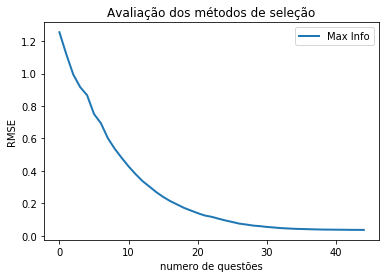

In [4]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 99993))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_MaxInfoSelector-base100000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

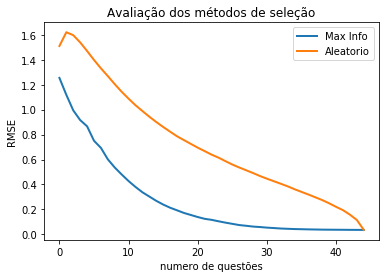

In [15]:
x = np.loadtxt('Result_dif_erro_MaxInfoSelector-base100000.txt')
y = np.loadtxt('Result_dif_erro_RandomSelector-base100000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((x[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((y[1:,:])**2,axis=0)), label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

#### Criério IntervalInfoSelector

In [14]:
x = np.loadtxt('Result_dif_erro_MaxInfoSelector-base100000.txt')
y = np.loadtxt('Result_dif_erro_RandomSelector-base100000.txt')

In [10]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 99993))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = IntervalInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_IntervalInfo-base100000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

aluno: 1459
aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
alun

aluno: 2142
aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
alun

aluno: 2825
aluno: 2826
aluno: 2827
aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
alun

aluno: 3508
aluno: 3509
aluno: 3510
aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
alun

KeyboardInterrupt: 

## Base 10.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848
aluno: 849

aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
aluno: 1544
aluno: 1545
aluno: 1546
alun

aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
aluno: 2227
aluno: 2228
aluno: 2229
alun

aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
aluno: 2911
aluno: 2912
aluno: 2913
aluno: 2914
aluno: 2915
aluno: 2916
alun

aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
aluno: 3595
aluno: 3596
aluno: 3597
aluno: 3598
aluno: 3599
aluno: 3600
aluno: 3601
aluno: 3602
alun

aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
aluno: 4280
aluno: 4281
aluno: 4282
aluno: 4283
aluno: 4284
aluno: 4285
aluno: 4286
aluno: 4287
alun

aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
aluno: 4964
aluno: 4965
aluno: 4966
aluno: 4967
aluno: 4968
aluno: 4969
aluno: 4970
aluno: 4971
aluno: 4972
alun

aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
aluno: 5649
aluno: 5650
aluno: 5651
aluno: 5652
aluno: 5653
aluno: 5654
aluno: 5655
aluno: 5656
alun

aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
aluno: 6334
aluno: 6335
aluno: 6336
aluno: 6337
aluno: 6338
aluno: 6339
aluno: 6340
aluno: 6341
aluno: 6342
alun

aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
aluno: 7017
aluno: 7018
aluno: 7019
aluno: 7020
aluno: 7021
aluno: 7022
aluno: 7023
aluno: 7024
aluno: 7025
aluno: 7026
aluno: 7027
alun

aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
aluno: 7700
aluno: 7701
aluno: 7702
aluno: 7703
aluno: 7704
aluno: 7705
aluno: 7706
aluno: 7707
aluno: 7708
aluno: 7709
aluno: 7710
alun

aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
aluno: 8387
aluno: 8388
aluno: 8389
aluno: 8390
aluno: 8391
aluno: 8392
aluno: 8393
aluno: 8394
alun

aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
aluno: 9071
aluno: 9072
aluno: 9073
aluno: 9074
aluno: 9075
aluno: 9076
aluno: 9077
aluno: 9078
aluno: 9079
alun

aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
aluno: 9755
aluno: 9756
aluno: 9757
aluno: 9758
aluno: 9759
aluno: 9760
aluno: 9761
aluno: 9762
aluno: 9763
alun

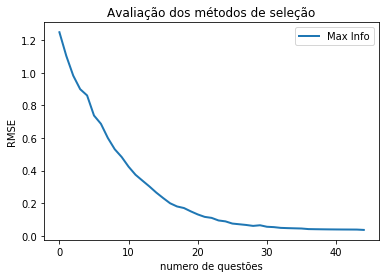

In [5]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 10000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_MaxInfoSelector-base10000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848

aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
aluno: 1544
aluno: 1545
aluno: 1546
aluno: 1547
aluno: 1548
alun

aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
aluno: 2227
aluno: 2228
aluno: 2229
aluno: 2230
aluno: 2231
alun

aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
aluno: 2911
aluno: 2912
aluno: 2913
aluno: 2914
aluno: 2915
alun

aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
aluno: 3595
aluno: 3596
aluno: 3597
aluno: 3598
alun

aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
aluno: 4280
aluno: 4281
alun

aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
aluno: 4964
aluno: 4965
aluno: 4966
aluno: 4967
alun

aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
aluno: 5649
aluno: 5650
aluno: 5651
aluno: 5652
alun

aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
aluno: 6334
aluno: 6335
aluno: 6336
aluno: 6337
aluno: 6338
alun

aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
aluno: 7017
aluno: 7018
aluno: 7019
aluno: 7020
aluno: 7021
alun

aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
aluno: 7700
aluno: 7701
aluno: 7702
aluno: 7703
aluno: 7704
aluno: 7705
aluno: 7706
alun

aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
aluno: 8387
aluno: 8388
aluno: 8389
aluno: 8390
aluno: 8391
alun

aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
aluno: 9071
aluno: 9072
aluno: 9073
aluno: 9074
aluno: 9075
alun

aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
aluno: 9755
aluno: 9756
aluno: 9757
aluno: 9758
aluno: 9759
aluno: 9760
aluno: 9761
aluno: 9762
alun

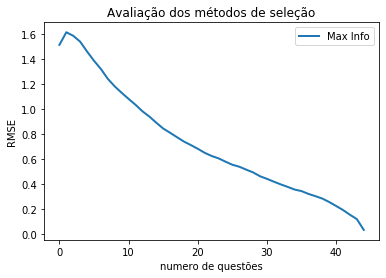

In [16]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 10000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = RandomSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_RandomSelector-base10000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 10000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = IntervalInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_IntervalInfo-base10000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

## Base 1.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

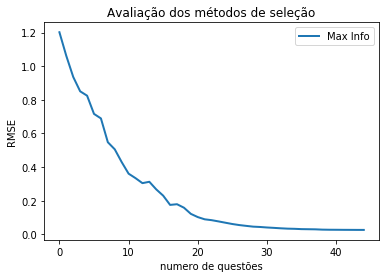

In [6]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 1000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = MaxInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_MaxInfoSelector-base1000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

#### Criério RandomSelector

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847

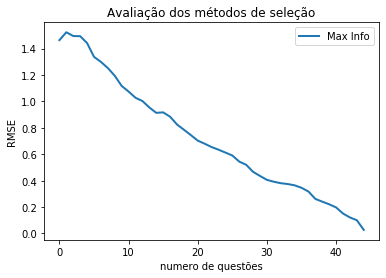

In [17]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 1000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = RandomSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_RandomSelector-base1000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

#### Criério IntervalInfoSelector

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 1000))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector = IntervalInfoSelector()
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()
full_items = list(range(0, 45))

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    respostas = alunos.iloc[aluno,0:45].tolist()
    ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
    #print('Theta Original: ',ori_theta)
    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    for nq in range(0, 45):
        item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

        correct = alunos.iloc[aluno,item_index]
        administered_items.append(item_index)
        responses.append(correct)

        est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
        #print('Estimated proficiency, given answered items:', est_theta)
        theta_est.append(est_theta)

        erro = ori_theta - est_theta
        #erro_2 = (ori_theta - est_theta)**2
        #print('erro:', erro_2)
        erro_theta.append(erro)

        nq = nq+1
        #print('nq:', nq)

    erro_theta = np.reshape(erro_theta,(1,45))
    result = np.concatenate((result, erro_theta), axis=0)

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Max Info', linewidth=2)
#plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção")

np.savetxt('Result_dif_erro_IntervalInfo-base1000.txt',result)

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [ ]:
result = np.reshape(list(range(0, 45)),(1,45))

In [ ]:
param

In [ ]:
result

In [ ]:
np.mean(result[1:,:],axis=0)

In [ ]:
result

In [ ]:
erro_theta

In [ ]:
statistics.pstdev(ori_theta, est_theta)

In [ ]:
x = np.array(list(range(0, 45)))
x.shape

x = np.reshape(x,(9,5))
x

In [ ]:
erro_theta1 = np.reshape(erro_theta,(1,45))
result1 = np.reshape(list(range(0, 45)),(1,45))

In [ ]:
result = np.concatenate((result1, erro_theta1), axis=0)

In [ ]:
result

In [ ]:
result[1,]

In [ ]:
statistics.pstdev(ori_theta, est_theta)

In [ ]:
theta_est